In [1]:
#**************** IMPORT PACKAGES ********************
from flask import Flask, render_template, request, flash, redirect, url_for
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math, random
import datetime as dt
import json
import yfinance as yf
import tweepy
import preprocessor as p
import re
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import xgboost as xgboost
import simplejson
from collections import deque
import random
from sklearn.linear_model import LinearRegression
from textblob import TextBlob
import constants as ct
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
pip install yfinance

DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\cloudpickle-3.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\dependency_submitit_launcher-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\hydra_core-1.4.0.dev1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa

In [15]:
!pip install tweepy textblob


DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\cloudpickle-3.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\dependency_submitit_launcher-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\prathamesh sawant\appdata\local\programs\python\python312\lib\site-packages\hydra_core-1.4.0.dev1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa

[*********************100%%**********************]  1 of 1 completed


Data for AAPL (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  234.449997  236.850006  234.449997  236.479996  236.479996   
2024-10-22  233.889999  236.220001  232.600006  235.860001  235.860001   
2024-10-23  234.080002  235.139999  227.759995  230.759995  230.759995   
2024-10-24  229.979996  230.820007  228.410004  230.570007  230.570007   
2024-10-25  229.740005  233.220001  229.570007  231.410004  231.410004   

              Volume  
Date                  
2024-10-21  36254500  
2024-10-22  38846600  
2024-10-23  52287000  
2024-10-24  31109500  
2024-10-25  38776700  


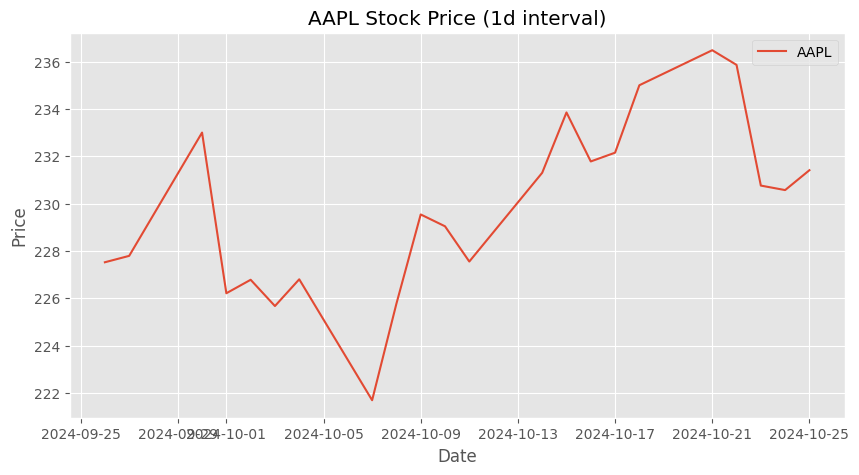

Stock Name: AAPL
Average Polarity of Tweets: 0.09174482994260898
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 2280 | Negative Tweets: 899 | Neutral Tweets: 1877
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AAPL (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  231.520004  231.589996  231.375000  231.386002   
2024-10-25 15:40:00-04:00  231.380096  231.520004  231.250000  231.470001   
2024-10-25 15:45:00-04:00  231.490005  231.600006  231.383194  231.399994   
2024-10-25 15:50:00-04:00  231.410004  231.800003  231.250000  231.539902   
2024-10-25 15:55:00-04:00  231.529999  231.630005  231.110001  231.399994   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 15:35:00-04:00  231.386002   248653  
2024-10-25 15:40:00-04:00  231.470001   143732  
2024-10-25 15:45:00-04:00  231.399994   365053  
2024-10-25 15:50:00-04:00  231.539902   762757  
2024-10-25 15:55:00-04:00  231.399994  1738829  


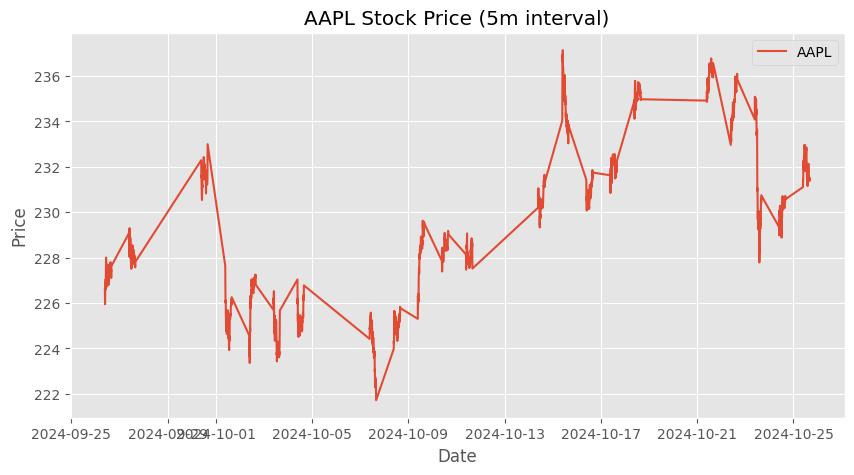

Stock Name: AAPL
Average Polarity of Tweets: 0.09174482994260898
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 2280 | Negative Tweets: 899 | Neutral Tweets: 1877
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AAPL (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  232.229996  232.731995  231.759995  232.710007   
2024-10-25 12:30:00-04:00  232.735001  232.940002  231.529999  231.857498   
2024-10-25 13:30:00-04:00  231.830002  231.971497  231.070007  231.839996   
2024-10-25 14:30:00-04:00  231.846893  232.199997  231.369995  231.619995   
2024-10-25 15:30:00-04:00  231.649994  231.800003  231.110001  231.410004   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  232.710007  3211126  
2024-10-25 12:30:00-04:00  231.857498  2367087  
2024-10-25 13:30:00-04:00  231.839996  2818009  
2024-10-25 14:30:00-04:00  231.619995  2642893  
2024-10-25 15:30:00-04:00  231.410004  3572932  


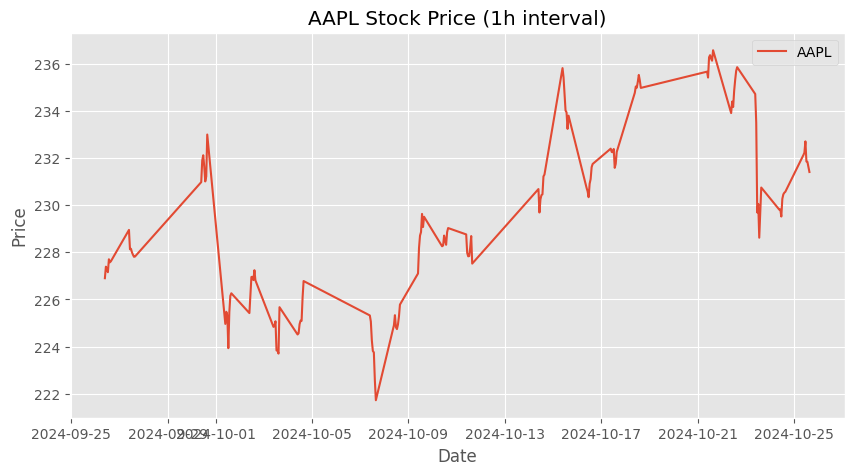

[*********************100%%**********************]  1 of 1 completed

Stock Name: AAPL
Average Polarity of Tweets: 0.09174482994260898
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 2280 | Negative Tweets: 899 | Neutral Tweets: 1877
##############################################################################
Data for AAPL (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  224.929993  229.520004  224.020004  227.789993  227.789993   
2024-09-30  230.039993  233.000000  223.020004  226.800003  226.800003   
2024-10-07  224.500000  229.750000  221.330002  227.550003  227.550003   
2024-10-14  228.699997  237.490005  228.600006  235.000000  235.000000   
2024-10-21  234.449997  236.850006  227.759995  231.410004  231.410004   

               Volume  
Date                   
2024-09-23  112971400  
2024-09-30  221996800  
2024-10-07  164894900  
2024-10-14  218141000  
2024-10-21  236076604  


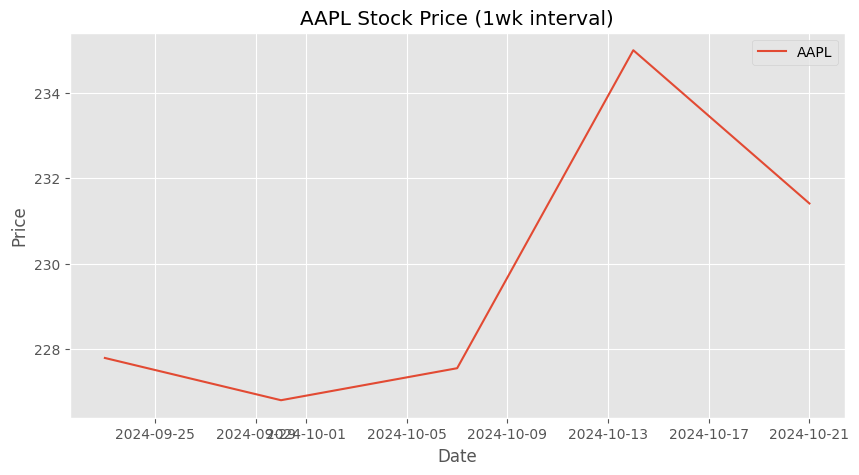

Stock Name: AAPL
Average Polarity of Tweets: 0.09174482994260898
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 2280 | Negative Tweets: 899 | Neutral Tweets: 1877
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AAPL (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  229.520004  237.490005  221.330002  231.410004  231.410004   

               Volume  
Date                   
2024-10-01  786567404  


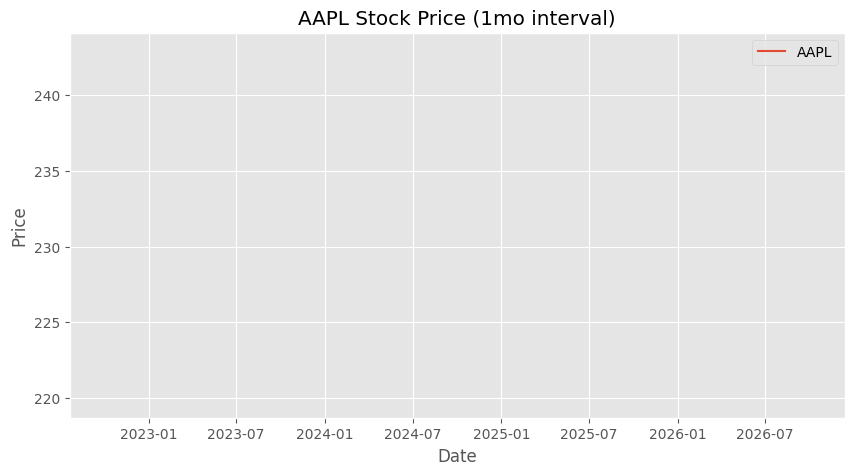

[*********************100%%**********************]  1 of 1 completed

Stock Name: AAPL
Average Polarity of Tweets: 0.09174482994260898
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 2280 | Negative Tweets: 899 | Neutral Tweets: 1877
##############################################################################


Data for AMD (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  155.759995  158.000000  154.149994  157.899994  157.899994   
2024-10-22  156.600006  156.740005  151.910004  154.089996  154.089996   
2024-10-23  153.000000  153.449997  150.520004  152.910004  152.910004   
2024-10-24  154.740005  155.190002  152.350006  153.440002  153.440002   
2024-10-25  155.399994  158.910004  155.050003  156.229996  156.229996   

              Volume  
Date                  
2024-10-21  25781200  
2024-10-22  34997400  
2024-10-23  26095900  
2024-10-24  22877000  
2024-10-25  29679400  


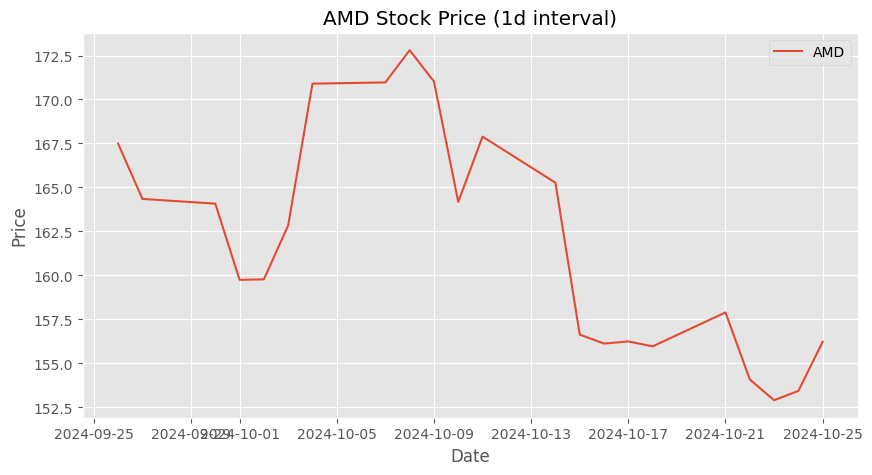

Stock Name: AMD
Average Polarity of Tweets: 0.14893950247627155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1233 | Negative Tweets: 307 | Neutral Tweets: 687
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMD (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  156.369995  156.679993  156.345001  156.570007   
2024-10-25 15:40:00-04:00  156.580002  156.668396  156.518005  156.600006   
2024-10-25 15:45:00-04:00  156.610001  156.619995  156.440002  156.522995   
2024-10-25 15:50:00-04:00  156.529999  156.699997  156.350006  156.667999   
2024-10-25 15:55:00-04:00  156.639999  156.639999  156.139999  156.220001   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  156.570007  225513  
2024-10-25 15:40:00-04:00  156.600006  137932  
2024-10-25 15:45:00-04:00  156.522995  213413  
2024-10-25 15:50:00-04:00  156.667999  413433  
2024-10-25 15:55:00-04:00  156.220001  910402  


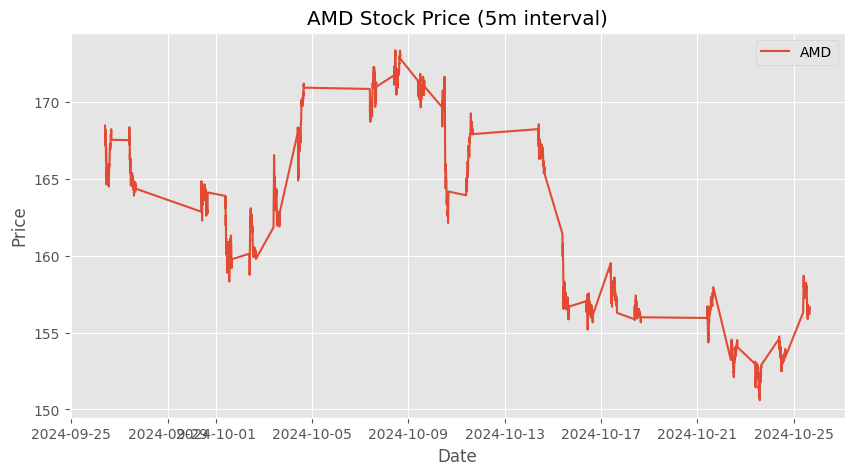

Stock Name: AMD
Average Polarity of Tweets: 0.14893950247627155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1233 | Negative Tweets: 307 | Neutral Tweets: 687
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMD (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  157.341995  158.260101  157.310104  158.235001   
2024-10-25 12:30:00-04:00  158.238007  158.279999  156.940002  157.000000   
2024-10-25 13:30:00-04:00  156.990005  157.149994  155.690002  156.544998   
2024-10-25 14:30:00-04:00  156.559998  156.740005  156.089996  156.300003   
2024-10-25 15:30:00-04:00  156.320007  156.699997  156.139999  156.229996   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  158.235001  2563661  
2024-10-25 12:30:00-04:00  157.000000  2076207  
2024-10-25 13:30:00-04:00  156.544998  3184122  
2024-10-25 14:30:00-04:00  156.300003  2125531  
2024-10-25 15:30:00-04:00  156.229996  2123924  


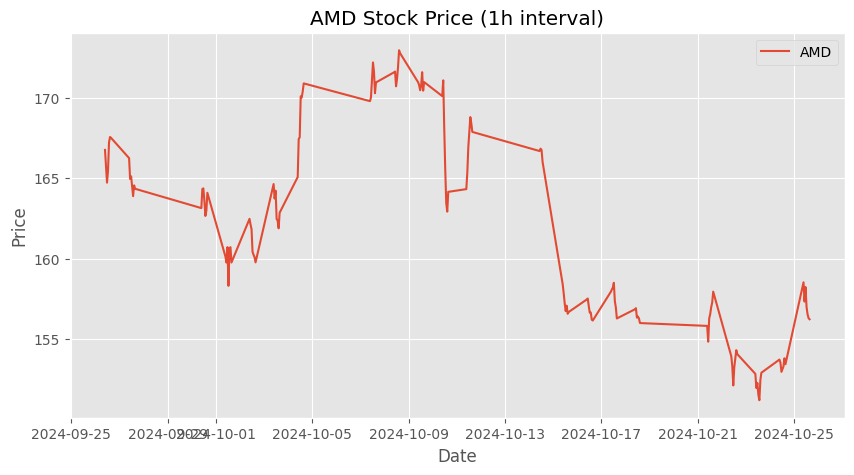

Stock Name: AMD
Average Polarity of Tweets: 0.14893950247627155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1233 | Negative Tweets: 307 | Neutral Tweets: 687
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMD (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  158.500000  168.729996  158.179993  164.350006  164.350006   
2024-09-30  163.100006  171.210007  158.080002  170.899994  170.899994   
2024-10-07  171.080002  174.050003  162.000000  167.889999  167.889999   
2024-10-14  167.770004  168.899994  154.919998  155.970001  155.970001   
2024-10-21  155.759995  158.910004  150.520004  156.229996  156.229996   

               Volume  
Date                   
2024-09-23  101154200  
2024-09-30  152499200  
2024-10-07  224250600  
2024-10-14  166415900  
2024-10-21  169189389  


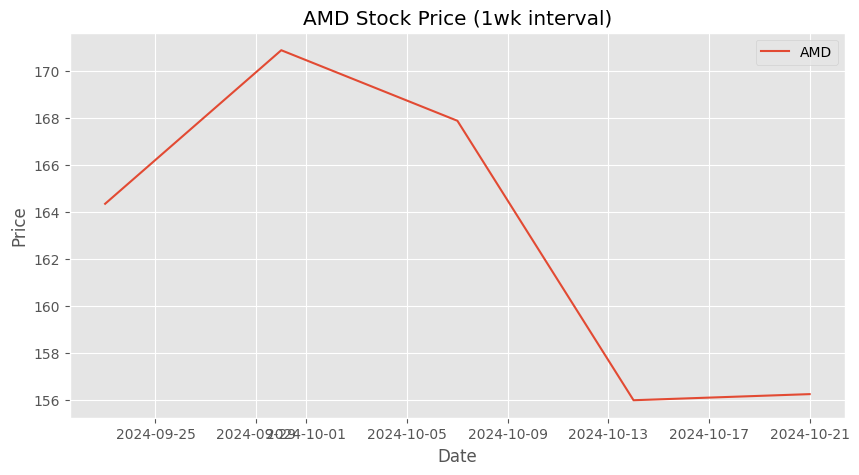

Stock Name: AMD
Average Polarity of Tweets: 0.14893950247627155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1233 | Negative Tweets: 307 | Neutral Tweets: 687
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMD (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  164.479996  174.050003  150.520004  156.229996  156.229996   

               Volume  
Date                   
2024-10-01  690473489  


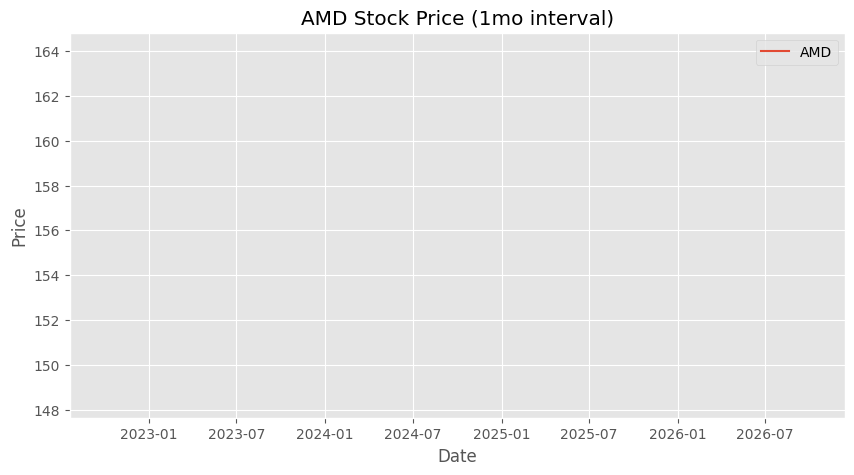

[*********************100%%**********************]  1 of 1 completed

Stock Name: AMD
Average Polarity of Tweets: 0.14893950247627155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1233 | Negative Tweets: 307 | Neutral Tweets: 687
##############################################################################


Data for AMZN (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  188.050003  189.460007  186.399994  189.070007  189.070007   
2024-10-22  188.350006  191.520004  186.979996  189.699997  189.699997   
2024-10-23  188.850006  189.160004  183.690002  184.710007  184.710007   
2024-10-24  185.250000  187.110001  183.860001  186.380005  186.380005   
2024-10-25  187.850006  190.449997  187.529999  187.830002  187.830002   

              Volume  
Date                  
2024-10-21  24639400  
2024-10-22  29650600  
2024-10-23  31937100  
2024-10-24  21647400  
2024-10-25  29310400  


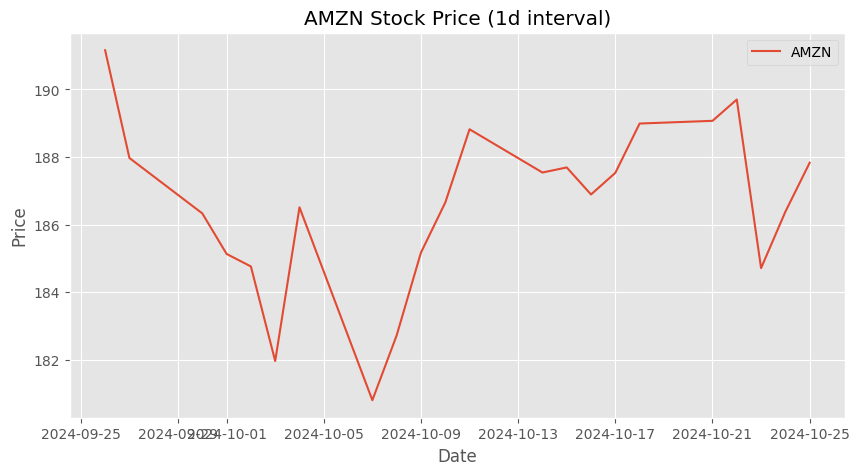

Stock Name: AMZN
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMZN (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  188.145004  188.160004  187.970001  188.029999   
2024-10-25 15:40:00-04:00  188.024994  188.039993  187.860001  187.899994   
2024-10-25 15:45:00-04:00  187.899994  188.100006  187.860001  188.076004   
2024-10-25 15:50:00-04:00  188.080002  188.279999  187.889999  187.929993   
2024-10-25 15:55:00-04:00  187.929993  187.960007  187.529999  187.820007   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 15:35:00-04:00  188.029999   360520  
2024-10-25 15:40:00-04:00  187.899994   172103  
2024-10-25 15:45:00-04:00  188.076004   193855  
2024-10-25 15:50:00-04:00  187.929993   428018  
2024-10-25 15:55:00-04:00  187.820007  1073796  


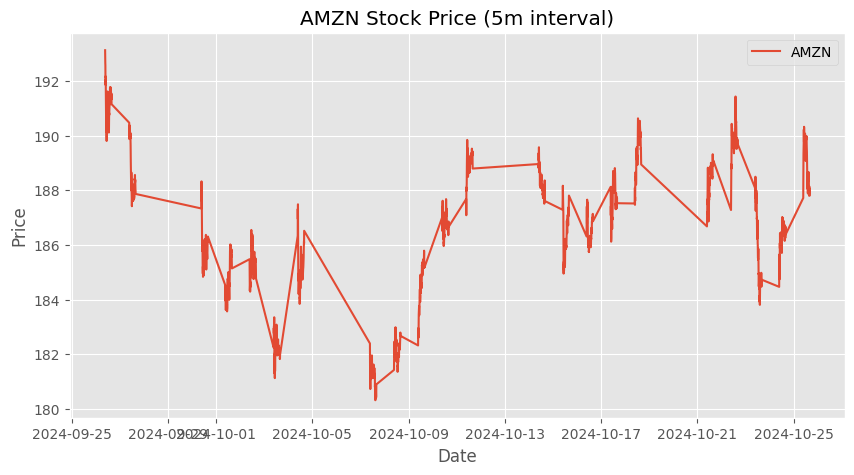

Stock Name: AMZN
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMZN (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  189.654999  190.000000  188.880005  189.960007   
2024-10-25 12:30:00-04:00  189.960007  190.039993  188.770004  188.854996   
2024-10-25 13:30:00-04:00  188.850006  188.899994  187.740005  188.414001   
2024-10-25 14:30:00-04:00  188.389999  188.697098  187.759995  187.940002   
2024-10-25 15:30:00-04:00  187.945007  188.279999  187.529999  187.830002   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  189.960007  2595480  
2024-10-25 12:30:00-04:00  188.854996  1919131  
2024-10-25 13:30:00-04:00  188.414001  2461413  
2024-10-25 14:30:00-04:00  187.940002  1934916  
2024-10-25 15:30:00-04:00  187.830002  2452981  


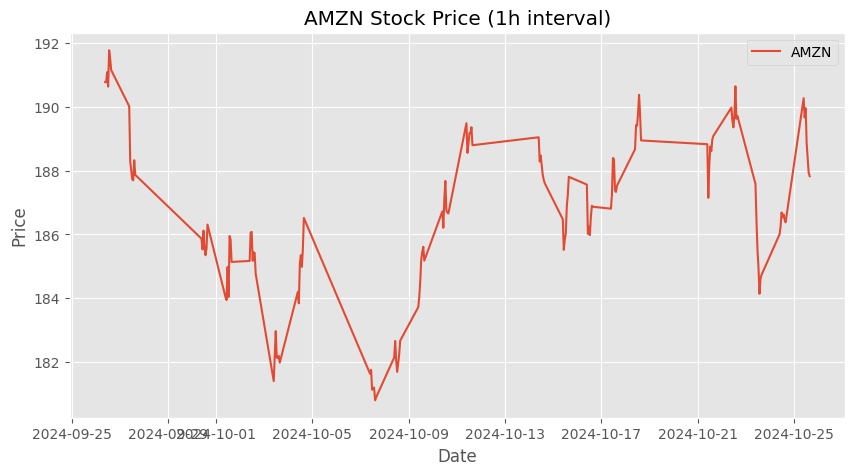

Stock Name: AMZN
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMZN (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  193.750000  194.529999  187.339996  187.970001  187.970001   
2024-09-30  187.139999  188.490005  180.880005  186.509995  186.509995   
2024-10-07  182.949997  189.929993  180.250000  188.820007  188.820007   
2024-10-14  189.779999  190.740005  184.580002  188.990005  188.990005   
2024-10-21  188.050003  191.520004  183.690002  187.830002  187.830002   

               Volume  
Date                   
2024-09-23   98728300  
2024-09-30  172427500  
2024-10-07  148616000  
2024-10-14  140707200  
2024-10-21  166546960  


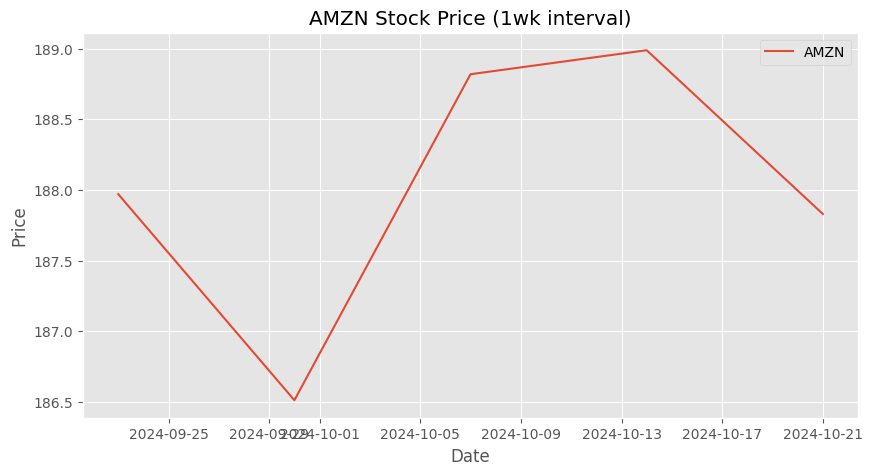

Stock Name: AMZN
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for AMZN (1mo interval):
                  Open        High     Low       Close   Adj Close     Volume
Date                                                                         
2024-10-01  184.899994  191.520004  180.25  187.830002  187.830002  586713760


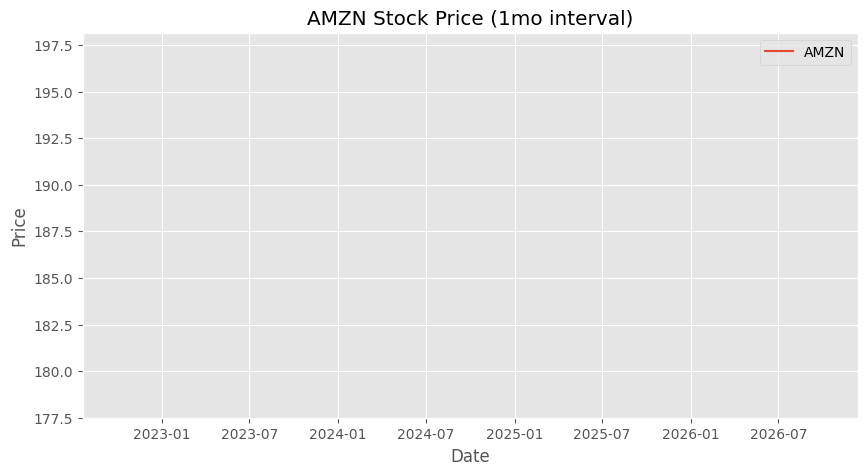

Stock Name: AMZN
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BA (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  160.250000  163.440002  158.360001  159.820007  159.820007   
2024-10-22  160.500000  160.660004  158.369995  159.880005  159.880005   
2024-10-23  160.000000  161.470001  153.529999  157.059998  157.059998   
2024-10-24  152.610001  155.889999  151.979996  155.199997  155.199997   
2024-10-25  156.199997  157.479996  154.520004  155.009995  155.009995   

              Volume  
Date                  
2024-10-21  13277600  
2024-10-22   7380800  
2024-10-23  15931500  
2024-10-24   9774400  
2024-10-25   8139000  


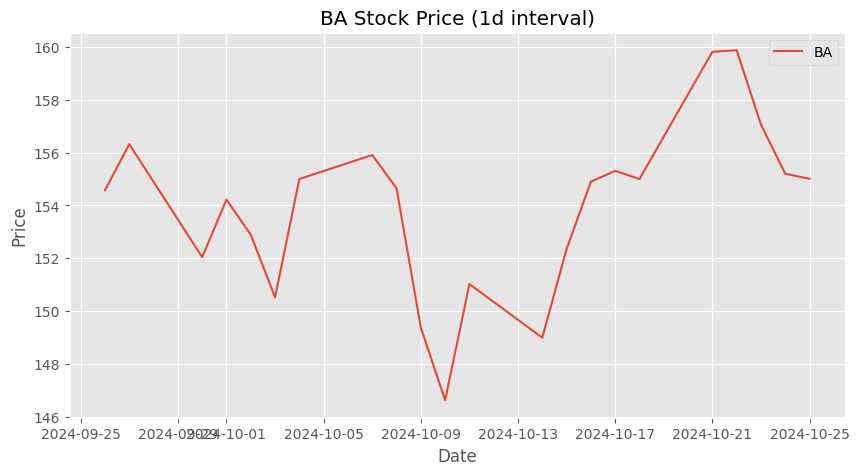

Stock Name: BA
Average Polarity of Tweets: 0.1271822904423155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 166 | Negative Tweets: 65 | Neutral Tweets: 168
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BA (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  154.895004  155.149994  154.863998  155.039993   
2024-10-25 15:40:00-04:00  155.110001  155.139999  154.910004  155.000000   
2024-10-25 15:45:00-04:00  155.000000  155.070007  154.910004  154.970001   
2024-10-25 15:50:00-04:00  154.990005  155.210007  154.960007  155.164993   
2024-10-25 15:55:00-04:00  155.179993  155.199997  154.860001  155.029999   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  155.039993   86803  
2024-10-25 15:40:00-04:00  155.000000  139266  
2024-10-25 15:45:00-04:00  154.970001   83686  
2024-10-25 15:50:00-04:00  155.164993  135944  
2024-10-25 15:55:00-04:00  155.029999  284060  


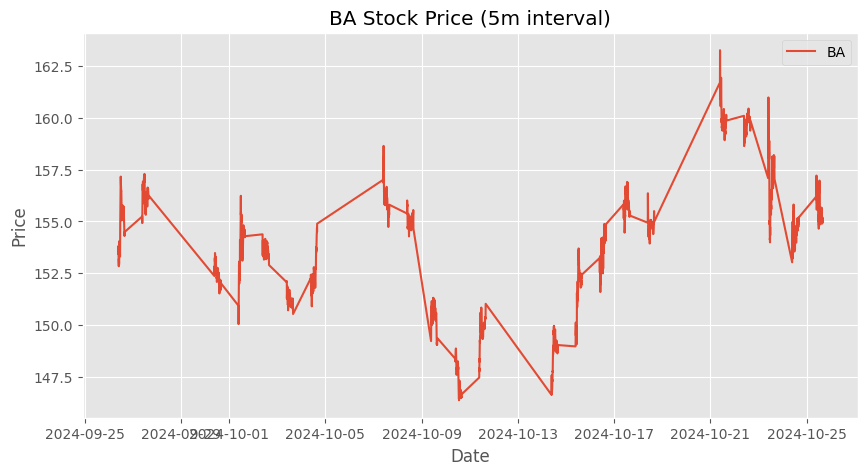

Stock Name: BA
Average Polarity of Tweets: 0.1271822904423155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 166 | Negative Tweets: 65 | Neutral Tweets: 168
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BA (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  155.419998  156.869995  154.520203  156.696442   
2024-10-25 12:30:00-04:00  156.740005  157.460007  154.740005  155.201202   
2024-10-25 13:30:00-04:00  155.149994  155.579895  154.789993  155.399994   
2024-10-25 14:30:00-04:00  155.330002  155.750000  154.899994  155.214996   
2024-10-25 15:30:00-04:00  155.190002  155.210007  154.830994  155.009995   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  156.696442  1564081  
2024-10-25 12:30:00-04:00  155.201202  1481705  
2024-10-25 13:30:00-04:00  155.399994   620159  
2024-10-25 14:30:00-04:00  155.214996   467314  
2024-10-25 15:30:00-04:00  155.009995   826646  


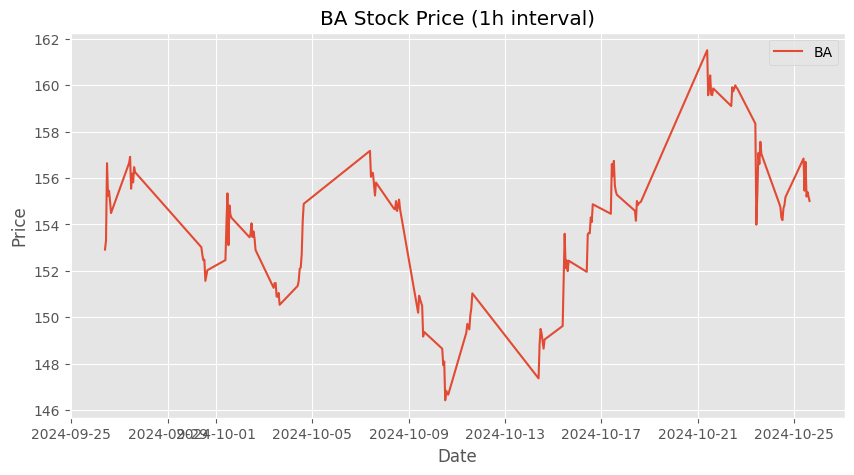

Stock Name: BA
Average Polarity of Tweets: 0.1271822904423155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 166 | Negative Tweets: 65 | Neutral Tweets: 168
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BA (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  156.419998  157.330002  152.039993  156.320007  156.320007   
2024-09-30  154.789993  156.399994  149.490005  155.000000  155.000000   
2024-10-07  155.000000  158.759995  146.259995  151.020004  151.020004   
2024-10-14  148.000000  157.139999  146.020004  155.000000  155.000000   
2024-10-21  160.250000  163.440002  151.979996  155.009995  155.009995   

              Volume  
Date                  
2024-09-23  28639100  
2024-09-30  40210300  
2024-10-07  46057100  
2024-10-14  41656900  
2024-10-21  62143384  


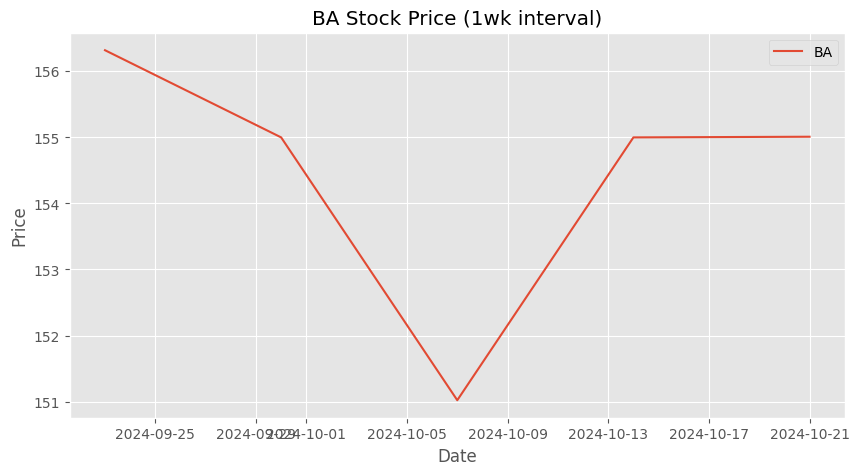

Stock Name: BA
Average Polarity of Tweets: 0.1271822904423155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 166 | Negative Tweets: 65 | Neutral Tweets: 168
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BA (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  151.460007  163.440002  146.020004  155.009995  155.009995   

               Volume  
Date                   
2024-10-01  179165484  


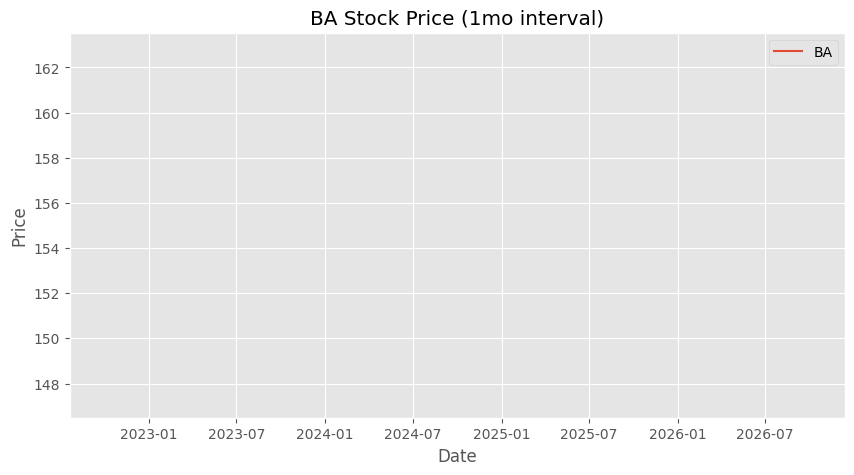

Stock Name: BA
Average Polarity of Tweets: 0.1271822904423155
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 166 | Negative Tweets: 65 | Neutral Tweets: 168
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BX (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  171.500000  174.160004  170.399994  170.770004  170.770004   
2024-10-22  170.490005  170.910004  166.910004  168.500000  168.500000   
2024-10-23  168.369995  170.449997  165.039993  166.919998  166.919998   
2024-10-24  170.539993  171.990005  167.960007  169.660004  169.660004   
2024-10-25  170.539993  171.169998  167.080002  167.500000  167.500000   

             Volume  
Date                 
2024-10-21  3386700  
2024-10-22  2926500  
2024-10-23  3167400  
2024-10-24  3531200  
2024-10-25  2831000  


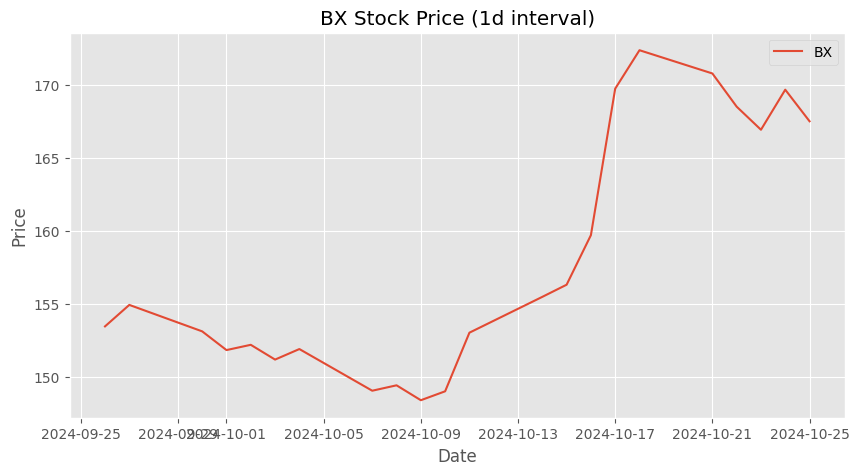

Stock Name: BX
Average Polarity of Tweets: 0.1659720598845599
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 34 | Negative Tweets: 6 | Neutral Tweets: 10
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BX (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  167.384995  167.600006  167.374207  167.520004   
2024-10-25 15:40:00-04:00  167.529999  167.580002  167.369995  167.414993   
2024-10-25 15:45:00-04:00  167.414993  167.550003  167.279999  167.544998   
2024-10-25 15:50:00-04:00  167.570007  167.660004  167.430099  167.462997   
2024-10-25 15:55:00-04:00  167.460007  167.610001  167.210007  167.550003   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  167.520004   21445  
2024-10-25 15:40:00-04:00  167.414993   26237  
2024-10-25 15:45:00-04:00  167.544998   47389  
2024-10-25 15:50:00-04:00  167.462997   73639  
2024-10-25 15:55:00-04:00  167.550003  195832  


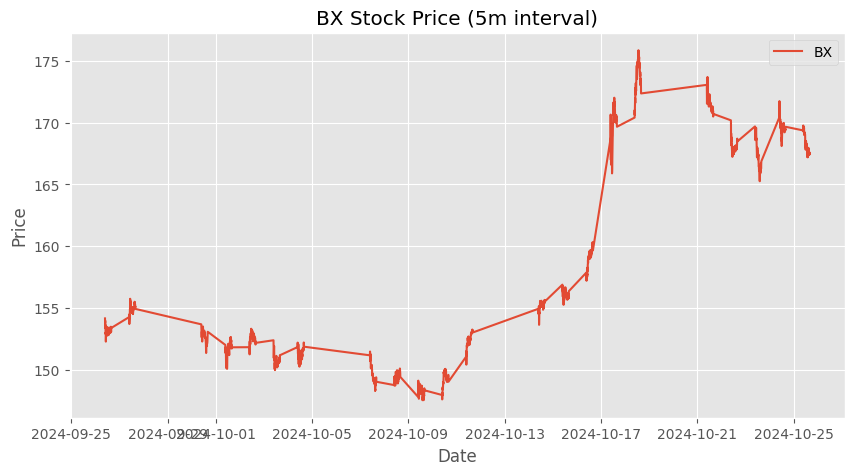

[*********************100%%**********************]  1 of 1 completed

Stock Name: BX
Average Polarity of Tweets: 0.1659720598845599
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 34 | Negative Tweets: 6 | Neutral Tweets: 10
##############################################################################


Data for BX (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  169.089996  169.160004  167.677002  168.494995   
2024-10-25 12:30:00-04:00  168.500000  168.589493  167.667603  167.889999   
2024-10-25 13:30:00-04:00  167.889999  167.940002  167.080002  167.741592   
2024-10-25 14:30:00-04:00  167.779999  168.099899  167.423599  167.649994   
2024-10-25 15:30:00-04:00  167.639999  167.660004  167.210007  167.500000   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  168.494995  267133  
2024-10-25 12:30:00-04:00  167.889999  173609  
2024-10-25 13:30:00-04:00  167.741592  273269  
2024-10-25 14:30:00-04:00  167.649994  241144  
2024-10-25 15:30:00-04:00  167.500000  387699  


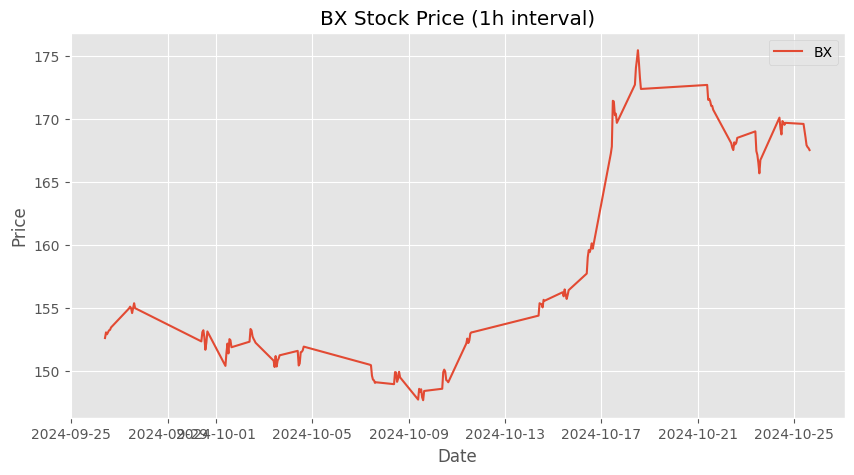

Stock Name: BX
Average Polarity of Tweets: 0.1659720598845599
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 34 | Negative Tweets: 6 | Neutral Tweets: 10
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BX (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  156.899994  157.910004  152.210007  154.940002  154.940002   
2024-09-30  153.919998  154.429993  149.789993  151.919998  151.919998   
2024-10-07  151.169998  153.449997  146.970001  153.039993  153.039993   
2024-10-14  153.949997  175.940002  153.559998  172.360001  172.360001   
2024-10-21  171.500000  174.160004  165.039993  167.500000  167.500000   

              Volume  
Date                  
2024-09-23   9244400  
2024-09-30  12105900  
2024-10-07  11192500  
2024-10-14  23992500  
2024-10-21  17846013  


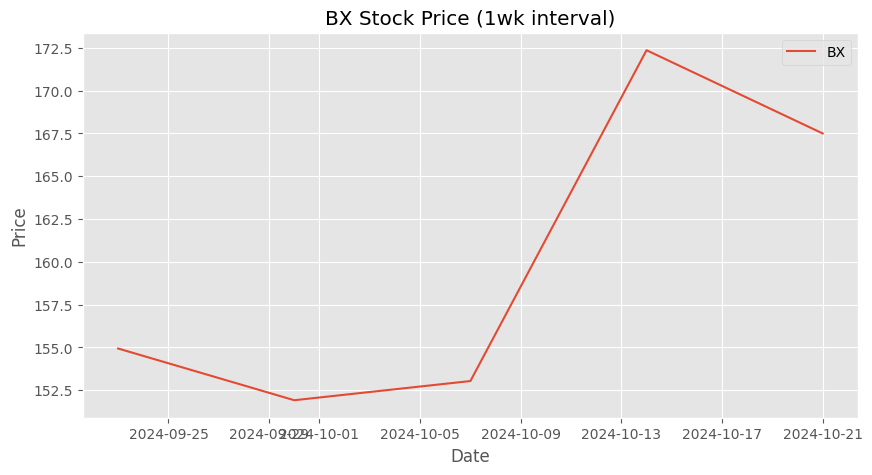

Stock Name: BX
Average Polarity of Tweets: 0.1659720598845599
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 34 | Negative Tweets: 6 | Neutral Tweets: 10
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for BX (1mo interval):
                  Open        High         Low  Close  Adj Close    Volume
Date                                                                      
2024-10-01  153.110001  175.940002  146.970001  167.5      167.5  62026713


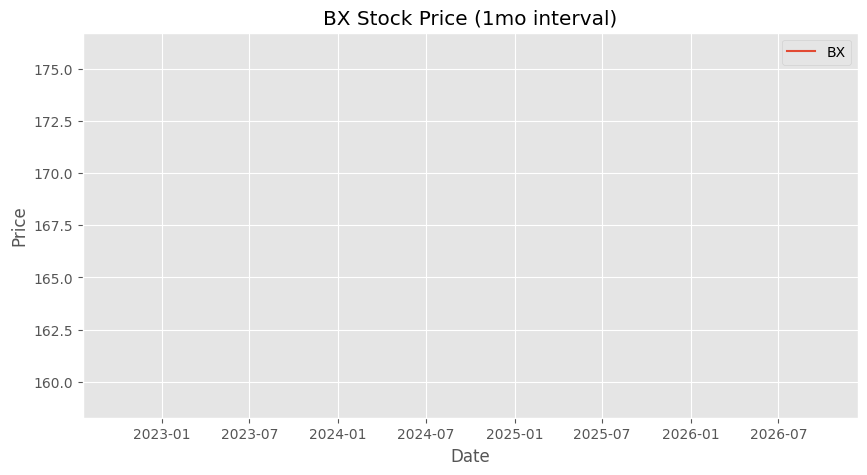

Stock Name: BX
Average Polarity of Tweets: 0.1659720598845599
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 34 | Negative Tweets: 6 | Neutral Tweets: 10
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for COST (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  889.000000  891.400024  883.700012  886.770020  886.770020   
2024-10-22  890.979980  894.890015  884.309998  893.489990  893.489990   
2024-10-23  896.020020  905.679993  894.989990  899.169983  899.169983   
2024-10-24  901.500000  903.500000  888.260010  893.419983  893.419983   
2024-10-25  895.650024  901.619995  890.000000  891.219971  891.219971   

             Volume  
Date                 
2024-10-21  1184900  
2024-10-22  1189700  
2024-10-23  2193500  
2024-10-24  1649600  
2024-10-25  1424900  


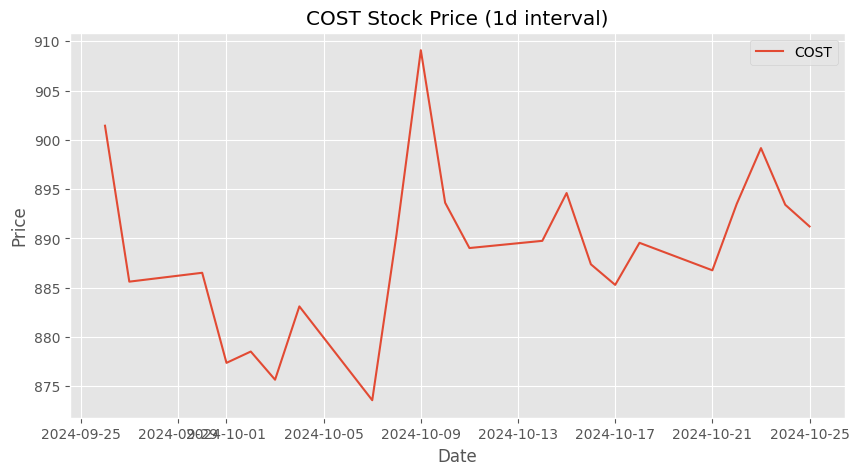

Stock Name: COST
Average Polarity of Tweets: 0.13145325240513353
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 200 | Negative Tweets: 55 | Neutral Tweets: 138
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for COST (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  892.789978  893.739990  892.789978  893.039978   
2024-10-25 15:40:00-04:00  892.690002  892.750000  891.000122  891.000122   
2024-10-25 15:45:00-04:00  891.104980  891.369995  890.400024  891.349976   
2024-10-25 15:50:00-04:00  891.400024  891.400024  890.000000  890.500000   
2024-10-25 15:55:00-04:00  890.580017  891.400024  890.090088  891.380005   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  893.039978   17537  
2024-10-25 15:40:00-04:00  891.000122   25843  
2024-10-25 15:45:00-04:00  891.349976   40538  
2024-10-25 15:50:00-04:00  890.500000   39015  
2024-10-25 15:55:00-04:00  891.380005   64295  


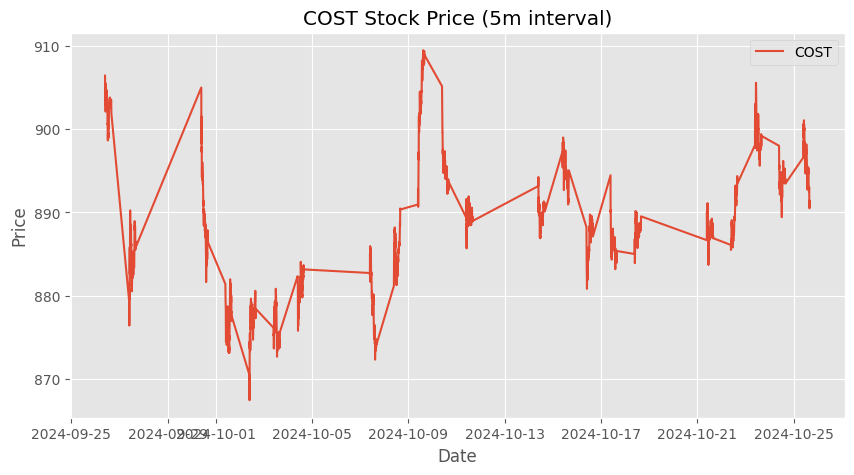

Stock Name: COST
Average Polarity of Tweets: 0.13145325240513353
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 200 | Negative Tweets: 55 | Neutral Tweets: 138
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for COST (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  896.309998  897.783508  894.533203  897.606995   
2024-10-25 12:30:00-04:00  897.780029  898.330017  894.902527  895.669983   
2024-10-25 13:30:00-04:00  895.080017  895.640015  892.289978  894.650024   
2024-10-25 14:30:00-04:00  894.619995  895.369995  892.380005  892.955017   
2024-10-25 15:30:00-04:00  893.090027  893.739990  890.000000  891.219971   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  897.606995   96903  
2024-10-25 12:30:00-04:00  895.669983   88692  
2024-10-25 13:30:00-04:00  894.650024   90618  
2024-10-25 14:30:00-04:00  892.955017   86698  
2024-10-25 15:30:00-04:00  891.219971  197350  


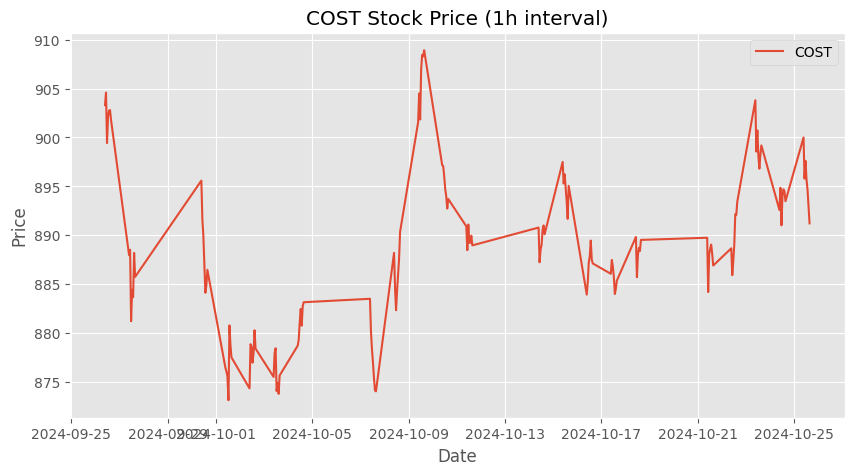

Stock Name: COST
Average Polarity of Tweets: 0.13145325240513353
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 200 | Negative Tweets: 55 | Neutral Tweets: 138
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for COST (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  903.000000  910.359985  874.000000  885.619995  885.619995   
2024-09-30  891.369995  910.000000  867.159973  883.109985  883.109985   
2024-10-07  881.599976  910.000000  872.330017  889.030029  889.030029   
2024-10-14  892.450012  900.650024  879.500000  889.559998  889.559998   
2024-10-21  889.000000  905.679993  883.700012  891.219971  891.219971   

             Volume  
Date                 
2024-09-23  7925800  
2024-09-30  8265000  
2024-10-07  8910700  
2024-10-14  7496400  
2024-10-21  9068442  


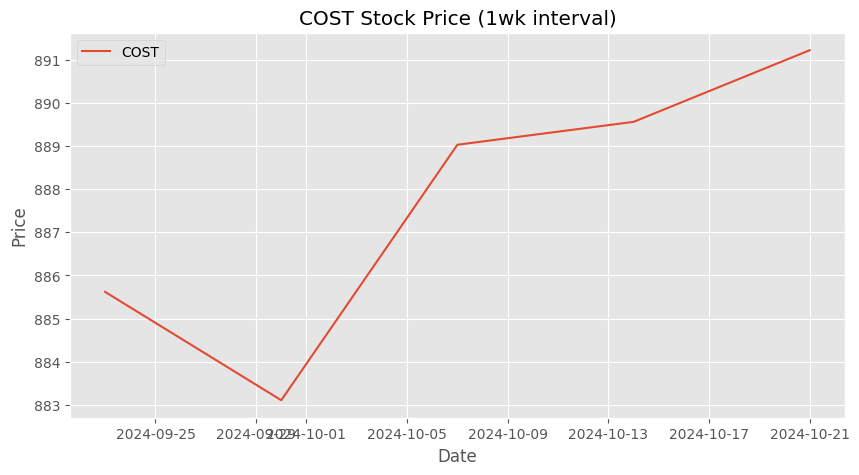

Stock Name: COST
Average Polarity of Tweets: 0.13145325240513353
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 200 | Negative Tweets: 55 | Neutral Tweets: 138
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for COST (1mo interval):
              Open   High         Low       Close   Adj Close    Volume
Date                                                                   
2024-10-01  885.25  910.0  867.159973  891.219971  891.219971  31597642


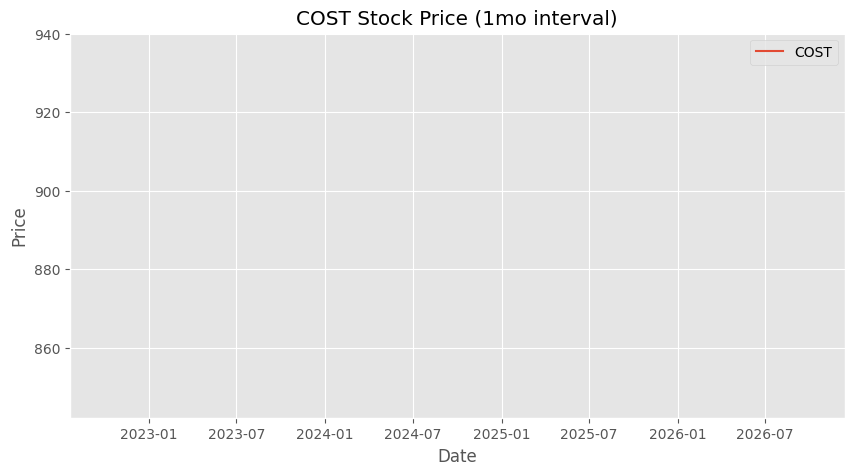

[*********************100%%**********************]  1 of 1 completed

Stock Name: COST
Average Polarity of Tweets: 0.13145325240513353
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 200 | Negative Tweets: 55 | Neutral Tweets: 138
##############################################################################
Data for CRM (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  289.000000  292.920013  288.040009  291.290009  291.290009   
2024-10-22  289.750000  291.940002  287.649994  288.329987  288.329987   
2024-10-23  287.730011  288.299988  282.619995  284.429993  284.429993   
2024-10-24  286.559998  288.910004  285.179993  286.760010  286.760010   
2024-10-25  290.000000  294.380005  288.829987  290.459991  290.459991   

             Volume  
Date                 
2024-10-21  2712600  
2024-10-22  3100100  
2024-10-23  3227100  
2024-10-24  3210700  
2024-10-25  3351200  


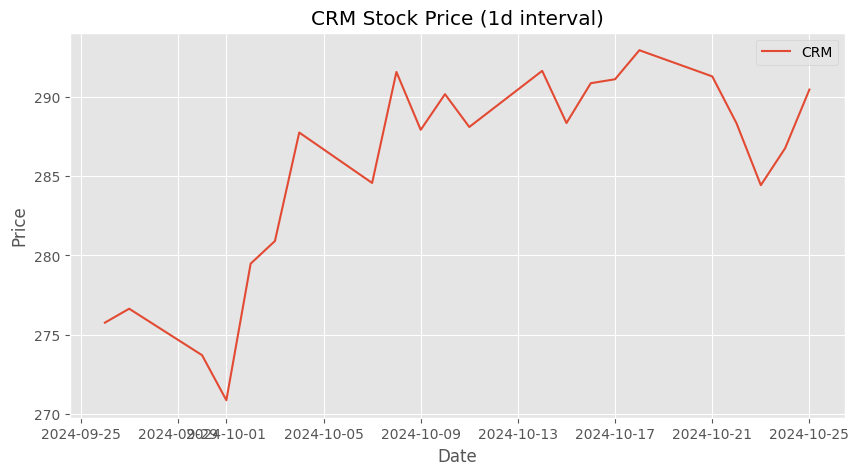

Stock Name: CRM
Average Polarity of Tweets: 0.14670049386116982
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 30 | Neutral Tweets: 87
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for CRM (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  290.105011  290.489990  289.989990  290.195007   
2024-10-25 15:40:00-04:00  290.149994  290.350006  290.109985  290.350006   
2024-10-25 15:45:00-04:00  290.309998  290.535004  290.230011  290.425110   
2024-10-25 15:50:00-04:00  290.434998  290.600006  290.059998  290.089996   
2024-10-25 15:55:00-04:00  290.109985  290.540009  289.970001  290.434998   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  290.195007   54629  
2024-10-25 15:40:00-04:00  290.350006   19268  
2024-10-25 15:45:00-04:00  290.425110   48282  
2024-10-25 15:50:00-04:00  290.089996   68673  
2024-10-25 15:55:00-04:00  290.434998  190402  


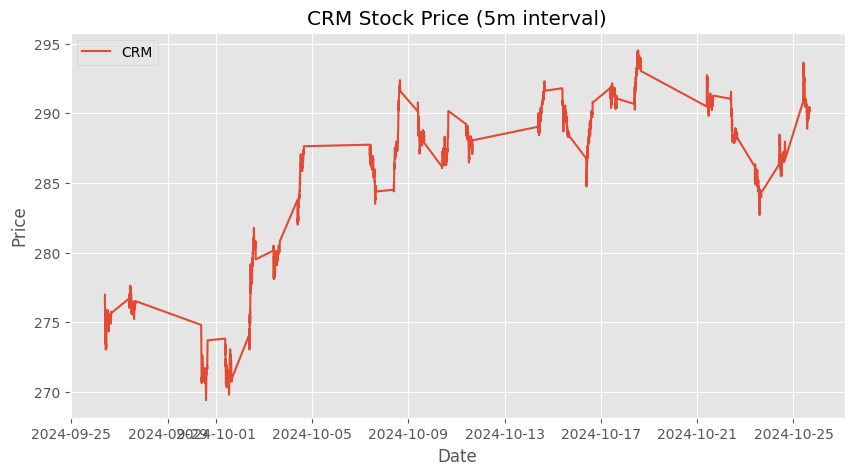

Stock Name: CRM
Average Polarity of Tweets: 0.14670049386116982
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 30 | Neutral Tweets: 87
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for CRM (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  290.700012  291.109985  290.250000  291.029999   
2024-10-25 12:30:00-04:00  291.089996  291.170013  289.410004  289.489990   
2024-10-25 13:30:00-04:00  289.480011  290.480011  288.829987  290.273285   
2024-10-25 14:30:00-04:00  290.185699  290.423401  289.579987  289.869995   
2024-10-25 15:30:00-04:00  289.869995  290.600006  289.790009  290.459991   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  291.029999  235689  
2024-10-25 12:30:00-04:00  289.489990  205432  
2024-10-25 13:30:00-04:00  290.273285  259319  
2024-10-25 14:30:00-04:00  289.869995  248568  
2024-10-25 15:30:00-04:00  290.459991  419609  


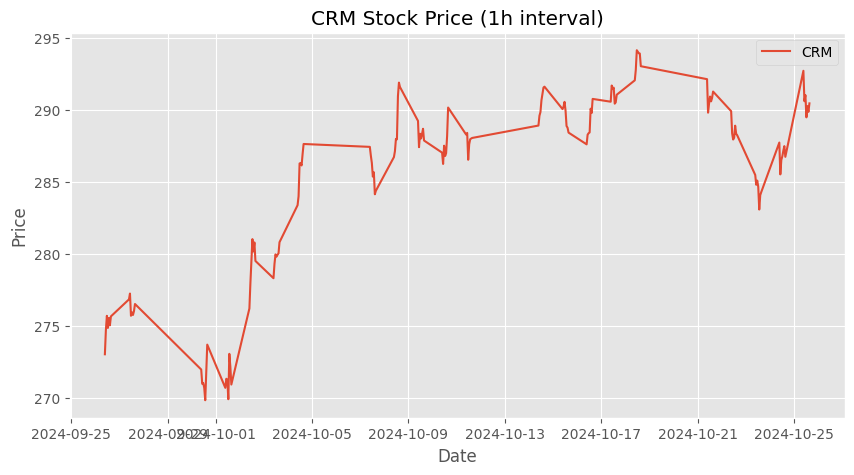

[*********************100%%**********************]  1 of 1 completed

Stock Name: CRM
Average Polarity of Tweets: 0.14670049386116982
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 30 | Neutral Tweets: 87
##############################################################################
Data for CRM (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  270.450012  278.640015  269.380005  276.640015  276.640015   
2024-09-30  273.950012  287.890015  269.140015  287.750000  287.750000   
2024-10-07  286.579987  292.630005  283.380005  288.100006  288.100006   
2024-10-14  289.920013  294.709991  284.230011  292.940002  292.940002   
2024-10-21  289.000000  294.380005  282.619995  290.459991  290.459991   

              Volume  
Date                  
2024-09-23  18393500  
2024-09-30  27940200  
2024-10-07  22419400  
2024-10-14  16908200  
2024-10-21  18952297  


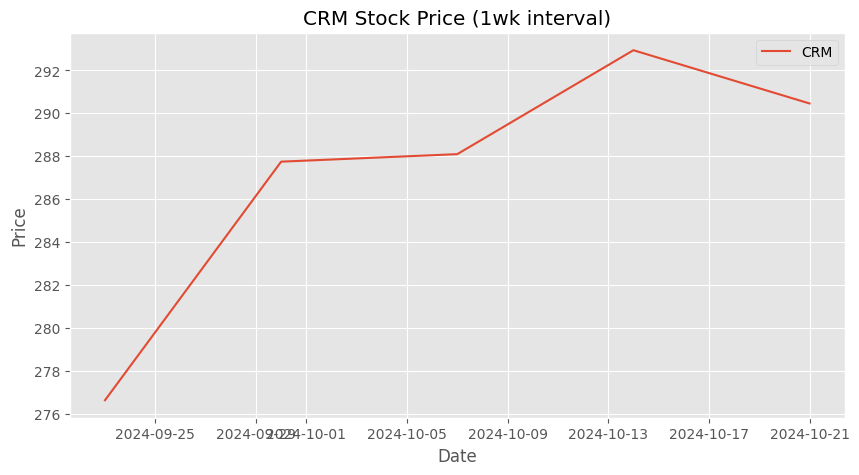

[*********************100%%**********************]  1 of 1 completed

Stock Name: CRM
Average Polarity of Tweets: 0.14670049386116982
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 30 | Neutral Tweets: 87
##############################################################################
Data for CRM (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  274.140015  294.709991  269.690002  290.459991  290.459991   

              Volume  
Date                  
2024-10-01  81160397  


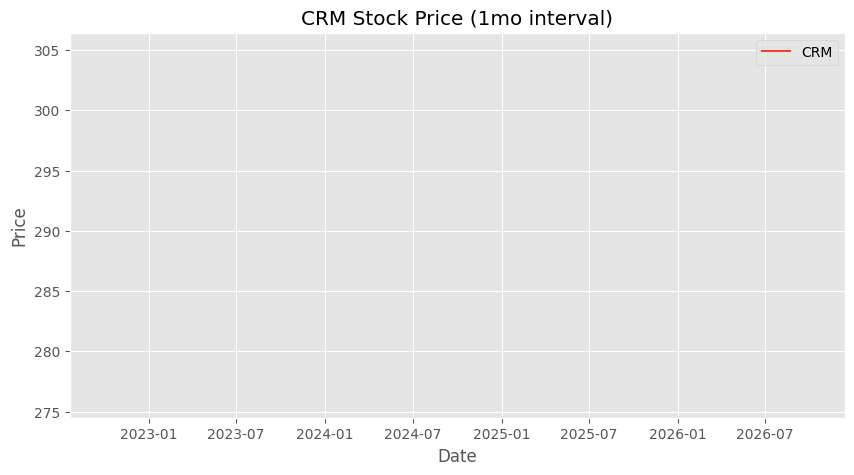

Stock Name: CRM
Average Polarity of Tweets: 0.14670049386116982
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 30 | Neutral Tweets: 87
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for DIS (1d interval):
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2024-10-21  97.199997  97.449997  95.949997  96.620003  96.620003  8189900
2024-10-22  96.199997  97.260002  96.199997  96.739998  96.739998  5344300
2024-10-23  96.930000  97.139999  95.989998  96.239998  96.239998  5388500
2024-10-24  96.599998  96.800003  95.250000  95.400002  95.400002  5015300
2024-10-25  95.809998  96.849998  95.010002  95.029999  95.029999  6631500


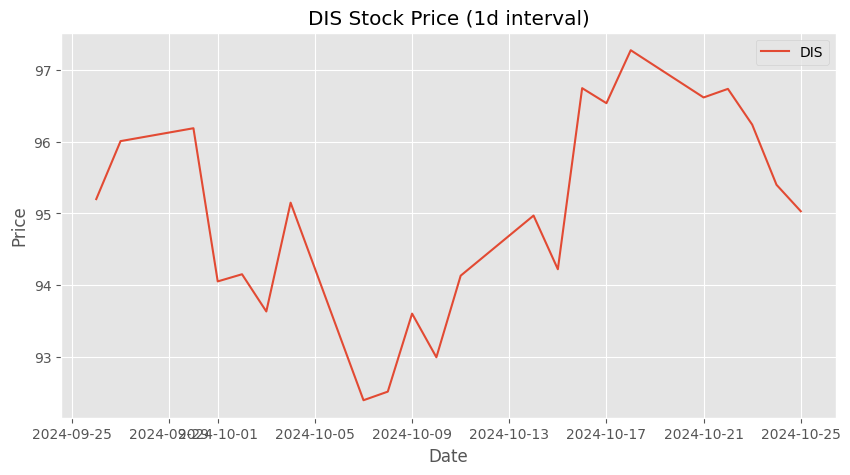

Stock Name: DIS
Average Polarity of Tweets: 0.0991139862860757
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 267 | Negative Tweets: 104 | Neutral Tweets: 264
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for DIS (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  95.144997  95.165001  95.129997  95.144997   
2024-10-25 15:40:00-04:00  95.144997  95.209999  95.099998  95.198097   
2024-10-25 15:45:00-04:00  95.195000  95.214996  95.150002  95.180000   
2024-10-25 15:50:00-04:00  95.190002  95.235001  95.099998  95.190002   
2024-10-25 15:55:00-04:00  95.180000  95.190002  95.010002  95.029999   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 15:35:00-04:00  95.144997   82168  
2024-10-25 15:40:00-04:00  95.198097  101104  
2024-10-25 15:45:00-04:00  95.180000  121029  
2024-10-25 15:50:00-04:00  95.190002  192088  
2024-10-25 15:55:00-04:00  95.029999  393688  


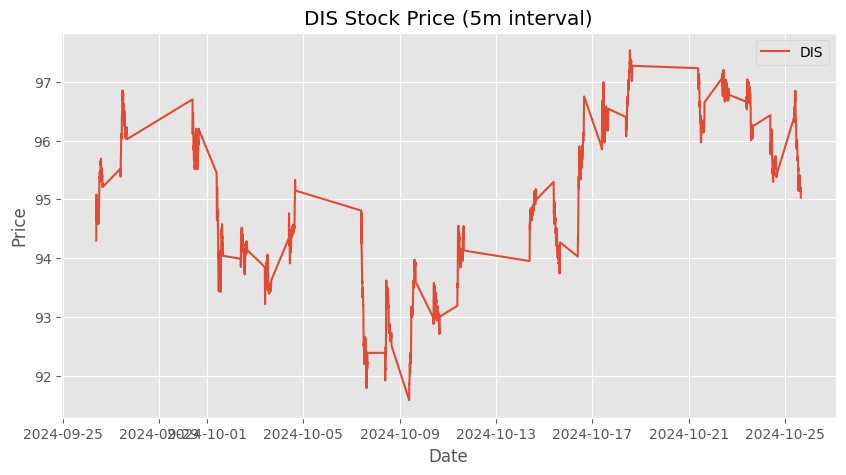

Stock Name: DIS
Average Polarity of Tweets: 0.0991139862860757
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 267 | Negative Tweets: 104 | Neutral Tweets: 264
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for DIS (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  95.995003  96.065002  95.805000  95.856003   
2024-10-25 12:30:00-04:00  95.860001  95.879997  95.349998  95.535004   
2024-10-25 13:30:00-04:00  95.529999  95.529999  95.050003  95.389999   
2024-10-25 14:30:00-04:00  95.379997  95.440002  95.139999  95.195000   
2024-10-25 15:30:00-04:00  95.199699  95.235001  95.010002  95.029999   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  95.856003   504408  
2024-10-25 12:30:00-04:00  95.535004   517844  
2024-10-25 13:30:00-04:00  95.389999  1650796  
2024-10-25 14:30:00-04:00  95.195000   676802  
2024-10-25 15:30:00-04:00  95.029999   957011  


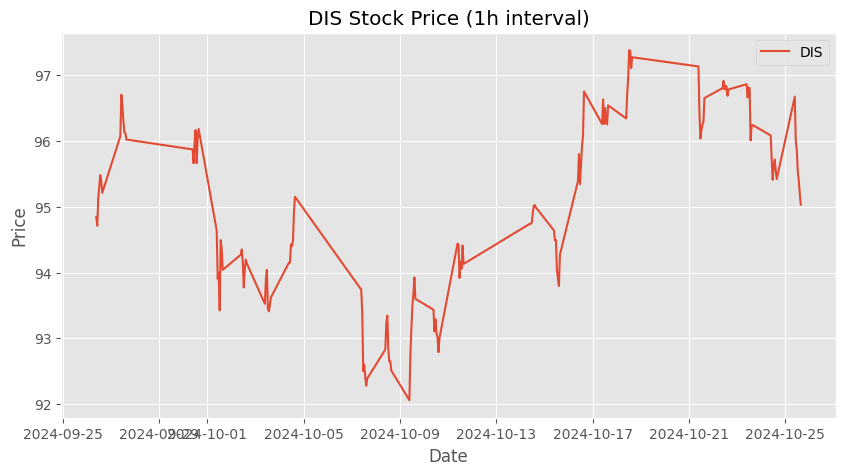

Stock Name: DIS
Average Polarity of Tweets: 0.0991139862860757
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 267 | Negative Tweets: 104 | Neutral Tweets: 264
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for DIS (1wk interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-09-23  93.639999  96.900002  93.349998  96.010002  96.010002  28625200
2024-09-30  96.849998  97.570000  93.129997  95.150002  95.150002  36714900
2024-10-07  95.089996  95.139999  91.459999  94.129997  94.129997  44694300
2024-10-14  94.180000  97.540001  93.629997  97.279999  97.279999  40886300
2024-10-21  97.199997  97.449997  95.010002  95.029999  95.029999  37191310


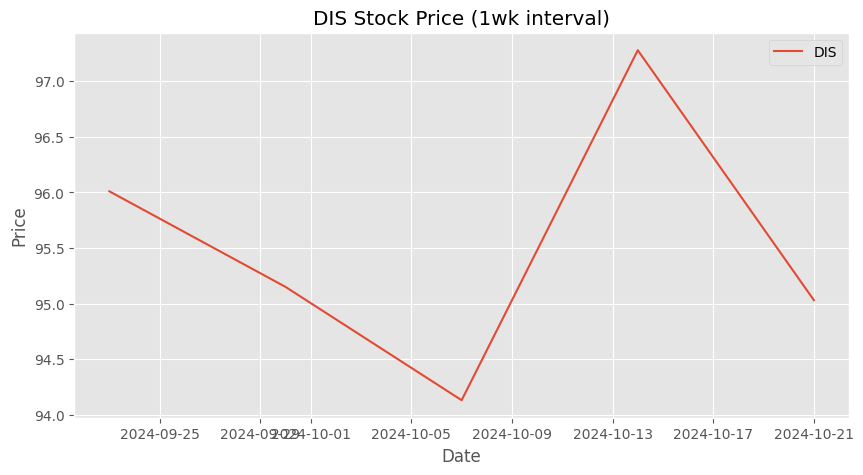

Stock Name: DIS
Average Polarity of Tweets: 0.0991139862860757
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 267 | Negative Tweets: 104 | Neutral Tweets: 264
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for DIS (1mo interval):
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2024-10-01  95.190002  97.540001  91.459999  95.029999  95.029999  151504510


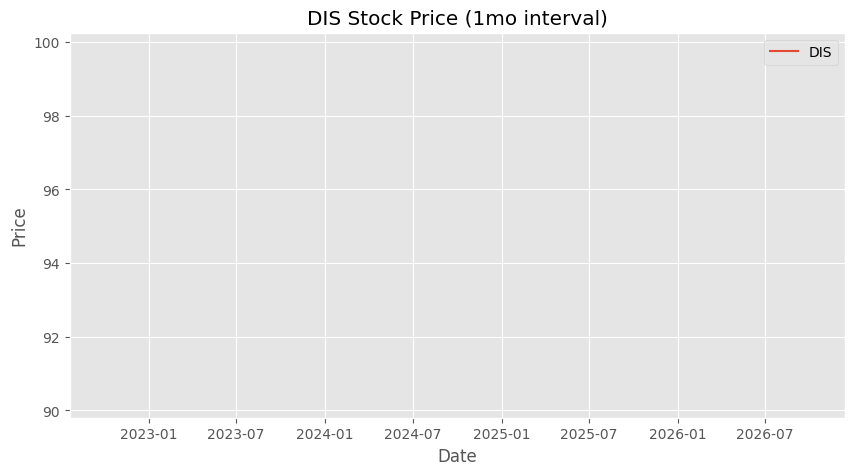

Stock Name: DIS
Average Polarity of Tweets: 0.0991139862860757
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 267 | Negative Tweets: 104 | Neutral Tweets: 264
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ENPH (1d interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-10-21  90.910004  91.900002  88.910004  90.419998  90.419998   3349600
2024-10-22  91.000000  92.620003  89.779999  92.230003  92.230003   7103000
2024-10-23  76.849998  81.269997  76.680000  78.470001  78.470001  19782800
2024-10-24  79.599998  83.059998  79.040001  81.099998  81.099998   6487800
2024-10-25  81.410004  84.300003  79.550003  83.830002  83.830002   4425700


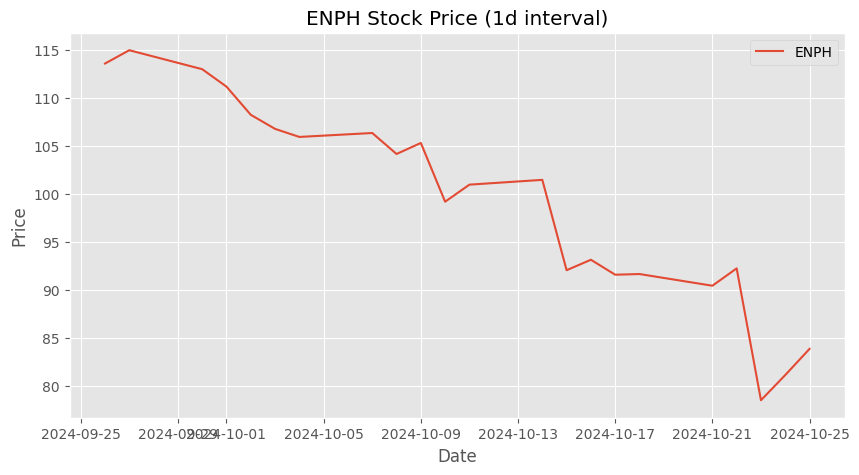

Stock Name: ENPH
Average Polarity of Tweets: 0.13727837141333338
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 133 | Negative Tweets: 30 | Neutral Tweets: 53
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ENPH (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  83.589996  83.915001  83.589996  83.870003   
2024-10-25 15:40:00-04:00  83.860001  84.180000  83.860001  84.139999   
2024-10-25 15:45:00-04:00  84.120003  84.127998  83.860001  83.940002   
2024-10-25 15:50:00-04:00  83.959999  83.989998  83.739998  83.760002   
2024-10-25 15:55:00-04:00  83.720001  83.860001  83.510002  83.830002   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 15:35:00-04:00  83.870003   46053  
2024-10-25 15:40:00-04:00  84.139999   78364  
2024-10-25 15:45:00-04:00  83.940002   51617  
2024-10-25 15:50:00-04:00  83.760002  110655  
2024-10-25 15:55:00-04:00  83.830002  269440  


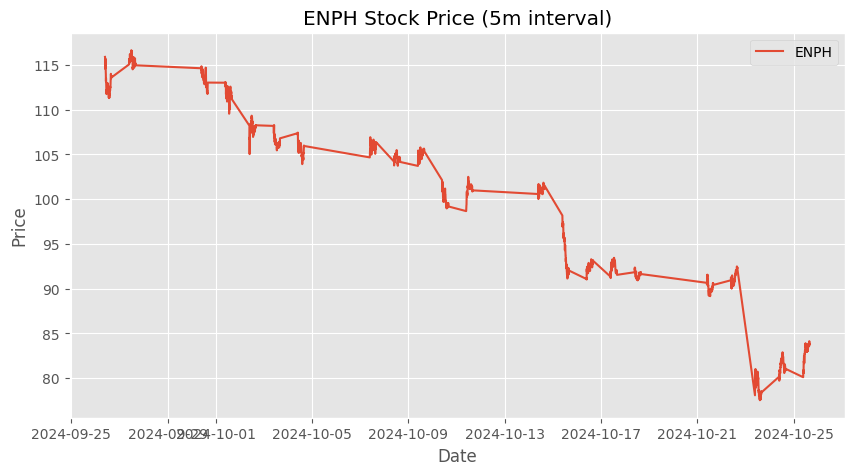

Stock Name: ENPH
Average Polarity of Tweets: 0.13727837141333338
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 133 | Negative Tweets: 30 | Neutral Tweets: 53
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ENPH (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  82.809998  84.300003  82.809998  83.684998   
2024-10-25 12:30:00-04:00  83.687500  83.716904  82.629997  83.360603   
2024-10-25 13:30:00-04:00  83.360001  83.650002  82.810097  83.510002   
2024-10-25 14:30:00-04:00  83.519897  83.930000  83.430000  83.775002   
2024-10-25 15:30:00-04:00  83.775002  84.180000  83.510002  83.830002   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 11:30:00-04:00  83.684998  767709  
2024-10-25 12:30:00-04:00  83.360603  487412  
2024-10-25 13:30:00-04:00  83.510002  341167  
2024-10-25 14:30:00-04:00  83.775002  420214  
2024-10-25 15:30:00-04:00  83.830002  597563  


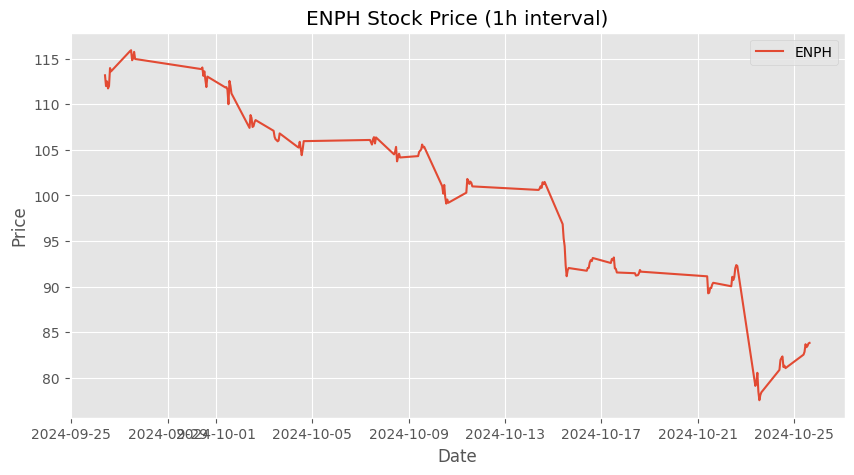

Stock Name: ENPH
Average Polarity of Tweets: 0.13727837141333338
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 133 | Negative Tweets: 30 | Neutral Tweets: 53
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ENPH (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  116.750000  117.379997  111.150002  115.000000  115.000000   
2024-09-30  114.559998  116.410004  103.839996  105.949997  105.949997   
2024-10-07  105.500000  107.139999   98.360001  100.970001  100.970001   
2024-10-14  101.000000  102.000000   90.769997   91.639999   91.639999   
2024-10-21   90.910004   92.620003   76.680000   83.830002   83.830002   

              Volume  
Date                  
2024-09-23   6735900  
2024-09-30  10799100  
2024-10-07  12707500  
2024-10-14  18425300  
2024-10-21  45577456  


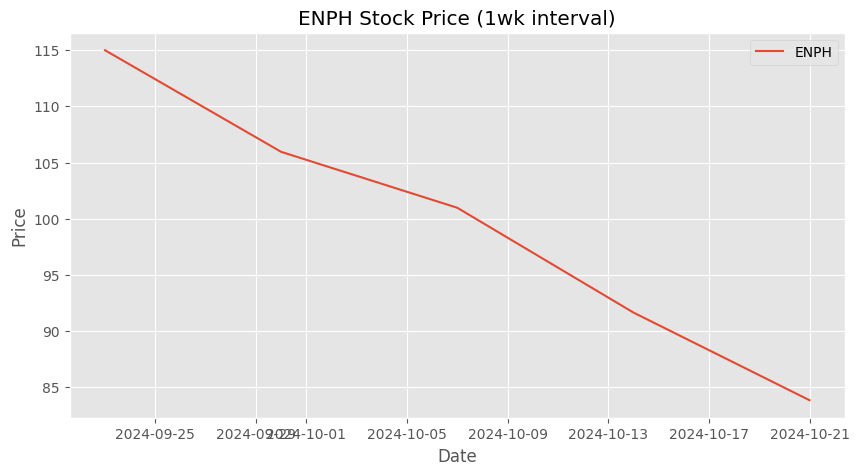

Stock Name: ENPH
Average Polarity of Tweets: 0.13727837141333338
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 133 | Negative Tweets: 30 | Neutral Tweets: 53
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ENPH (1mo interval):
                  Open        High    Low      Close  Adj Close    Volume
Date                                                                     
2024-10-01  113.050003  113.830002  76.68  83.830002  83.830002  85489956


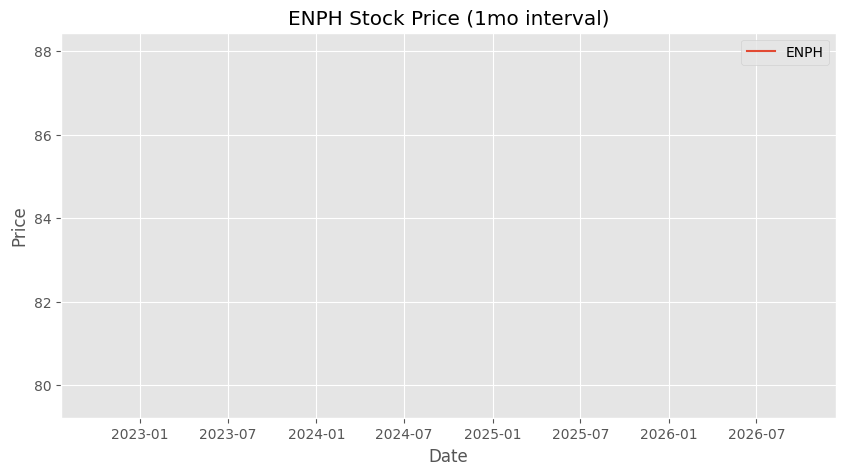

[*********************100%%**********************]  1 of 1 completed

Stock Name: ENPH
Average Polarity of Tweets: 0.13727837141333338
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 133 | Negative Tweets: 30 | Neutral Tweets: 53
##############################################################################


Data for F (1d interval):
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2024-10-21  11.08  11.16  10.86  10.88      10.88  41008600
2024-10-22  10.92  11.15  10.92  11.11      11.11  51597600
2024-10-23  11.11  11.24  11.02  11.06      11.06  37335400
2024-10-24  11.24  11.25  11.07  11.24      11.24  44736400
2024-10-25  11.28  11.33  11.02  11.07      11.07  38906600


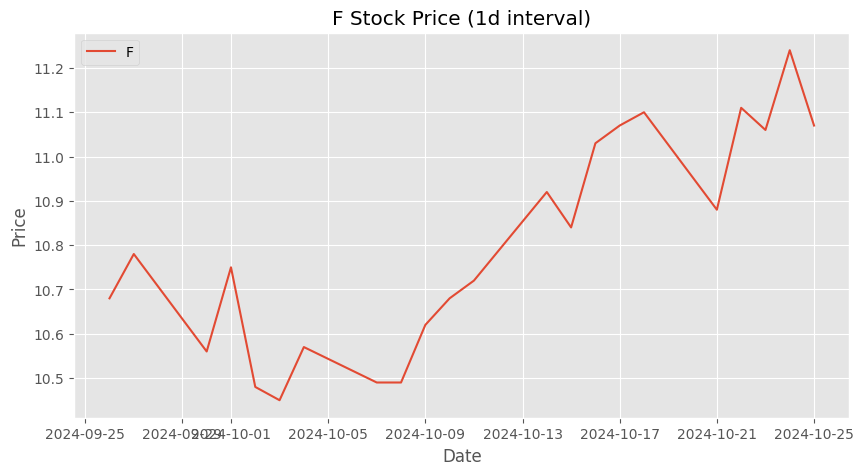

Stock Name: F
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for F (5m interval):
                              Open  High    Low   Close  Adj Close   Volume
Datetime                                                                   
2024-10-25 15:35:00-04:00  11.0877  11.1  11.08  11.095     11.095   367421
2024-10-25 15:40:00-04:00  11.0950  11.1  11.09  11.095     11.095   357691
2024-10-25 15:45:00-04:00  11.0950  11.1  11.09  11.095     11.095   505750
2024-10-25 15:50:00-04:00  11.1000  11.1  11.09  11.095     11.095   744927
2024-10-25 15:55:00-04:00  11.0950  11.1  11.06  11.075     11.075  2775411


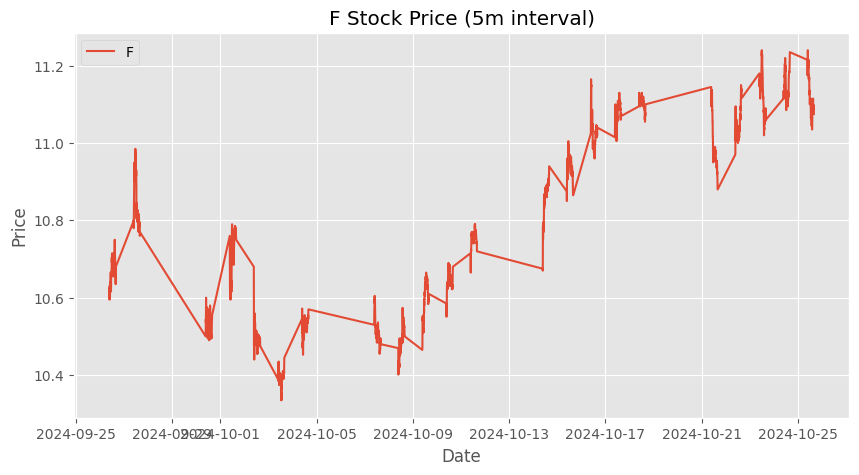

[*********************100%%**********************]  1 of 1 completed

Stock Name: F
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


Data for F (1h interval):
                             Open   High     Low   Close  Adj Close   Volume
Datetime                                                                    
2024-10-25 11:30:00-04:00  11.125  11.15  11.100  11.115     11.115  4005443
2024-10-25 12:30:00-04:00  11.115  11.12  11.050  11.065     11.065  5119219
2024-10-25 13:30:00-04:00  11.065  11.08  11.015  11.075     11.075  4222664
2024-10-25 14:30:00-04:00  11.075  11.12  11.060  11.095     11.095  4841437
2024-10-25 15:30:00-04:00  11.095  11.10  11.060  11.070     11.070  5380113


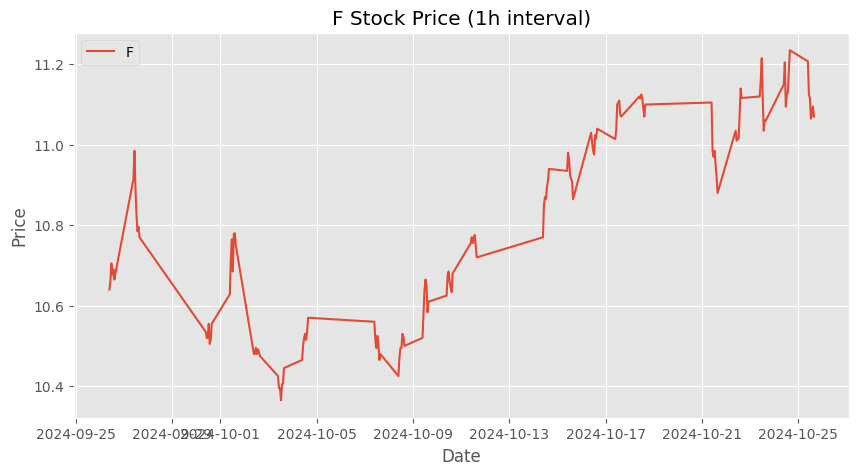

Stock Name: F
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for F (1wk interval):
             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2024-09-23  10.59  10.99  10.32  10.78      10.78  170987700
2024-09-30  10.48  10.82  10.33  10.57      10.57  265424600
2024-10-07  10.55  10.80  10.38  10.72      10.72  196145800
2024-10-14  10.71  11.18  10.66  11.10      11.10  205725800
2024-10-21  11.08  11.33  10.86  11.07      11.07  252386786


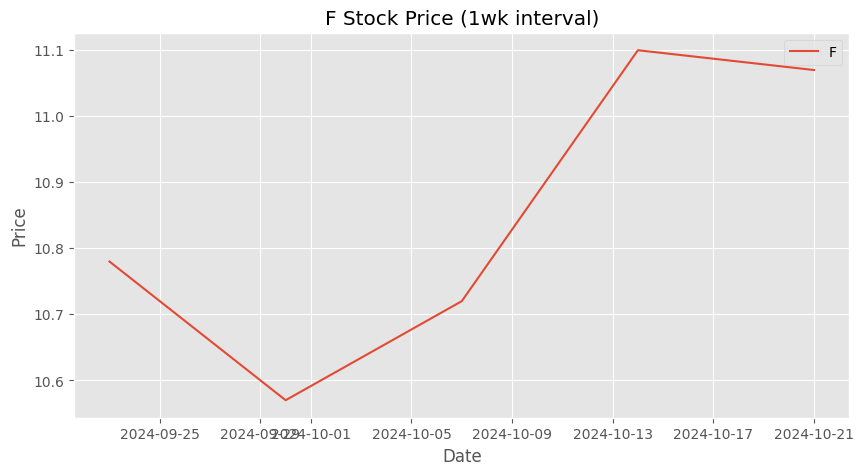

Stock Name: F
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for F (1mo interval):
             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2024-10-01  10.72  11.33  10.33  11.07      11.07  860020086


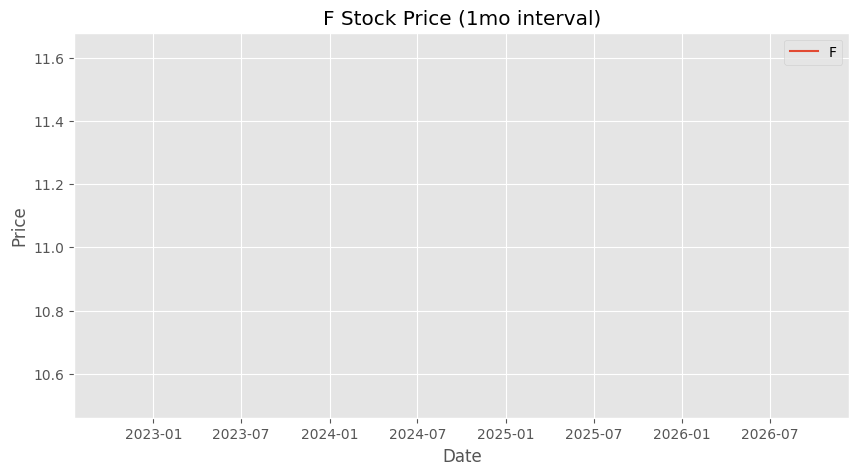

Stock Name: F
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for GOOG (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  164.580002  166.220001  164.304993  165.800003  165.800003   
2024-10-22  164.699997  167.470001  164.669998  166.820007  166.820007   
2024-10-23  166.429993  167.600006  163.632996  164.479996  164.479996   
2024-10-24  164.589996  165.050003  162.770004  164.529999  164.529999   
2024-10-25  165.365005  167.399994  165.229996  166.990005  166.990005   

              Volume  
Date                  
2024-10-21  11384000  
2024-10-22  11958600  
2024-10-23  12754300  
2024-10-24  12764400  
2024-10-25  14546900  


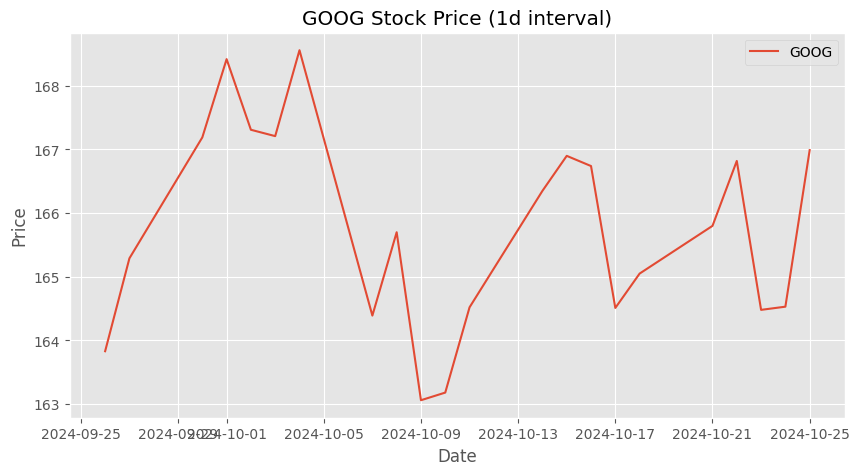

Stock Name: GOOG
Average Polarity of Tweets: 0.12249174280132719
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 675 | Negative Tweets: 197 | Neutral Tweets: 419
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for GOOG (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  166.819901  166.919998  166.789993  166.899994   
2024-10-25 15:40:00-04:00  166.880005  166.940002  166.809998  166.830093   
2024-10-25 15:45:00-04:00  166.839996  167.164993  166.800095  167.070007   
2024-10-25 15:50:00-04:00  167.119995  167.179993  166.979996  167.070007   
2024-10-25 15:55:00-04:00  167.050003  167.110001  166.669998  166.979996   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  166.899994   64203  
2024-10-25 15:40:00-04:00  166.830093   88120  
2024-10-25 15:45:00-04:00  167.070007  194141  
2024-10-25 15:50:00-04:00  167.070007  265457  
2024-10-25 15:55:00-04:00  166.979996  569018  


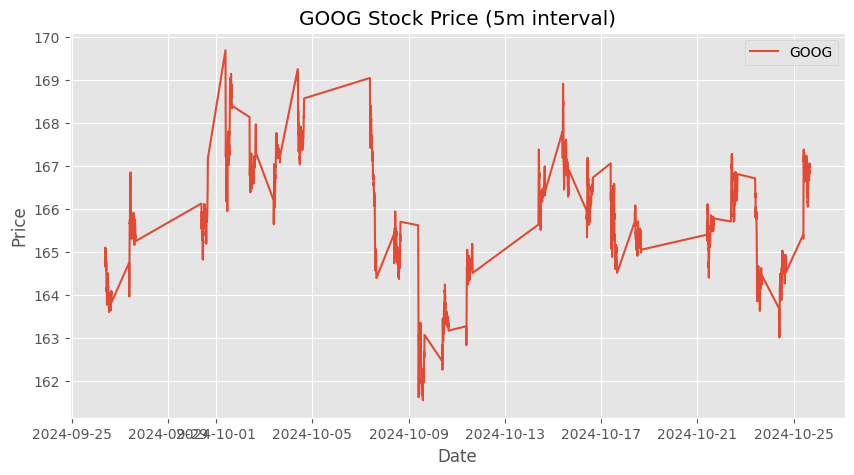

Stock Name: GOOG
Average Polarity of Tweets: 0.12249174280132719
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 675 | Negative Tweets: 197 | Neutral Tweets: 419
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for GOOG (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  166.860001  167.195007  166.550003  167.169998   
2024-10-25 12:30:00-04:00  167.190002  167.300003  166.440002  166.673904   
2024-10-25 13:30:00-04:00  166.665497  166.860001  165.949997  166.779999   
2024-10-25 14:30:00-04:00  166.770004  167.076004  166.630005  166.770004   
2024-10-25 15:30:00-04:00  166.759995  167.179993  166.669998  166.990005   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  167.169998   881608  
2024-10-25 12:30:00-04:00  166.673904   847223  
2024-10-25 13:30:00-04:00  166.779999  1259371  
2024-10-25 14:30:00-04:00  166.770004   940318  
2024-10-25 15:30:00-04:00  166.990005  1268783  


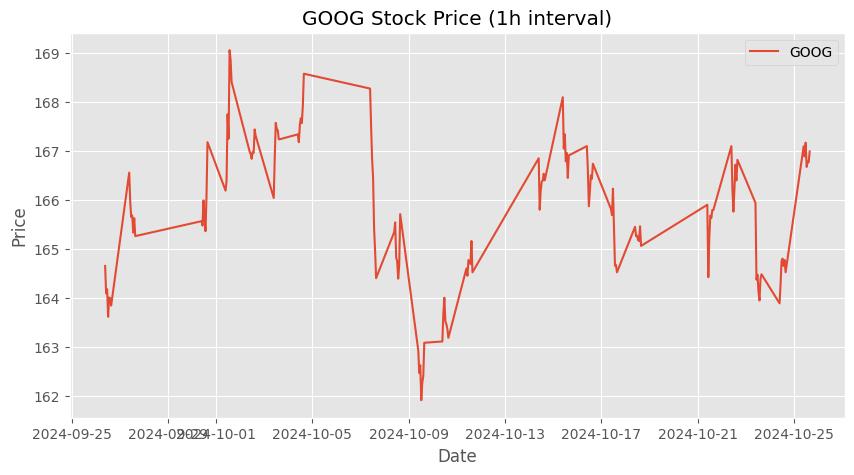

[*********************100%%**********************]  1 of 1 completed

Stock Name: GOOG
Average Polarity of Tweets: 0.12249174280132719
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 675 | Negative Tweets: 197 | Neutral Tweets: 419
##############################################################################
Data for GOOG (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  162.970001  166.970001  162.774994  165.289993  165.289993   
2024-09-30  164.779999  170.440002  164.639999  168.559998  168.559998   
2024-10-07  169.139999  169.899994  161.119995  164.520004  164.520004   
2024-10-14  164.910004  169.089996  164.369995  165.050003  165.050003   
2024-10-21  164.580002  167.600006  162.770004  166.990005  166.990005   

              Volume  
Date                  
2024-09-23  45446700  
2024-09-30  67871000  
2024-10-07  69271500  
2024-10-14  62984300  
2024-10-21  77974610  


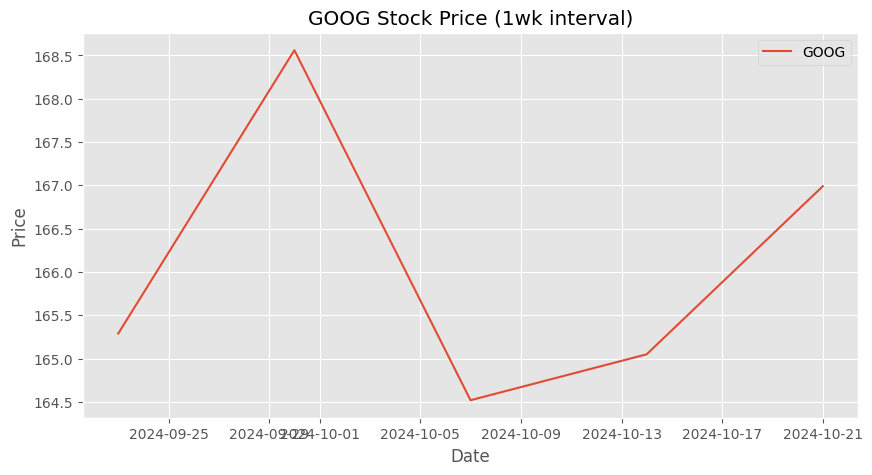

[*********************100%%**********************]  1 of 1 completed

Stock Name: GOOG
Average Polarity of Tweets: 0.12249174280132719
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 675 | Negative Tweets: 197 | Neutral Tweets: 419
##############################################################################


Data for GOOG (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  168.860001  170.440002  161.119995  166.990005  166.990005   

               Volume  
Date                   
2024-10-01  264031310  


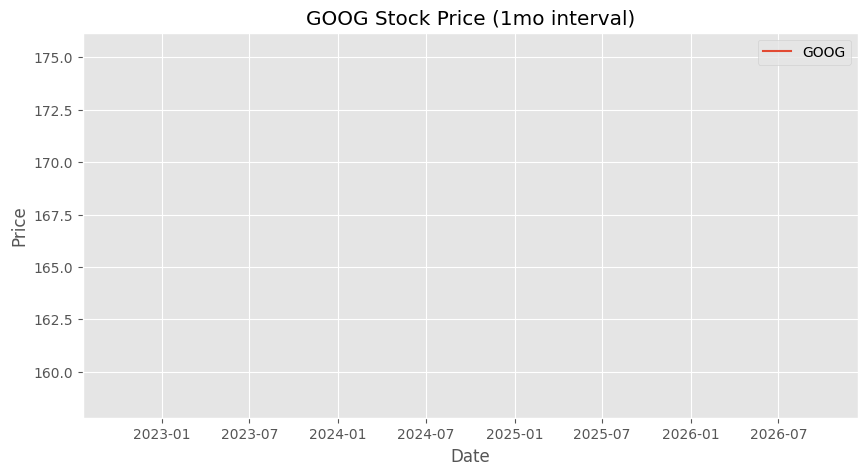

Stock Name: GOOG
Average Polarity of Tweets: 0.12249174280132719
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 675 | Negative Tweets: 197 | Neutral Tweets: 419
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for INTC (1d interval):
                 Open       High        Low  Close  Adj Close    Volume
Date                                                                   
2024-10-21  22.610001  22.879999  22.250000  22.84      22.84  39727000
2024-10-22  22.730000  22.820000  22.170000  22.40      22.40  50160400
2024-10-23  22.299999  22.430000  21.580000  21.98      21.98  45799100
2024-10-24  22.090000  22.370001  21.969999  22.34      22.34  40554400
2024-10-25  22.420000  23.340000  22.410000  22.68      22.68  67376400


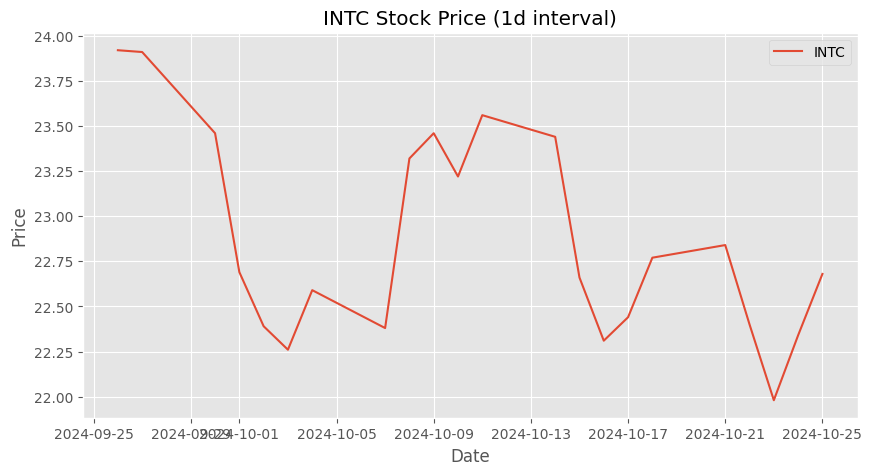

Stock Name: INTC
Average Polarity of Tweets: 0.10824135165770653
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 158 | Negative Tweets: 42 | Neutral Tweets: 115
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for INTC (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  22.795000  22.839899  22.780001  22.834999   
2024-10-25 15:40:00-04:00  22.834999  22.887501  22.825001  22.855000   
2024-10-25 15:45:00-04:00  22.855000  22.870001  22.830000  22.834999   
2024-10-25 15:50:00-04:00  22.840000  22.844999  22.764999  22.809999   
2024-10-25 15:55:00-04:00  22.799999  22.805000  22.670000  22.670000   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  22.834999   478313  
2024-10-25 15:40:00-04:00  22.855000   542292  
2024-10-25 15:45:00-04:00  22.834999   435514  
2024-10-25 15:50:00-04:00  22.809999  1200053  
2024-10-25 15:55:00-04:00  22.670000  2837115  


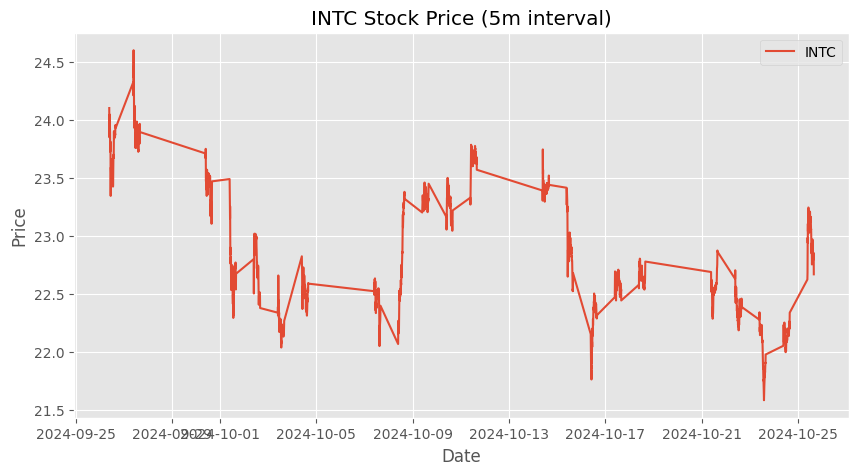

[*********************100%%**********************]  1 of 1 completed

Stock Name: INTC
Average Polarity of Tweets: 0.10824135165770653
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 158 | Negative Tweets: 42 | Neutral Tweets: 115
##############################################################################
Data for INTC (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  23.035999  23.219999  23.030001  23.145000   
2024-10-25 12:30:00-04:00  23.148399  23.180000  22.969999  22.988800   
2024-10-25 13:30:00-04:00  22.980000  22.980000  22.730000  22.929899   
2024-10-25 14:30:00-04:00  22.924999  22.985001  22.799999  22.810101   
2024-10-25 15:30:00-04:00  22.809999  22.887501  22.670000  22.680000   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  23.145000  3887583  
2024-10-25 12:30:00-04:00  22.988800  39296

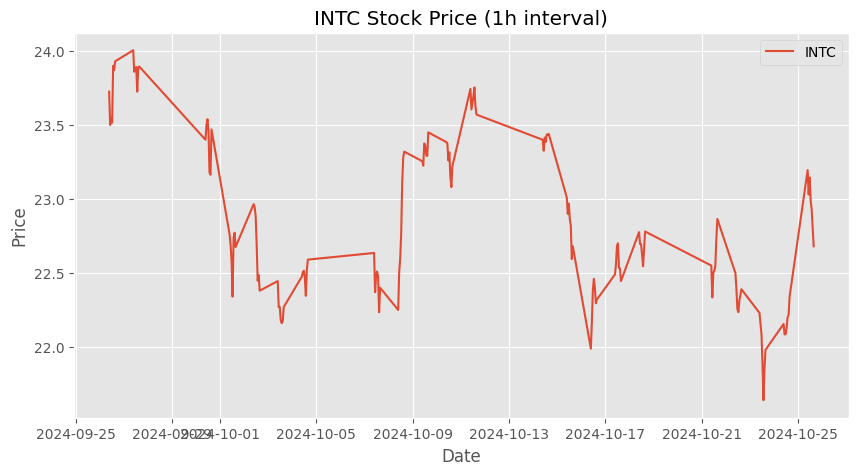

[*********************100%%**********************]  1 of 1 completed

Stock Name: INTC
Average Polarity of Tweets: 0.10824135165770653
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 158 | Negative Tweets: 42 | Neutral Tweets: 115
##############################################################################
Data for INTC (1wk interval):
                 Open       High    Low      Close  Adj Close     Volume
Date                                                                    
2024-09-23  22.799999  24.660000  22.73  23.910000  23.910000  298313600
2024-09-30  23.740000  23.950001  21.65  22.590000  22.590000  311097900
2024-10-07  22.400000  23.820000  22.02  23.559999  23.559999  246798100
2024-10-14  23.580000  23.770000  21.74  22.770000  22.770000  250235300
2024-10-21  22.610001  23.340000  21.58  22.680000  22.680000  311120284


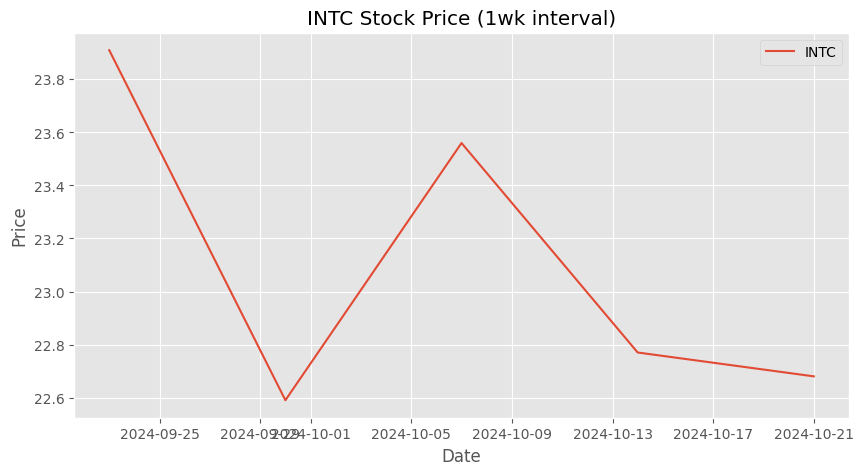

[*********************100%%**********************]  1 of 1 completed

Stock Name: INTC
Average Polarity of Tweets: 0.10824135165770653
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 158 | Negative Tweets: 42 | Neutral Tweets: 115
##############################################################################
Data for INTC (1mo interval):
                 Open   High    Low  Close  Adj Close      Volume
Date                                                             
2024-10-01  23.459999  23.82  21.58  22.68      22.68  1052943384


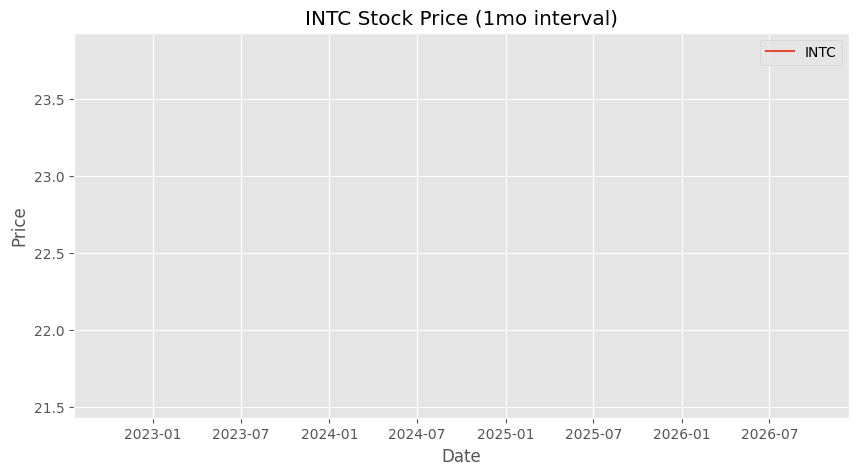

Stock Name: INTC
Average Polarity of Tweets: 0.10824135165770653
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 158 | Negative Tweets: 42 | Neutral Tweets: 115
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for KO (1d interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-10-21  70.000000  70.330002  69.309998  69.449997  69.449997  11981200
2024-10-22  69.000000  69.750000  68.680000  69.449997  69.449997  18603300
2024-10-23  66.989998  68.699997  66.580002  68.010002  68.010002  24655200
2024-10-24  67.650002  68.040001  66.949997  67.300003  67.300003  17568800
2024-10-25  67.070000  67.699997  66.790001  66.919998  66.919998  11134200


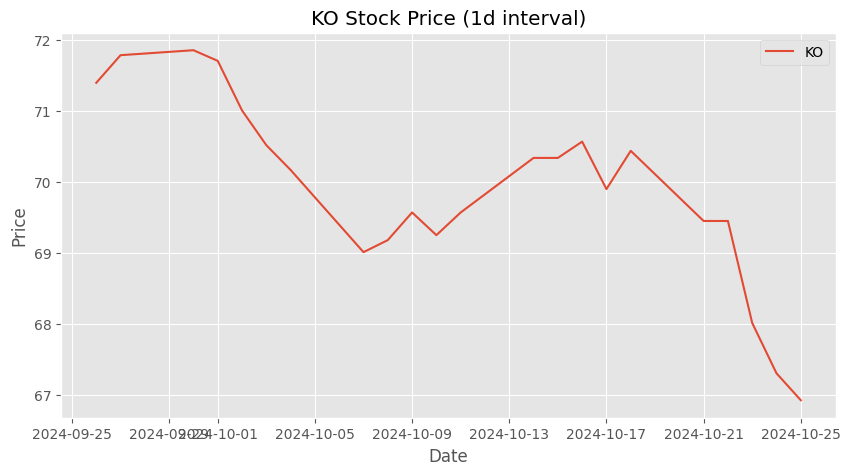

Stock Name: KO
Average Polarity of Tweets: 0.14923805998735434
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 170 | Negative Tweets: 32 | Neutral Tweets: 108
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for KO (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  66.925003  66.945000  66.904999  66.904999   
2024-10-25 15:40:00-04:00  66.904999  66.910004  66.855003  66.864998   
2024-10-25 15:45:00-04:00  66.870003  66.889999  66.819901  66.824997   
2024-10-25 15:50:00-04:00  66.830002  66.879997  66.809998  66.849998   
2024-10-25 15:55:00-04:00  66.845001  66.930000  66.790001  66.919998   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 15:35:00-04:00  66.904999   81966  
2024-10-25 15:40:00-04:00  66.864998  108149  
2024-10-25 15:45:00-04:00  66.824997  155917  
2024-10-25 15:50:00-04:00  66.849998  284388  
2024-10-25 15:55:00-04:00  66.919998  742902  


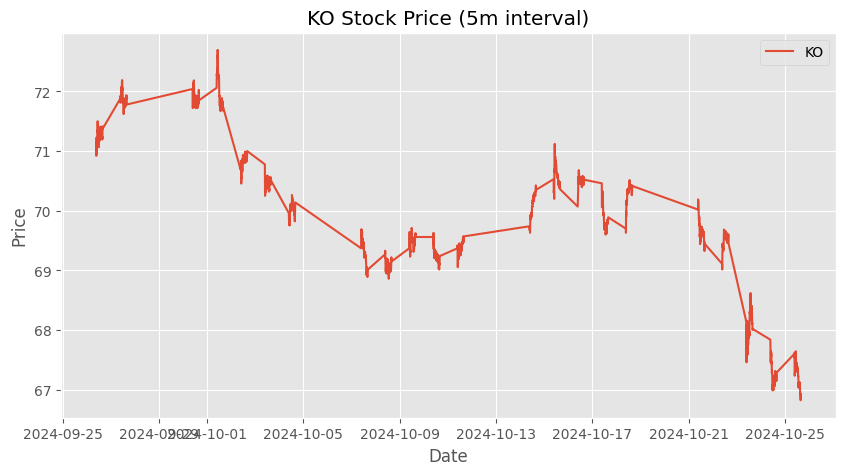

Stock Name: KO
Average Polarity of Tweets: 0.14923805998735434
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 170 | Negative Tweets: 32 | Neutral Tweets: 108
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for KO (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  67.434998  67.470001  67.275002  67.394997   
2024-10-25 12:30:00-04:00  67.394997  67.400002  67.199997  67.230003   
2024-10-25 13:30:00-04:00  67.230003  67.235001  67.029999  67.105003   
2024-10-25 14:30:00-04:00  67.105003  67.154999  66.900002  66.945000   
2024-10-25 15:30:00-04:00  66.940002  66.949997  66.790001  66.919998   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  67.394997   873543  
2024-10-25 12:30:00-04:00  67.230003   605701  
2024-10-25 13:30:00-04:00  67.105003   751629  
2024-10-25 14:30:00-04:00  66.945000   958292  
2024-10-25 15:30:00-04:00  66.919998  1460659  


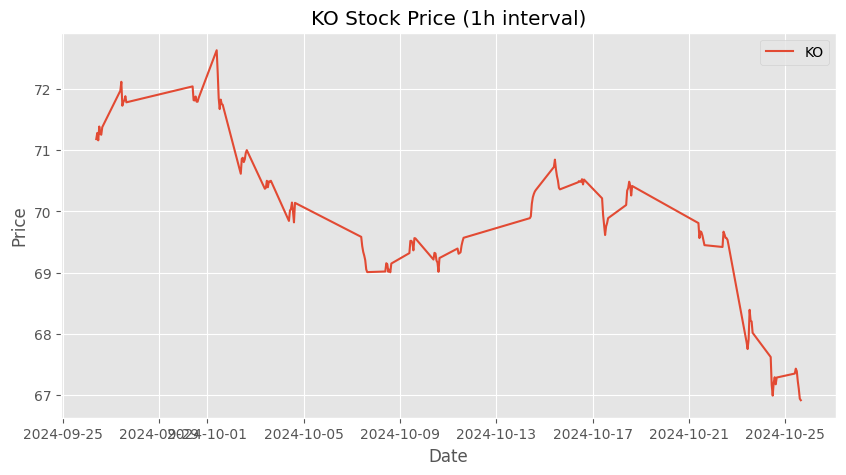

Stock Name: KO
Average Polarity of Tweets: 0.14923805998735434
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 170 | Negative Tweets: 32 | Neutral Tweets: 108
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for KO (1wk interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-09-23  71.709999  72.199997  70.839996  71.790001  71.790001  34320000
2024-09-30  72.000000  72.750000  69.720001  70.169998  70.169998  64524900
2024-10-07  70.050003  70.099998  68.860001  69.570000  69.570000  54520900
2024-10-14  69.570000  71.209999  69.470001  70.440002  70.440002  55717400
2024-10-21  70.000000  70.330002  66.580002  66.919998  66.919998  92086655


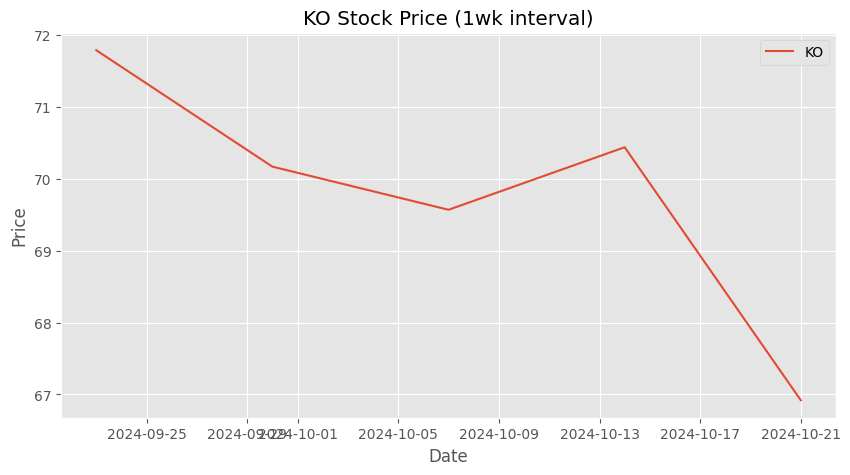

Stock Name: KO
Average Polarity of Tweets: 0.14923805998735434
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 170 | Negative Tweets: 32 | Neutral Tweets: 108
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for KO (1mo interval):
                 Open   High        Low      Close  Adj Close     Volume
Date                                                                    
2024-10-01  72.099998  72.75  66.580002  66.919998  66.919998  248834555


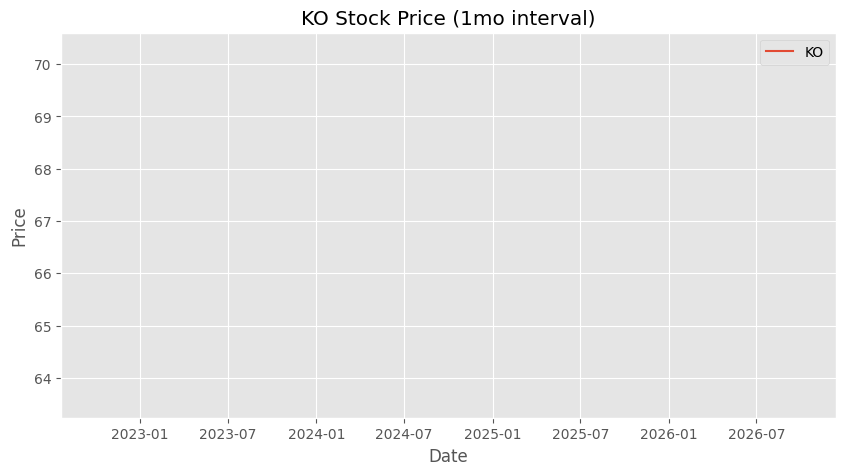

[*********************100%%**********************]  1 of 1 completed

Stock Name: KO
Average Polarity of Tweets: 0.14923805998735434
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 170 | Negative Tweets: 32 | Neutral Tweets: 108
##############################################################################


Data for META (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  576.030029  577.239990  569.109985  575.159973  575.159973   
2024-10-22  574.289978  583.530029  572.119995  582.010010  582.010010   
2024-10-23  579.969971  585.000000  562.500000  563.690002  563.690002   
2024-10-24  567.130005  568.880005  561.520020  567.780029  567.780029   
2024-10-25  573.929993  581.289978  571.719971  573.250000  573.250000   

              Volume  
Date                  
2024-10-21   8171900  
2024-10-22   8544500  
2024-10-23  14248400  
2024-10-24   7184700  
2024-10-25  11318300  


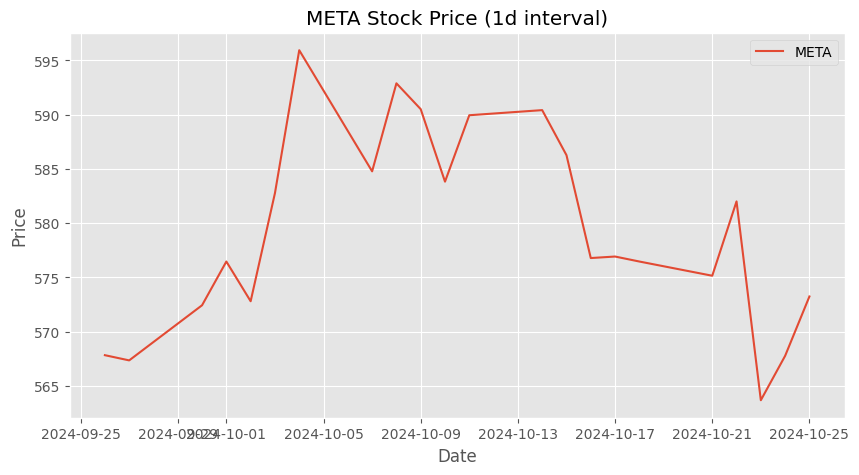

Stock Name: META
Average Polarity of Tweets: 0.08406262541476779
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1277 | Negative Tweets: 581 | Neutral Tweets: 893
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for META (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  574.719971  574.940002  574.450012  574.489990   
2024-10-25 15:40:00-04:00  574.600281  574.820007  574.239990  574.544983   
2024-10-25 15:45:00-04:00  574.494995  574.890015  574.289978  574.789978   
2024-10-25 15:50:00-04:00  574.799988  575.559998  574.469971  574.650024   
2024-10-25 15:55:00-04:00  574.729980  574.729980  573.195007  573.250000   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  574.489990   74462  
2024-10-25 15:40:00-04:00  574.544983   79902  
2024-10-25 15:45:00-04:00  574.789978  252906  
2024-10-25 15:50:00-04:00  574.650024  271241  
2024-10-25 15:55:00-04:00  573.250000  547897  


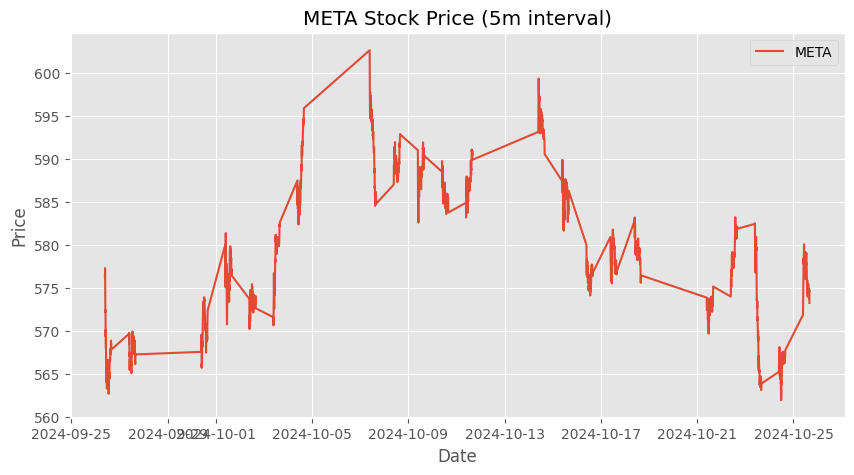

Stock Name: META
Average Polarity of Tweets: 0.08406262541476779
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1277 | Negative Tweets: 581 | Neutral Tweets: 893
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for META (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  577.215027  578.979980  575.380127  578.690002   
2024-10-25 12:30:00-04:00  578.799988  579.719971  575.359985  576.109985   
2024-10-25 13:30:00-04:00  575.929993  576.999878  573.619995  575.039978   
2024-10-25 14:30:00-04:00  574.950012  575.849915  573.554382  573.924988   
2024-10-25 15:30:00-04:00  573.966797  575.559998  573.195007  573.250000   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  578.690002  1209943  
2024-10-25 12:30:00-04:00  576.109985   793727  
2024-10-25 13:30:00-04:00  575.039978   989470  
2024-10-25 14:30:00-04:00  573.924988   589226  
2024-10-25 15:30:00-04:00  573.250000  1306586  


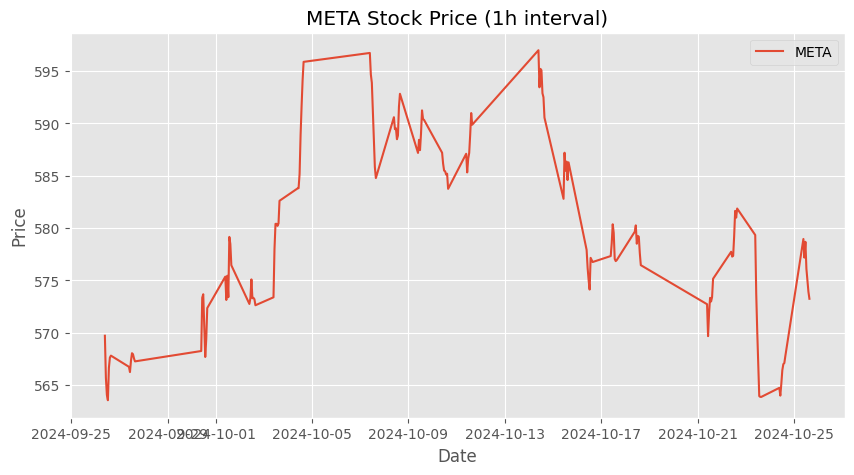

Stock Name: META
Average Polarity of Tweets: 0.08406262541476779
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1277 | Negative Tweets: 581 | Neutral Tweets: 893
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for META (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  564.049988  577.400024  562.349976  567.359985  567.359985   
2024-09-30  567.700012  596.849976  564.799988  595.940002  595.940002   
2024-10-07  598.219971  602.950012  581.609985  589.950012  589.950012   
2024-10-14  594.219971  600.099976  574.030029  576.469971  576.469971   
2024-10-21  576.030029  585.000000  561.520020  573.250000  573.250000   

              Volume  
Date                  
2024-09-23  40342600  
2024-09-30  60326800  
2024-10-07  45728800  
2024-10-14  45480100  
2024-10-21  60805674  


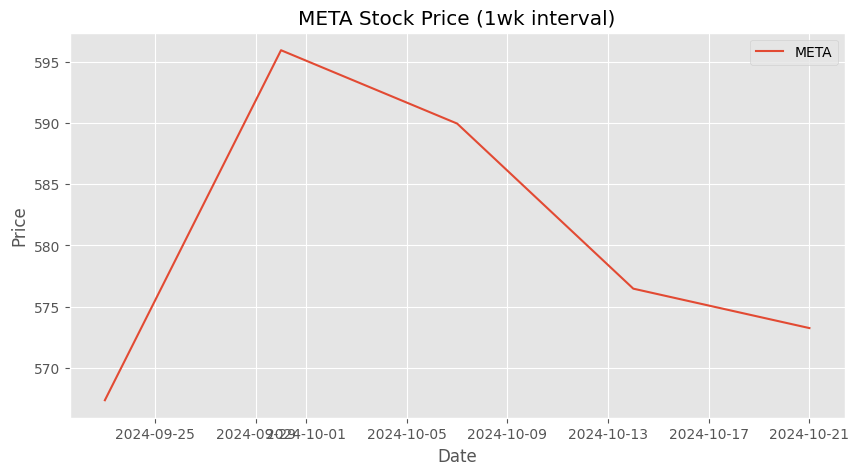

[*********************100%%**********************]  1 of 1 completed

Stock Name: META
Average Polarity of Tweets: 0.08406262541476779
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1277 | Negative Tweets: 581 | Neutral Tweets: 893
##############################################################################


Data for META (1mo interval):
                 Open        High        Low   Close  Adj Close     Volume
Date                                                                      
2024-10-01  577.97998  602.950012  561.52002  573.25     573.25  199549074


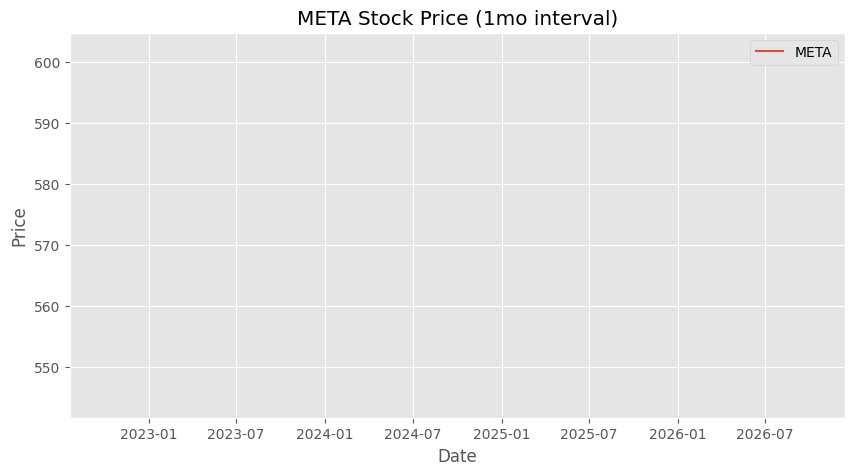

Stock Name: META
Average Polarity of Tweets: 0.08406262541476779
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1277 | Negative Tweets: 581 | Neutral Tweets: 893
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for MSFT (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  416.119995  418.959991  413.750000  418.779999  418.779999   
2024-10-22  418.489990  430.579987  418.040009  427.510010  427.510010   
2024-10-23  430.859985  431.079987  422.529999  424.600006  424.600006   
2024-10-24  425.329987  425.980011  422.399994  424.730011  424.730011   
2024-10-25  426.760010  432.519989  426.570007  428.149994  428.149994   

              Volume  
Date                  
2024-10-21  14206100  
2024-10-22  25482200  
2024-10-23  19654400  
2024-10-24  13581600  
2024-10-25  16888400  


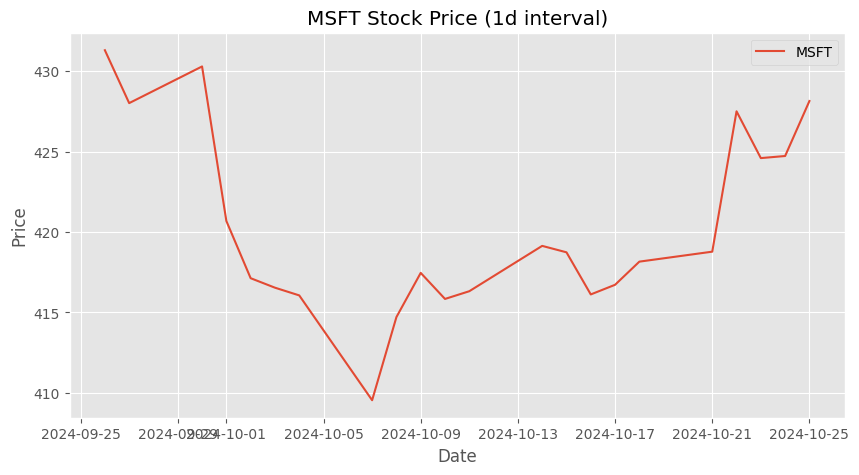

Stock Name: MSFT
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for MSFT (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  428.320007  428.386292  428.079987  428.109985   
2024-10-25 15:40:00-04:00  428.130005  428.179993  427.855988  427.859985   
2024-10-25 15:45:00-04:00  427.890015  428.250000  427.799988  428.173187   
2024-10-25 15:50:00-04:00  428.239990  428.320007  427.609985  427.959991   
2024-10-25 15:55:00-04:00  427.640015  428.399994  427.420013  428.320007   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  428.109985  274354  
2024-10-25 15:40:00-04:00  427.859985   90888  
2024-10-25 15:45:00-04:00  428.173187  106081  
2024-10-25 15:50:00-04:00  427.959991  216122  
2024-10-25 15:55:00-04:00  428.320007  934861  


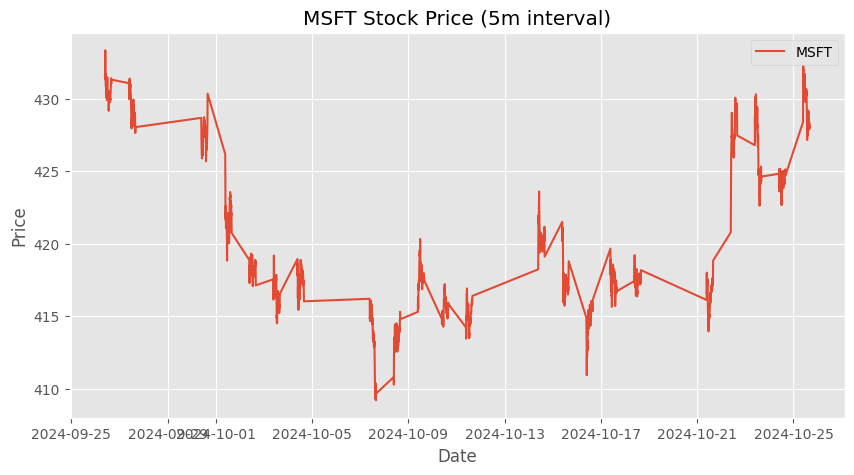

[*********************100%%**********************]  1 of 1 completed

Stock Name: MSFT
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################
Data for MSFT (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  430.819000  430.932312  429.477203  430.683807   
2024-10-25 12:30:00-04:00  430.661713  430.785004  428.410004  428.470215   
2024-10-25 13:30:00-04:00  428.410004  428.859985  426.970001  428.649994   
2024-10-25 14:30:00-04:00  428.690002  429.304993  427.809998  428.492493   
2024-10-25 15:30:00-04:00  428.510010  428.600006  427.420013  428.149994   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  430.683807  2458473  
2024-10-25 12:30:0

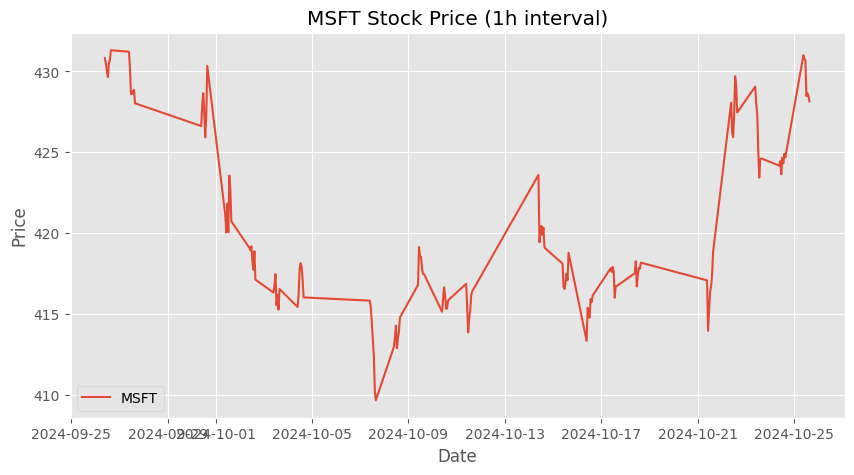

Stock Name: MSFT
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for MSFT (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  429.829987  435.299988  427.470001  428.019989  428.019989   
2024-09-30  428.209991  430.420013  414.290009  416.059998  416.059998   
2024-10-07  416.000000  420.380005  408.170013  416.320007  416.320007   
2024-10-14  417.769989  424.040009  410.480011  418.160004  418.160004   
2024-10-21  416.119995  432.519989  413.750000  428.149994  428.149994   

               Volume  
Date                   
2024-09-23   42784500  
2024-09-30   85338600  
2024-10-07   83116700  
2024-10-14   83027500  
2024-10-21  106711764  


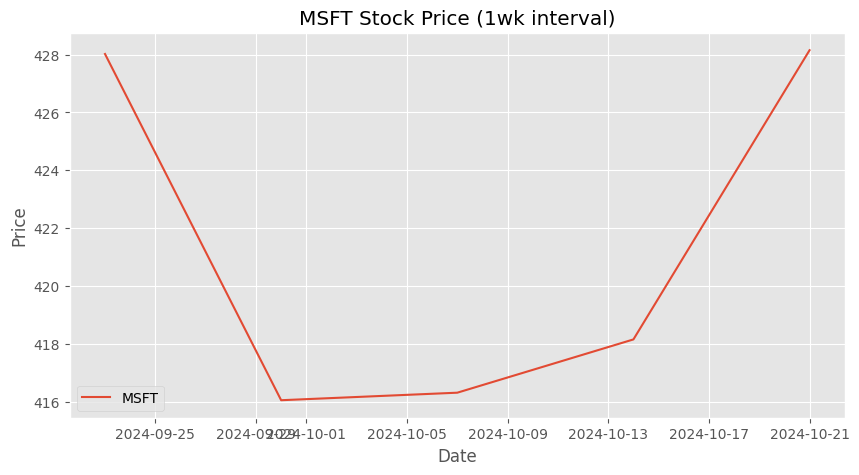

[*********************100%%**********************]  1 of 1 completed

Stock Name: MSFT
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################
Data for MSFT (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  428.450012  432.519989  408.170013  428.149994  428.149994   

               Volume  
Date                   
2024-10-01  341387264  


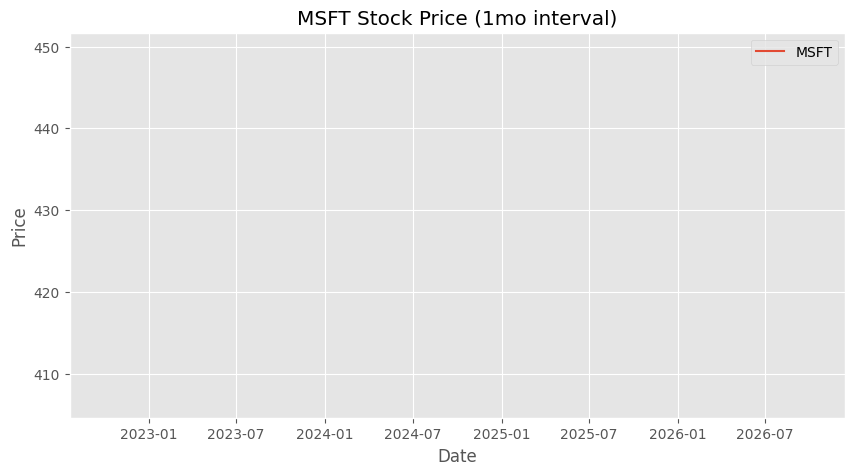

[*********************100%%**********************]  1 of 1 completed

Stock Name: MSFT
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


Data for NFLX (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  765.760010  773.000000  756.599976  772.070007  772.070007   
2024-10-22  765.270020  769.700012  761.119995  764.239990  764.239990   
2024-10-23  762.830017  763.789978  744.260010  749.289978  749.289978   
2024-10-24  751.969971  755.820007  746.250000  754.549988  754.549988   
2024-10-25  756.169983  768.500000  753.530029  754.679993  754.679993   

             Volume  
Date                 
2024-10-21  6057100  
2024-10-22  2987300  
2024-10-23  3749000  
2024-10-24  2643000  
2024-10-25  2818000  


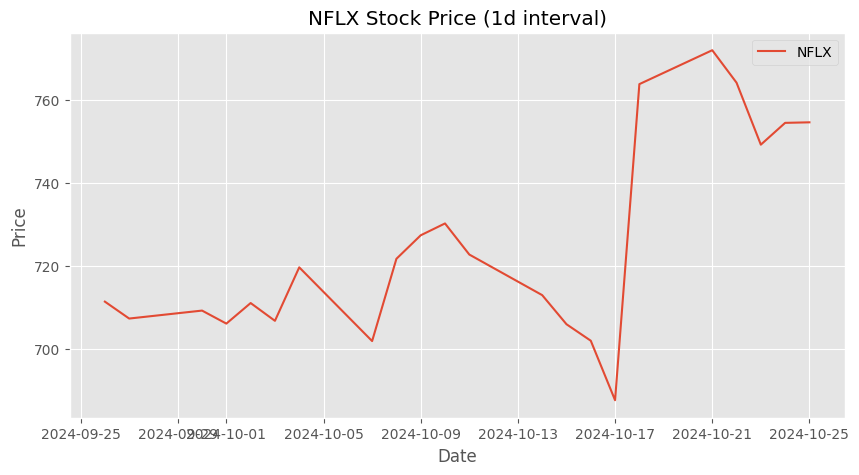

Stock Name: NFLX
Average Polarity of Tweets: 0.07814144307252884
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 710 | Negative Tweets: 366 | Neutral Tweets: 651
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NFLX (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  756.960022  757.439880  756.900024  756.900024   
2024-10-25 15:40:00-04:00  756.869995  757.000000  756.260010  756.520020   
2024-10-25 15:45:00-04:00  756.512024  757.309998  756.400024  757.174988   
2024-10-25 15:50:00-04:00  757.000000  757.049988  755.510010  755.640015   
2024-10-25 15:55:00-04:00  755.650024  755.650024  754.119995  754.869019   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  756.900024   19847  
2024-10-25 15:40:00-04:00  756.520020   25466  
2024-10-25 15:45:00-04:00  757.174988   21707  
2024-10-25 15:50:00-04:00  755.640015   43807  
2024-10-25 15:55:00-04:00  754.869019  188445  


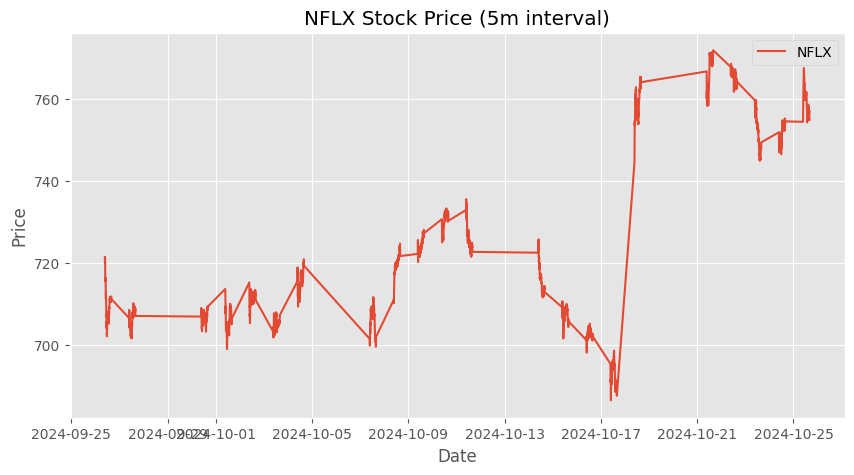

Stock Name: NFLX
Average Polarity of Tweets: 0.07814144307252884
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 710 | Negative Tweets: 366 | Neutral Tweets: 651
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NFLX (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  761.070007  762.079895  759.140015  760.700012   
2024-10-25 12:30:00-04:00  761.109985  762.169983  756.600098  757.309998   
2024-10-25 13:30:00-04:00  757.190002  758.200012  754.120117  757.989929   
2024-10-25 14:30:00-04:00  757.539978  758.979980  756.500000  757.049011   
2024-10-25 15:30:00-04:00  757.039978  757.579895  754.119995  754.679993   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  760.700012  246446  
2024-10-25 12:30:00-04:00  757.309998  204598  
2024-10-25 13:30:00-04:00  757.989929  237150  
2024-10-25 14:30:00-04:00  757.049011  209288  
2024-10-25 15:30:00-04:00  754.679993  322196  


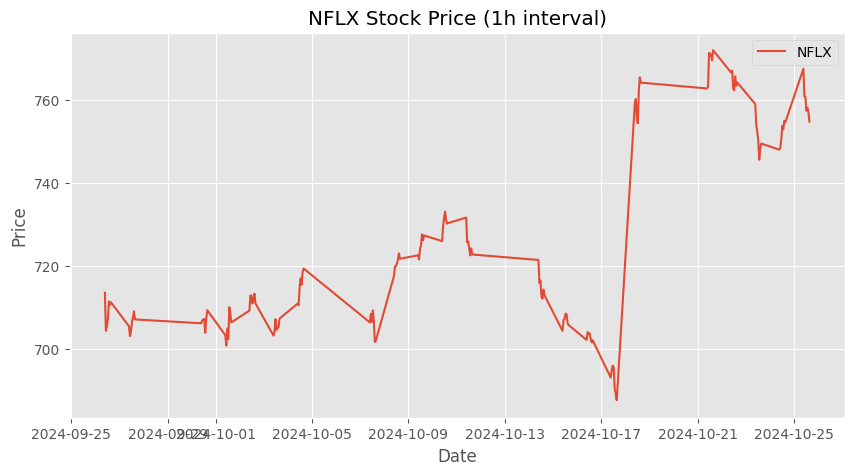

Stock Name: NFLX
Average Polarity of Tweets: 0.07814144307252884
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 710 | Negative Tweets: 366 | Neutral Tweets: 651
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NFLX (1wk interval):
                 Open        High         Low       Close   Adj Close  \
Date                                                                    
2024-09-23  721.00000  725.260010  701.250000  707.349976  707.349976   
2024-09-30  707.00000  721.010010  698.590027  719.700012  719.700012   
2024-10-07  714.76001  736.000000  696.429993  722.789978  722.789978   
2024-10-14  725.00000  766.280029  677.880005  763.890015  763.890015   
2024-10-21  765.76001  773.000000  744.260010  754.679993  754.679993   

              Volume  
Date                  
2024-09-23   7488400  
2024-09-30  10767000  
2024-10-07  13596400  
2024-10-14  33125000  
2024-10-21  21073873  


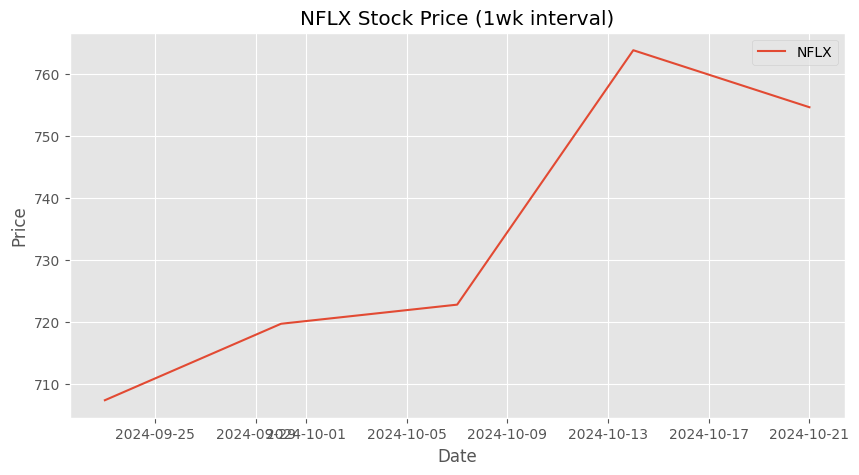

[*********************100%%**********************]  1 of 1 completed

Stock Name: NFLX
Average Polarity of Tweets: 0.07814144307252884
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 710 | Negative Tweets: 366 | Neutral Tweets: 651
##############################################################################
Data for NFLX (1mo interval):
                  Open   High         Low       Close   Adj Close    Volume
Date                                                                       
2024-10-01  713.640015  773.0  677.880005  754.679993  754.679993  76852373


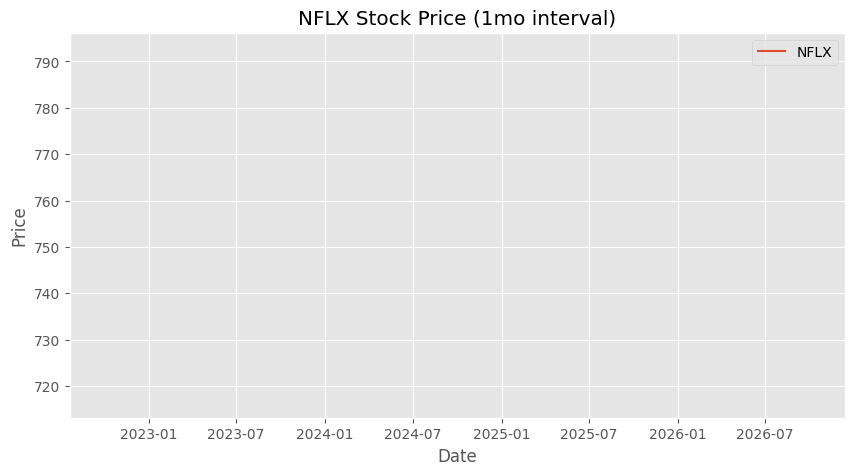

[*********************100%%**********************]  1 of 1 completed

Stock Name: NFLX
Average Polarity of Tweets: 0.07814144307252884
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 710 | Negative Tweets: 366 | Neutral Tweets: 651
##############################################################################
Data for NIO (1d interval):
            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2024-10-21  5.09  5.27  5.05   5.14       5.14  35255300
2024-10-22  5.16  5.35  5.15   5.23       5.23  38285800
2024-10-23  5.22  5.29  5.15   5.19       5.19  36170900
2024-10-24  5.15  5.16  4.96   4.98       4.98  49328700
2024-10-25  5.06  5.35  5.01   5.26       5.26  67631800


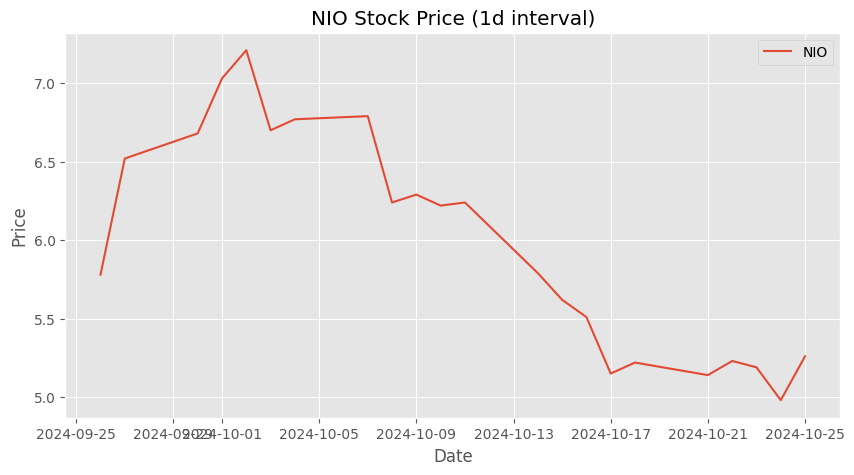

Stock Name: NIO
Average Polarity of Tweets: 0.1314594157367555
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1576 | Negative Tweets: 359 | Neutral Tweets: 1086
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NIO (5m interval):
                            Open   High   Low   Close  Adj Close   Volume
Datetime                                                                 
2024-10-25 15:35:00-04:00  5.235  5.240  5.23  5.2395     5.2395   148645
2024-10-25 15:40:00-04:00  5.240  5.240  5.23  5.2400     5.2400   182500
2024-10-25 15:45:00-04:00  5.240  5.255  5.22  5.2250     5.2250   948135
2024-10-25 15:50:00-04:00  5.230  5.260  5.22  5.2548     5.2548  1444847
2024-10-25 15:55:00-04:00  5.250  5.260  5.25  5.2600     5.2600  1599591


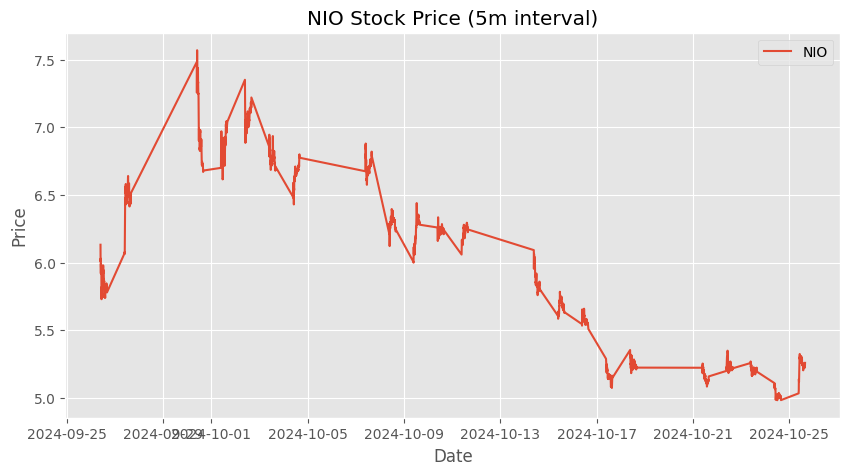

Stock Name: NIO
Average Polarity of Tweets: 0.1314594157367555
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1576 | Negative Tweets: 359 | Neutral Tweets: 1086
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NIO (1h interval):
                            Open  High   Low   Close  Adj Close   Volume
Datetime                                                                
2024-10-25 11:30:00-04:00  5.266  5.32  5.25  5.2999     5.2999  6007547
2024-10-25 12:30:00-04:00  5.290  5.30  5.24  5.2550     5.2550  4302031
2024-10-25 13:30:00-04:00  5.250  5.26  5.20  5.2250     5.2250  3712531
2024-10-25 14:30:00-04:00  5.220  5.25  5.22  5.2400     5.2400  2273522
2024-10-25 15:30:00-04:00  5.240  5.26  5.22  5.2600     5.2600  4689174


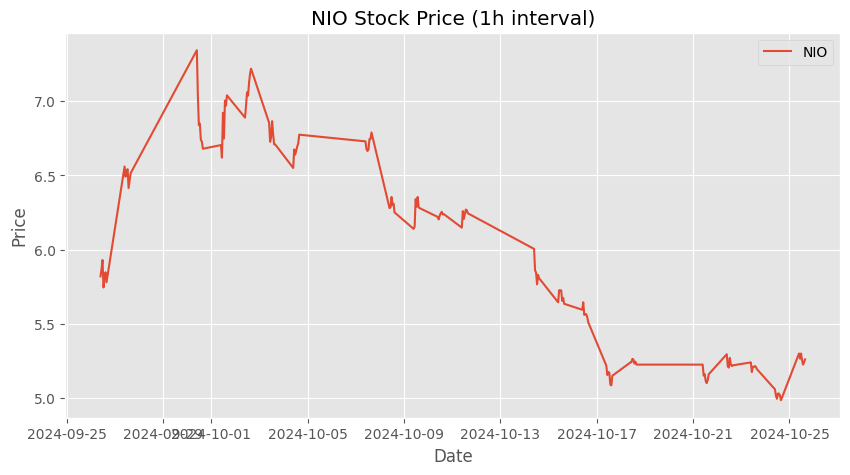

Stock Name: NIO
Average Polarity of Tweets: 0.1314594157367555
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1576 | Negative Tweets: 359 | Neutral Tweets: 1086
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NIO (1wk interval):
            Open  High   Low  Close  Adj Close     Volume
Date                                                     
2024-09-23  5.70  6.66  5.57   6.52       6.52  393143100
2024-09-30  7.70  7.71  6.40   6.77       6.77  686465700
2024-10-07  6.81  6.93  5.98   6.24       6.24  321635500
2024-10-14  6.06  6.18  5.05   5.22       5.22  337072600
2024-10-21  5.09  5.35  4.96   5.26       5.26  292256844


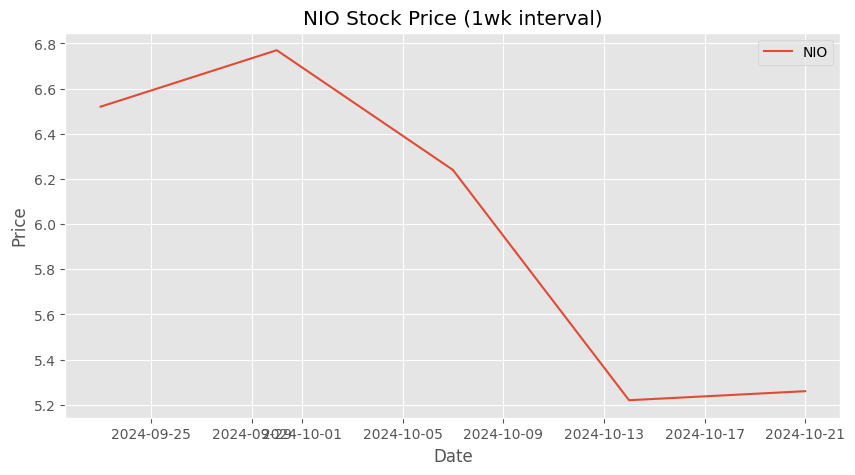

Stock Name: NIO
Average Polarity of Tweets: 0.1314594157367555
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1576 | Negative Tweets: 359 | Neutral Tweets: 1086
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NIO (1mo interval):
            Open  High   Low  Close  Adj Close      Volume
Date                                                      
2024-10-01   6.9  7.38  4.96   5.26       5.26  1424289844


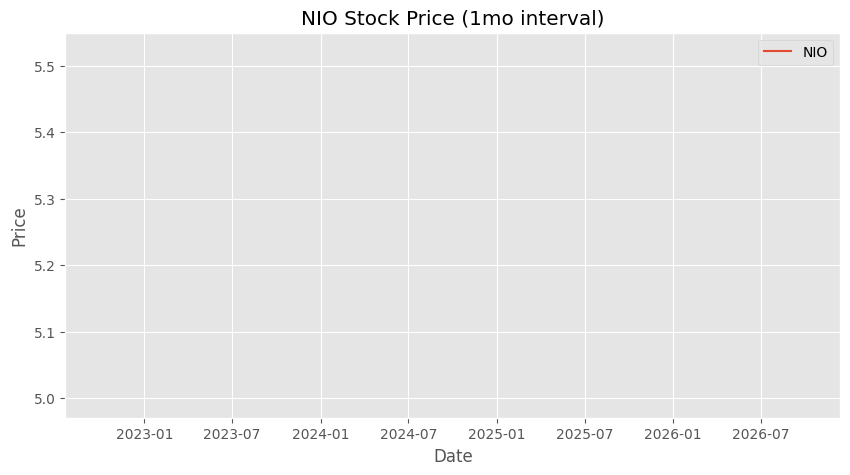

Stock Name: NIO
Average Polarity of Tweets: 0.1314594157367555
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 1576 | Negative Tweets: 359 | Neutral Tweets: 1086
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NOC (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  533.729980  536.890015  525.830017  529.650024  529.650024   
2024-10-22  529.799988  529.799988  517.820007  520.200012  520.200012   
2024-10-23  522.109985  522.900024  515.440002  516.400024  516.400024   
2024-10-24  515.909973  531.000000  515.739990  523.679993  523.679993   
2024-10-25  525.830017  527.750000  518.570007  519.349976  519.349976   

             Volume  
Date                 
2024-10-21   579700  
2024-10-22   677400  
2024-10-23   919500  
2024-10-24  1310300  
2024-10-25   515000  


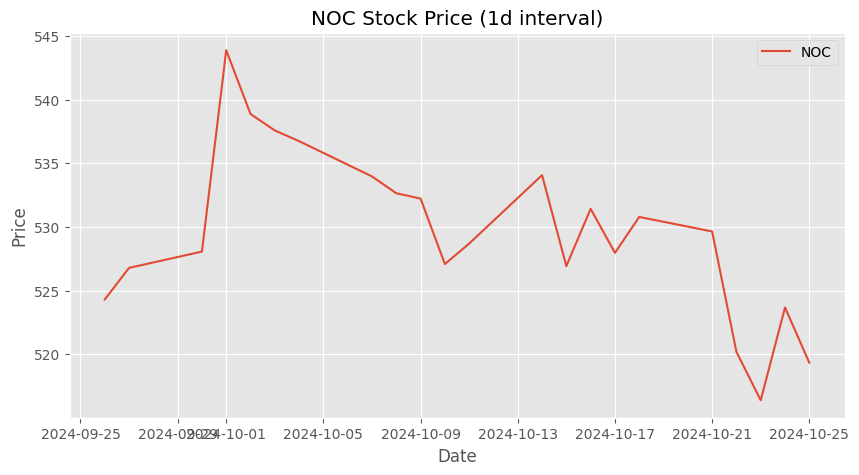

Stock Name: NOC
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NOC (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  519.380005  520.270020  519.380005  519.789978   
2024-10-25 15:40:00-04:00  519.520020  519.625000  519.309998  519.405029   
2024-10-25 15:45:00-04:00  519.405029  519.679993  519.250000  519.369995   
2024-10-25 15:50:00-04:00  519.140015  519.450012  518.780029  519.450012   
2024-10-25 15:55:00-04:00  519.424988  519.739990  518.570007  519.359985   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  519.789978    9506  
2024-10-25 15:40:00-04:00  519.405029    5435  
2024-10-25 15:45:00-04:00  519.369995    7246  
2024-10-25 15:50:00-04:00  519.450012   29270  
2024-10-25 15:55:00-04:00  519.359985   73862  


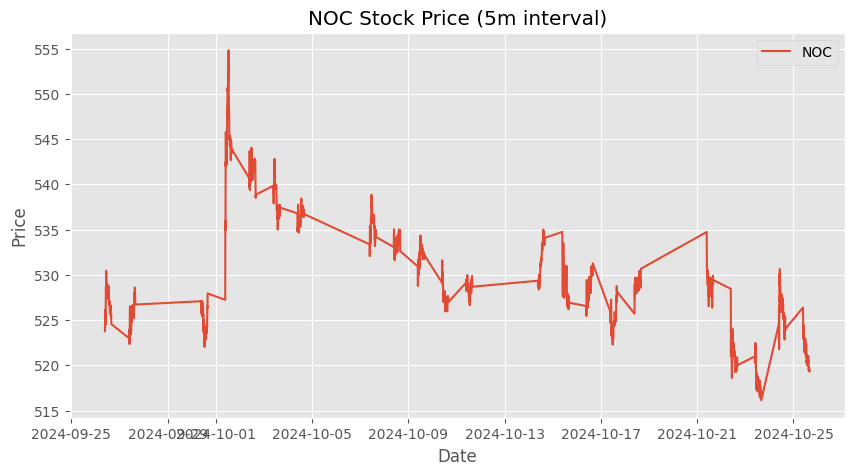

[*********************100%%**********************]  1 of 1 completed

Stock Name: NOC
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


Data for NOC (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  521.549988  522.949890  521.090027  521.369995   
2024-10-25 12:30:00-04:00  521.309998  522.369995  520.000000  520.289978   
2024-10-25 13:30:00-04:00  520.250000  521.280029  519.919983  520.719971   
2024-10-25 14:30:00-04:00  520.525024  521.039978  519.180115  519.700012   
2024-10-25 15:30:00-04:00  519.659973  520.270020  518.570007  519.349976   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  521.369995   39669  
2024-10-25 12:30:00-04:00  520.289978   35525  
2024-10-25 13:30:00-04:00  520.719971   30380  
2024-10-25 14:30:00-04:00  519.700012   68288  
2024-10-25 15:30:00-04:00  519.349976  131846  


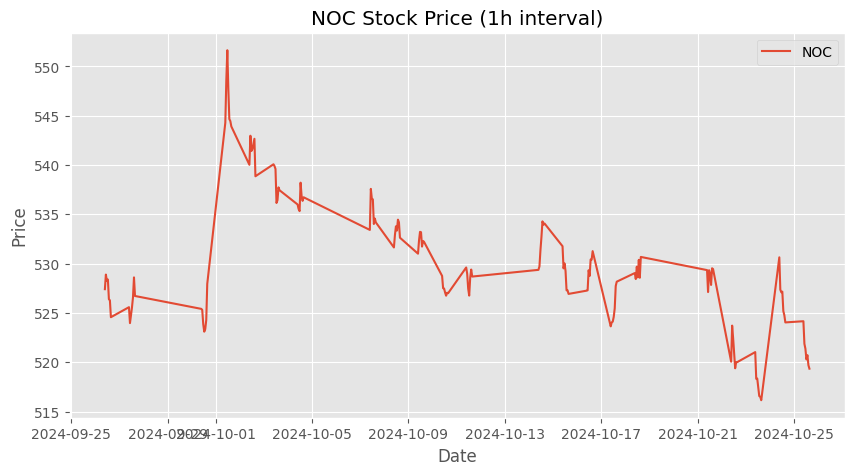

Stock Name: NOC
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NOC (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  532.179993  533.000000  521.969971  526.789978  526.789978   
2024-09-30  526.719971  555.570007  521.900024  536.739990  536.739990   
2024-10-07  536.260010  539.299988  525.880005  528.700012  528.700012   
2024-10-14  530.650024  536.119995  522.119995  530.789978  530.789978   
2024-10-21  533.729980  536.890015  515.440002  519.349976  519.349976   

             Volume  
Date                 
2024-09-23  1392200  
2024-09-30  3686500  
2024-10-07  1985100  
2024-10-14  3741000  
2024-10-21  4398968  


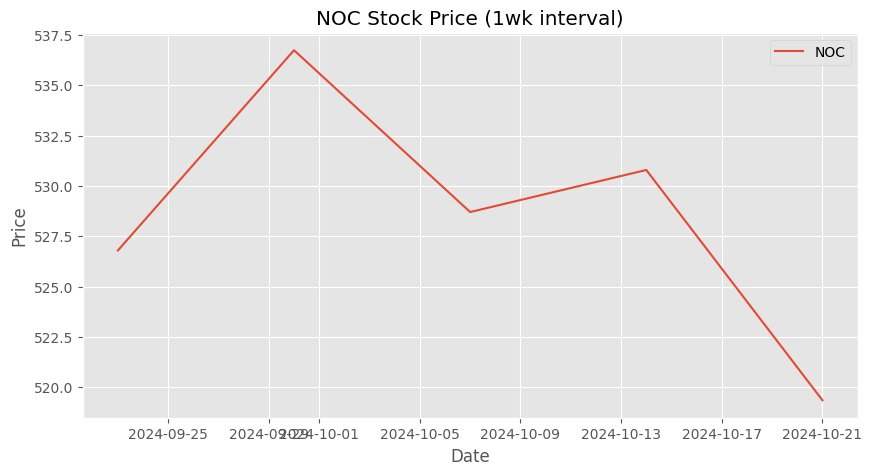

Stock Name: NOC
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for NOC (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  528.179993  555.570007  515.440002  519.349976  519.349976   

              Volume  
Date                  
2024-10-01  12854368  


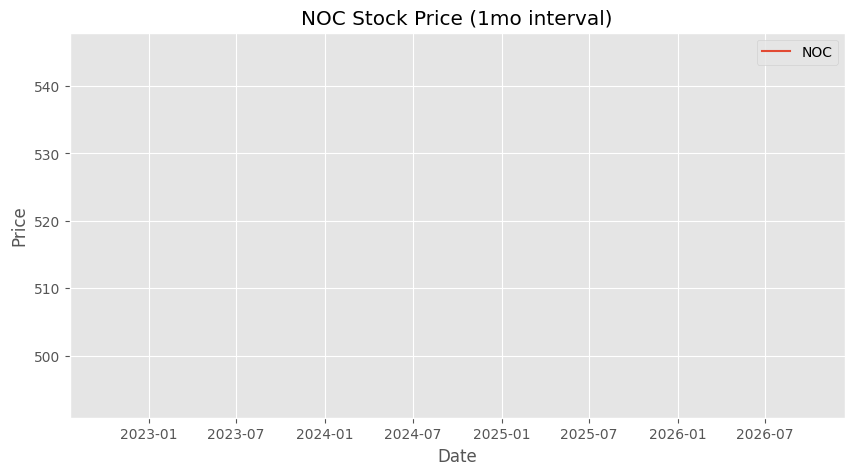

Stock Name: NOC
Average Polarity of Tweets: 0.13047368849788205
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18 | Negative Tweets: 4 | Neutral Tweets: 9
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PG (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  170.979996  171.479996  168.449997  169.539993  169.539993   
2024-10-22  168.570007  170.729996  168.570007  169.699997  169.699997   
2024-10-23  169.550003  170.169998  168.729996  169.580002  169.580002   
2024-10-24  169.419998  169.960007  168.929993  169.619995  169.619995   
2024-10-25  168.919998  169.399994  168.039993  168.220001  168.220001   

             Volume  
Date                 
2024-10-21  5522500  
2024-10-22  7511400  
2024-10-23  4837800  
2024-10-24  5861200  
2024-10-25  4877200  


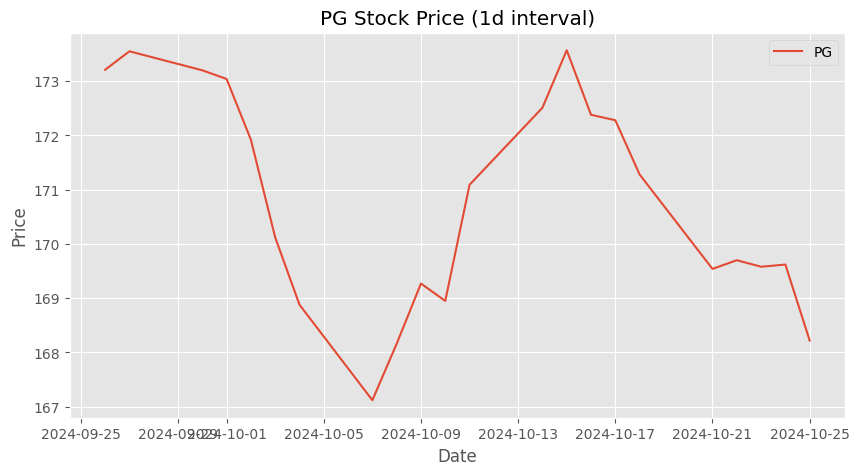

Stock Name: PG
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PG (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  168.615005  168.669998  168.589996  168.630005   
2024-10-25 15:40:00-04:00  168.610001  168.610001  168.450607  168.535004   
2024-10-25 15:45:00-04:00  168.531006  168.589996  168.404999  168.404999   
2024-10-25 15:50:00-04:00  168.399994  168.440002  168.100006  168.125000   
2024-10-25 15:55:00-04:00  168.125000  168.279999  168.041000  168.240005   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  168.630005   47646  
2024-10-25 15:40:00-04:00  168.535004   54870  
2024-10-25 15:45:00-04:00  168.404999   48992  
2024-10-25 15:50:00-04:00  168.125000   88801  
2024-10-25 15:55:00-04:00  168.240005  266891  


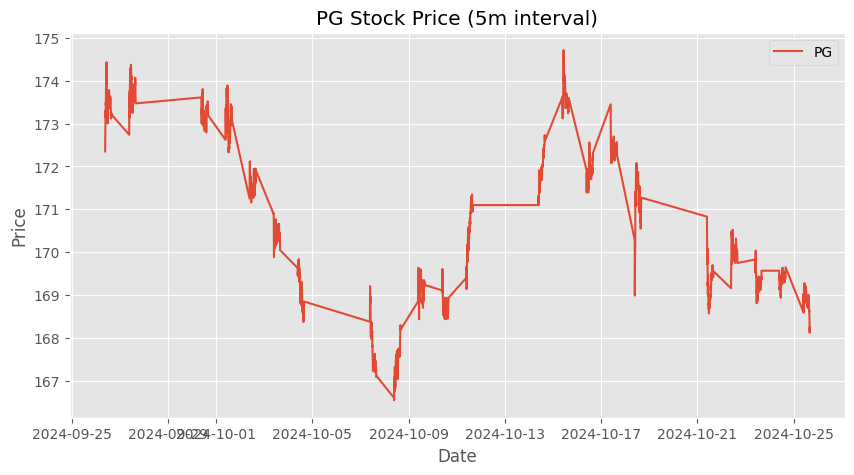

Stock Name: PG
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PG (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  168.929993  169.235001  168.720001  169.089996   
2024-10-25 12:30:00-04:00  169.089996  169.102005  168.789993  168.850006   
2024-10-25 13:30:00-04:00  168.839996  168.970001  168.649994  168.889999   
2024-10-25 14:30:00-04:00  168.889999  169.080002  168.619995  168.720001   
2024-10-25 15:30:00-04:00  168.720001  168.750000  168.041000  168.220001   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  169.089996  468287  
2024-10-25 12:30:00-04:00  168.850006  333193  
2024-10-25 13:30:00-04:00  168.889999  349300  
2024-10-25 14:30:00-04:00  168.720001  404149  
2024-10-25 15:30:00-04:00  168.220001  543183  


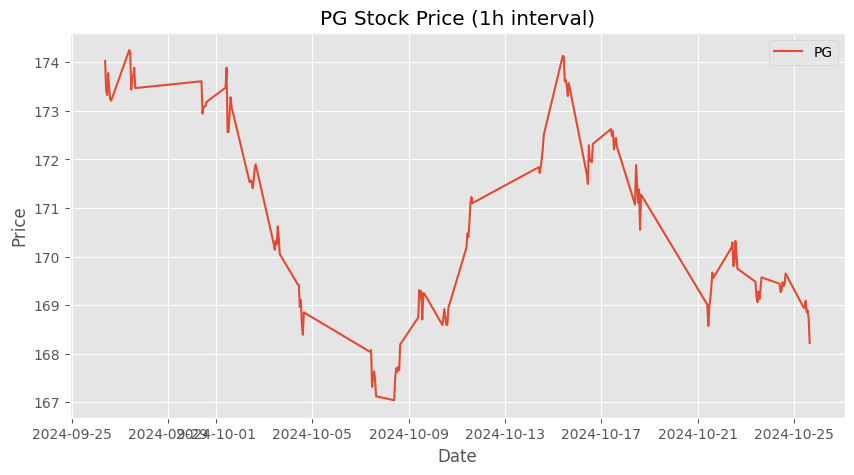

Stock Name: PG
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PG (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  174.070007  174.679993  171.360001  173.550003  172.535583   
2024-09-30  173.729996  174.000000  168.259995  168.880005  167.892883   
2024-10-07  169.160004  171.410004  166.270004  171.089996  170.089951   
2024-10-14  171.020004  174.910004  168.460007  171.279999  170.278839   
2024-10-21  170.979996  171.479996  168.039993  168.220001  168.220001   

              Volume  
Date                  
2024-09-23  18473200  
2024-09-30  30437000  
2024-10-07  36525900  
2024-10-14  34616300  
2024-10-21  33487241  


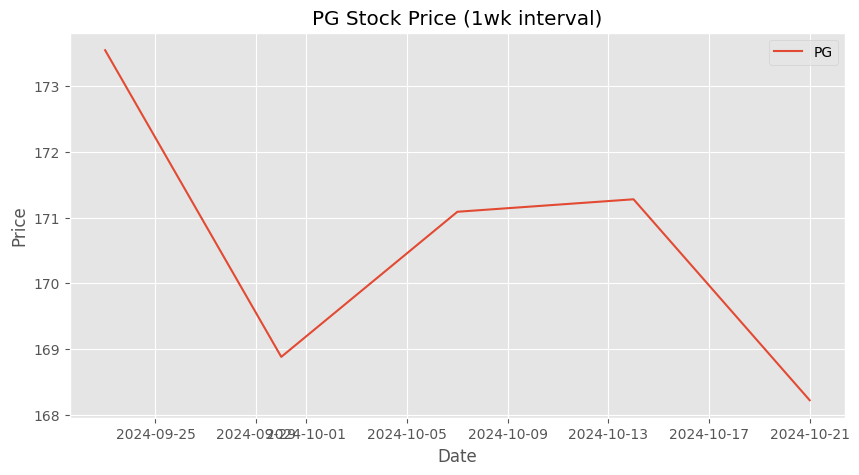

Stock Name: PG
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PG (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  173.240005  174.910004  166.270004  168.220001  168.220001   

               Volume  
Date                   
2024-10-01  128769841  


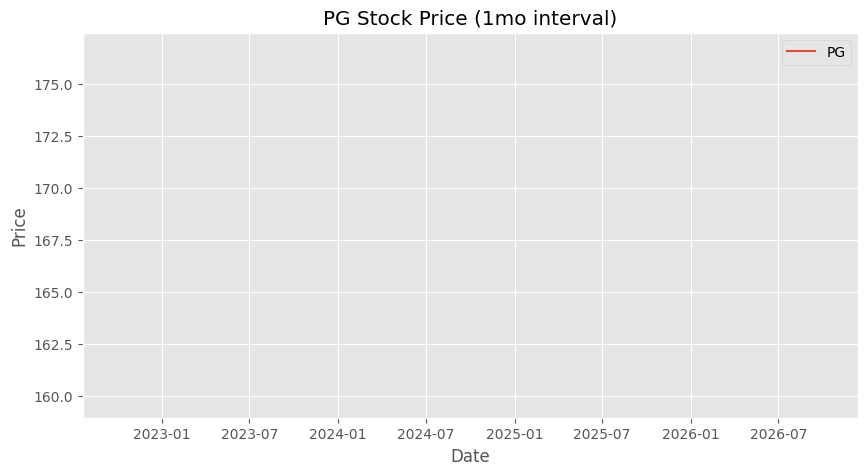

[*********************100%%**********************]  1 of 1 completed

Stock Name: PG
Average Polarity of Tweets: 0.09609604465617194
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 1963 | Negative Tweets: 771 | Neutral Tweets: 1355
##############################################################################


Data for PYPL (1d interval):
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2024-10-21  80.315002  81.360001  80.040001  80.559998  80.559998  7450300
2024-10-22  80.050003  81.419998  80.040001  80.910004  80.910004  7571300
2024-10-23  81.239998  82.239998  80.089996  80.830002  80.830002  7632100
2024-10-24  81.235001  82.480003  80.919998  81.389999  81.389999  7398800
2024-10-25  82.010002  82.800003  81.400002  81.699997  81.699997  7191100


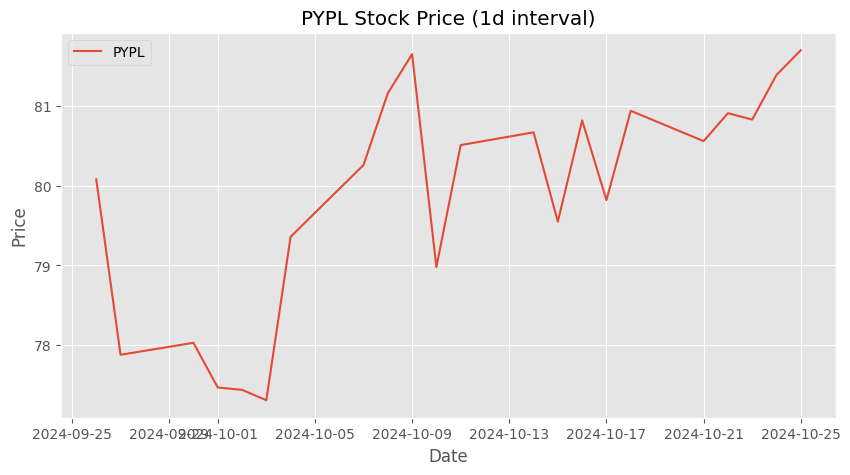

Stock Name: PYPL
Average Polarity of Tweets: 0.10425868321933211
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 402 | Negative Tweets: 145 | Neutral Tweets: 296
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PYPL (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  81.550003  81.575996  81.500000  81.529999   
2024-10-25 15:40:00-04:00  81.535004  81.550003  81.482498  81.540001   
2024-10-25 15:45:00-04:00  81.535004  81.589996  81.510002  81.519997   
2024-10-25 15:50:00-04:00  81.529999  81.639999  81.510002  81.620003   
2024-10-25 15:55:00-04:00  81.605003  81.750000  81.605003  81.709999   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 15:35:00-04:00  81.529999   60647  
2024-10-25 15:40:00-04:00  81.540001   76562  
2024-10-25 15:45:00-04:00  81.519997   84837  
2024-10-25 15:50:00-04:00  81.620003  168243  
2024-10-25 15:55:00-04:00  81.709999  384764  


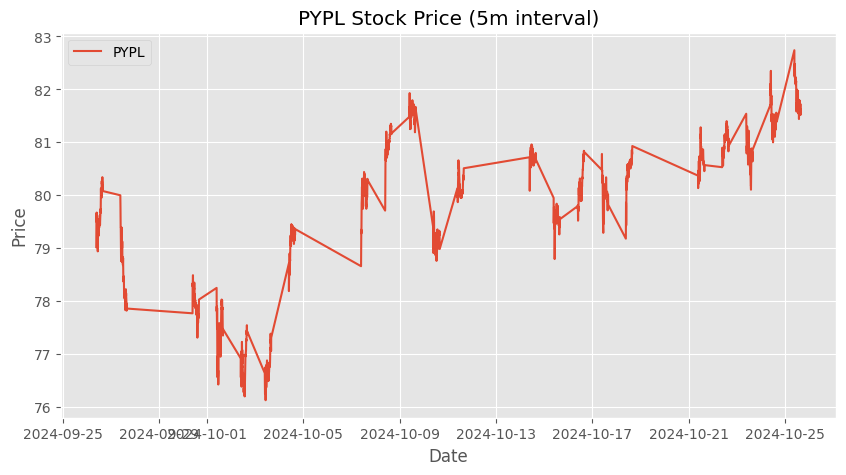

[*********************100%%**********************]  1 of 1 completed

Stock Name: PYPL
Average Polarity of Tweets: 0.10425868321933211
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 402 | Negative Tweets: 145 | Neutral Tweets: 296
##############################################################################


Data for PYPL (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  81.769997  81.998001  81.544998  81.889999   
2024-10-25 12:30:00-04:00  81.889999  82.000000  81.550003  81.639999   
2024-10-25 13:30:00-04:00  81.638000  81.820000  81.400002  81.800003   
2024-10-25 14:30:00-04:00  81.790001  81.815002  81.538002  81.635002   
2024-10-25 15:30:00-04:00  81.635002  81.750000  81.482498  81.699997   

                           Adj Close  Volume  
Datetime                                      
2024-10-25 11:30:00-04:00  81.889999  654556  
2024-10-25 12:30:00-04:00  81.639999  476948  
2024-10-25 13:30:00-04:00  81.800003  616720  
2024-10-25 14:30:00-04:00  81.635002  887412  
2024-10-25 15:30:00-04:00  81.699997  841936  


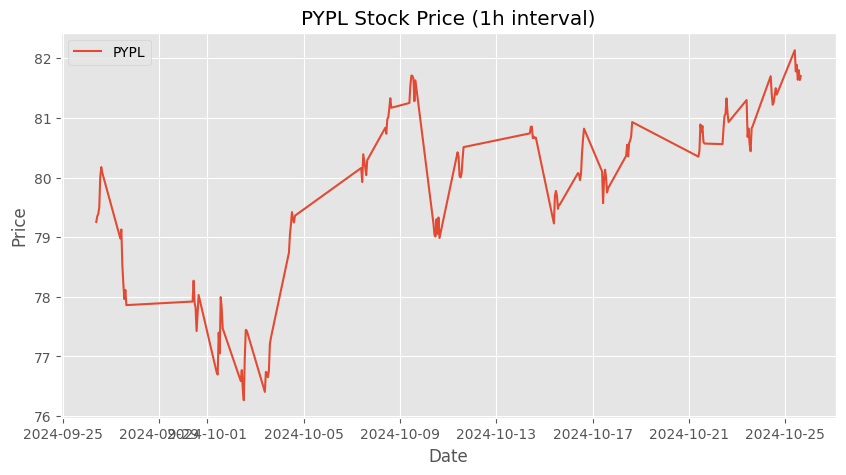

Stock Name: PYPL
Average Polarity of Tweets: 0.10425868321933211
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 402 | Negative Tweets: 145 | Neutral Tweets: 296
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for PYPL (1wk interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-09-23  78.230003  80.629997  77.339996  77.879997  77.879997  38714400
2024-09-30  77.870003  79.529999  76.040001  79.360001  79.360001  44720600
2024-10-07  79.290001  82.000000  78.529999  80.510002  80.510002  43822000
2024-10-14  80.339996  81.059998  78.650002  80.940002  80.940002  36090100
2024-10-21  80.315002  82.800003  80.040001  81.699997  81.699997  44444613


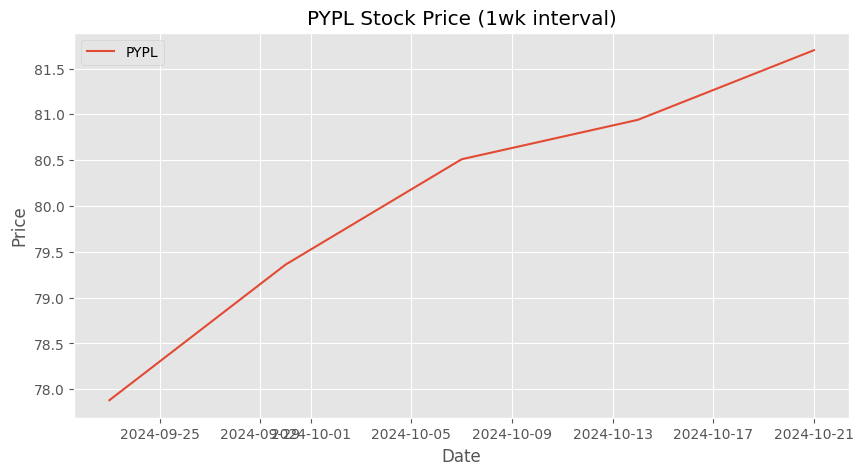

[*********************100%%**********************]  1 of 1 completed

Stock Name: PYPL
Average Polarity of Tweets: 0.10425868321933211
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 402 | Negative Tweets: 145 | Neutral Tweets: 296
##############################################################################
Data for PYPL (1mo interval):
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2024-10-01  78.209999  82.800003  76.040001  81.699997  81.699997  162230413


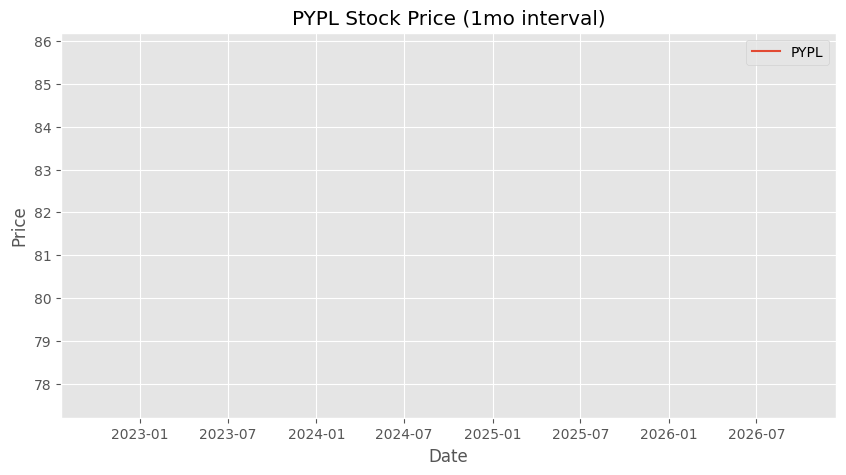

[*********************100%%**********************]  1 of 1 completed

Stock Name: PYPL
Average Polarity of Tweets: 0.10425868321933211
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 402 | Negative Tweets: 145 | Neutral Tweets: 296
##############################################################################
Data for TSLA (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  218.899994  220.479996  215.729996  218.850006  218.850006   
2024-10-22  217.309998  218.220001  215.259995  217.970001  217.970001   
2024-10-23  217.130005  218.720001  212.110001  213.649994  213.649994   
2024-10-24  244.679993  262.119995  242.649994  260.480011  260.480011   
2024-10-25  256.010010  269.489990  255.320007  269.190002  269.190002   

               Volume  
Date                   
2024-10-21   47329000  
2024-10-22   43268700  
2024-10-23   80938900  
2024-10-24  204491900  
2024-10-25  161061400  


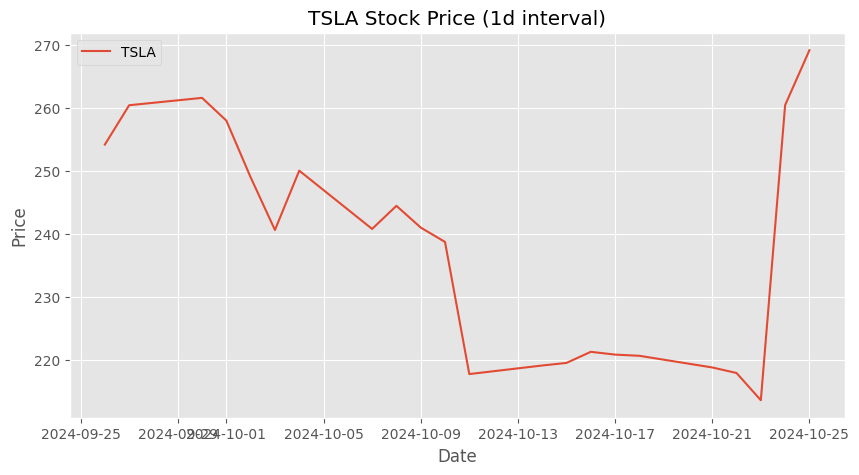

Stock Name: TSLA
Average Polarity of Tweets: 0.10852322032219684
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18771 | Negative Tweets: 6845 | Neutral Tweets: 11806
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSLA (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  267.744995  267.920013  267.420013  267.809998   
2024-10-25 15:40:00-04:00  267.809998  268.600006  267.609985  268.450012   
2024-10-25 15:45:00-04:00  268.446686  268.529999  268.049988  268.422394   
2024-10-25 15:50:00-04:00  268.440002  269.440002  268.390015  269.380005   
2024-10-25 15:55:00-04:00  269.380005  269.489990  268.850006  269.110107   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 15:35:00-04:00  267.809998  1004152  
2024-10-25 15:40:00-04:00  268.450012  1933502  
2024-10-25 15:45:00-04:00  268.422394  1268646  
2024-10-25 15:50:00-04:00  269.380005  2842704  
2024-10-25 15:55:00-04:00  269.110107  3274792  


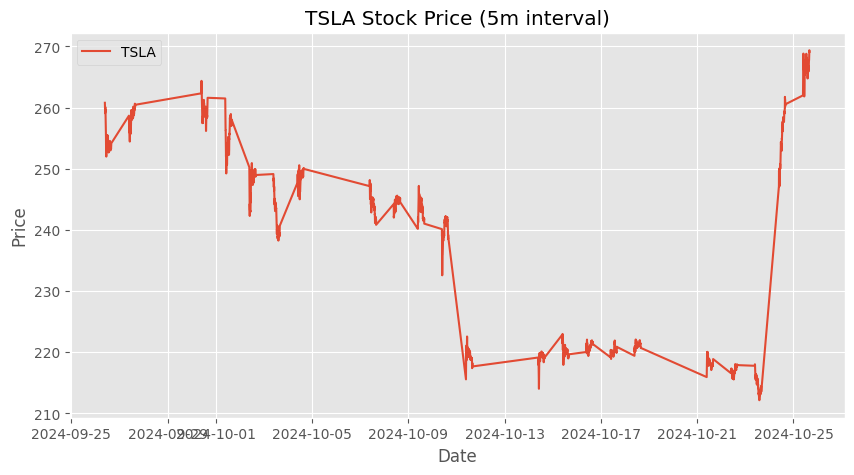

Stock Name: TSLA
Average Polarity of Tweets: 0.10852322032219684
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18771 | Negative Tweets: 6845 | Neutral Tweets: 11806
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSLA (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  266.790009  267.989990  265.209991  267.480011   
2024-10-25 12:30:00-04:00  267.515015  269.140015  266.250000  267.170013   
2024-10-25 13:30:00-04:00  267.170013  268.059998  264.559998  266.765015   
2024-10-25 14:30:00-04:00  266.761993  267.709991  265.299988  267.559998   
2024-10-25 15:30:00-04:00  267.510010  269.489990  267.279999  269.190002   

                            Adj Close    Volume  
Datetime                                         
2024-10-25 11:30:00-04:00  267.480011  16074164  
2024-10-25 12:30:00-04:00  267.170013  13280607  
2024-10-25 13:30:00-04:00  266.765015  13619679  
2024-10-25 14:30:00-04:00  267.559998  12657059  
2024-10-25 15:30:00-04:00  269.190002  11250439  


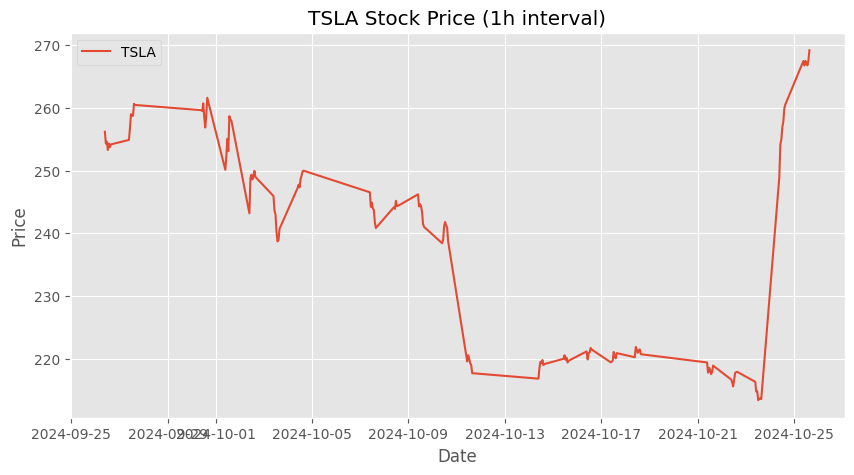

[*********************100%%**********************]  1 of 1 completed

Stock Name: TSLA
Average Polarity of Tweets: 0.10852322032219684
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18771 | Negative Tweets: 6845 | Neutral Tweets: 11806
##############################################################################
Data for TSLA (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  252.539993  261.750000  251.529999  260.459991  260.459991   
2024-09-30  259.040009  264.859985  237.809998  250.080002  250.080002   
2024-10-07  249.000000  249.830002  214.380005  217.800003  217.800003   
2024-10-14  220.130005  224.259995  213.740005  220.699997  220.699997   
2024-10-21  218.899994  269.489990  212.110001  269.190002  269.190002   

               Volume  
Date                   
2024-09-23  203164600  
2024-09-30  429389600  
2024-10-07  416422000  
2024-10-14  299317200  
2024-10-21  698701831  


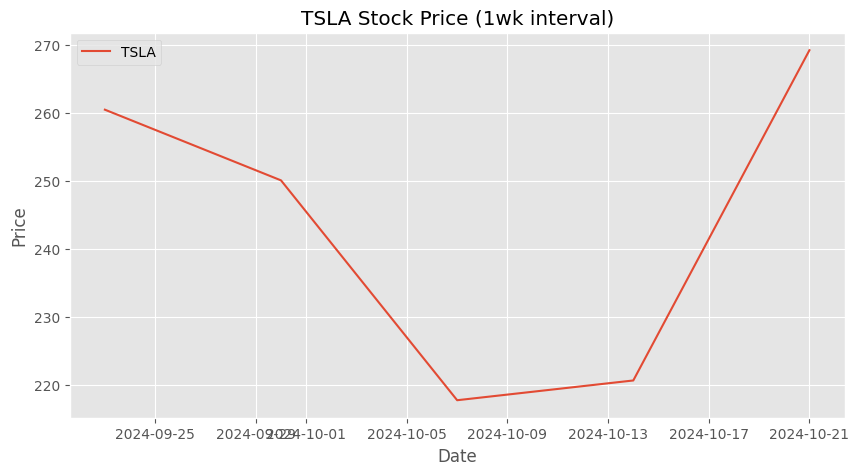

Stock Name: TSLA
Average Polarity of Tweets: 0.10852322032219684
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18771 | Negative Tweets: 6845 | Neutral Tweets: 11806
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSLA (1mo interval):
                  Open       High         Low       Close   Adj Close  \
Date                                                                    
2024-10-01  262.670013  269.48999  212.110001  269.190002  269.190002   

                Volume  
Date                    
2024-10-01  1763124931  


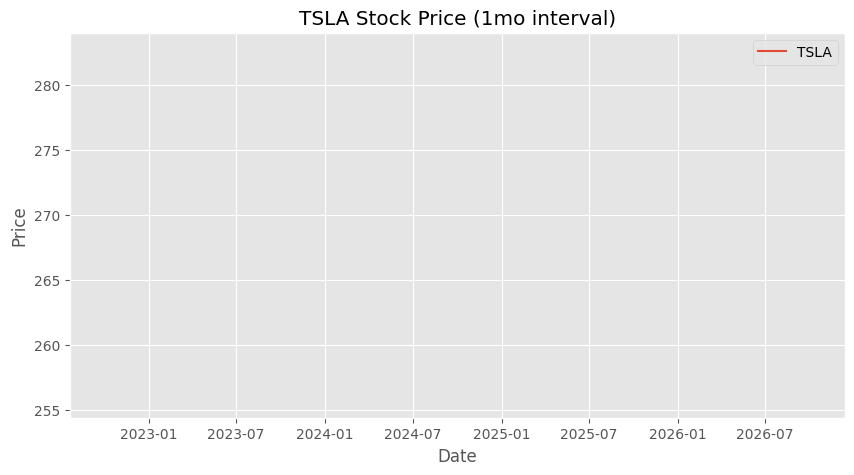

[*********************100%%**********************]  1 of 1 completed

Stock Name: TSLA
Average Polarity of Tweets: 0.10852322032219684
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 18771 | Negative Tweets: 6845 | Neutral Tweets: 11806
##############################################################################


Data for TSM (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  200.809998  203.440002  199.660004  201.949997  201.949997   
2024-10-22  199.070007  200.169998  197.110001  198.479996  198.479996   
2024-10-23  196.679993  203.130005  196.229996  200.860001  200.860001   
2024-10-24  198.960007  200.500000  197.410004  197.929993  197.929993   
2024-10-25  200.250000  205.199997  200.000000  203.440002  203.440002   

              Volume  
Date                  
2024-10-21  14820000  
2024-10-22  11165100  
2024-10-23  16535700  
2024-10-24   9935800  
2024-10-25  13413900  


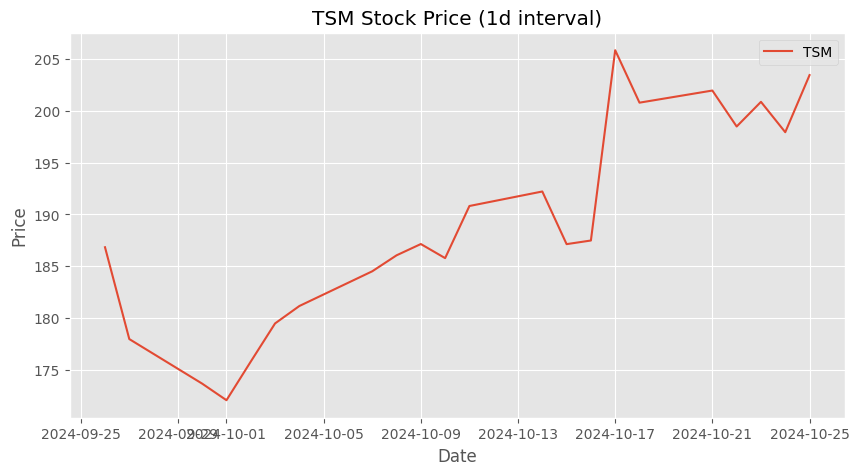

Stock Name: TSM
Average Polarity of Tweets: 0.12591388634269748
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 5038 | Negative Tweets: 1723 | Neutral Tweets: 4273
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSM (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  203.875000  204.070007  203.830002  204.039993   
2024-10-25 15:40:00-04:00  204.024994  204.139999  203.899994  203.990005   
2024-10-25 15:45:00-04:00  204.000000  204.070007  203.910004  203.990005   
2024-10-25 15:50:00-04:00  204.000000  204.100006  203.559998  203.789993   
2024-10-25 15:55:00-04:00  203.770004  203.770004  203.179993  203.389999   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  204.039993  108404  
2024-10-25 15:40:00-04:00  203.990005  109099  
2024-10-25 15:45:00-04:00  203.990005  140446  
2024-10-25 15:50:00-04:00  203.789993  275774  
2024-10-25 15:55:00-04:00  203.389999  646700  


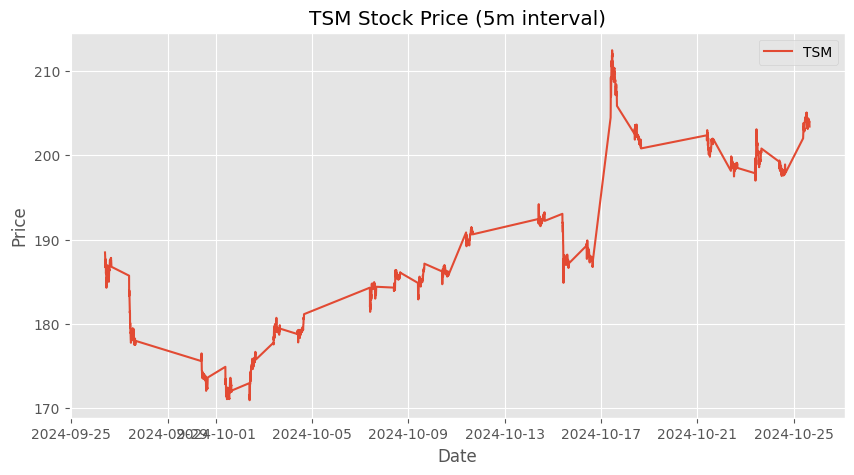

Stock Name: TSM
Average Polarity of Tweets: 0.12591388634269748
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 5038 | Negative Tweets: 1723 | Neutral Tweets: 4273
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSM (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  204.000000  204.878006  203.900101  204.619995   
2024-10-25 12:30:00-04:00  204.600006  205.199997  204.050003  204.050003   
2024-10-25 13:30:00-04:00  204.014999  204.489899  202.880005  204.190002   
2024-10-25 14:30:00-04:00  204.190002  204.449997  203.610001  203.809998   
2024-10-25 15:30:00-04:00  203.815002  204.139999  203.179993  203.440002   

                            Adj Close   Volume  
Datetime                                        
2024-10-25 11:30:00-04:00  204.619995  1800628  
2024-10-25 12:30:00-04:00  204.050003  1556876  
2024-10-25 13:30:00-04:00  204.190002  1232786  
2024-10-25 14:30:00-04:00  203.809998  1003542  
2024-10-25 15:30:00-04:00  203.440002  1377561  


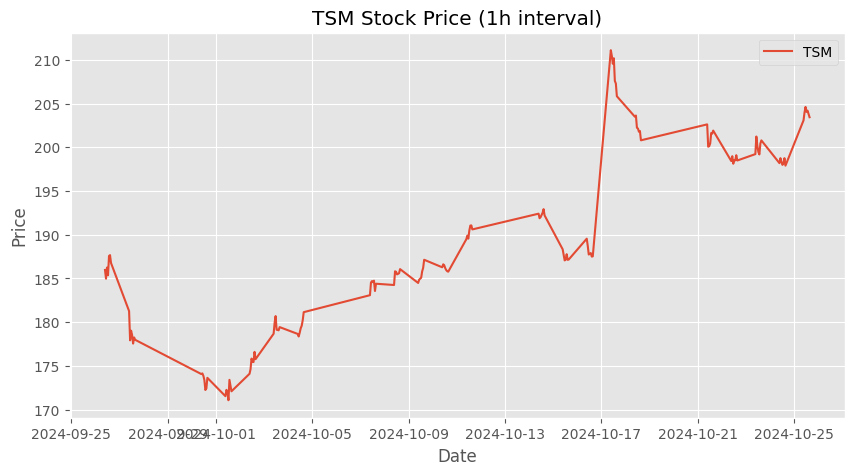

Stock Name: TSM
Average Polarity of Tweets: 0.12591388634269748
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 5038 | Negative Tweets: 1723 | Neutral Tweets: 4273
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSM (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  181.520004  189.330002  177.399994  177.970001  177.970001   
2024-09-30  174.270004  181.229996  170.779999  181.160004  181.160004   
2024-10-07  181.600006  191.490005  180.929993  190.809998  190.809998   
2024-10-14  190.610001  212.600006  184.250000  200.779999  200.779999   
2024-10-21  200.809998  205.199997  196.229996  203.440002  203.440002   

               Volume  
Date                   
2024-09-23   41292700  
2024-09-30   59103600  
2024-10-07   52981100  
2024-10-14  135521800  
2024-10-21   79268813  


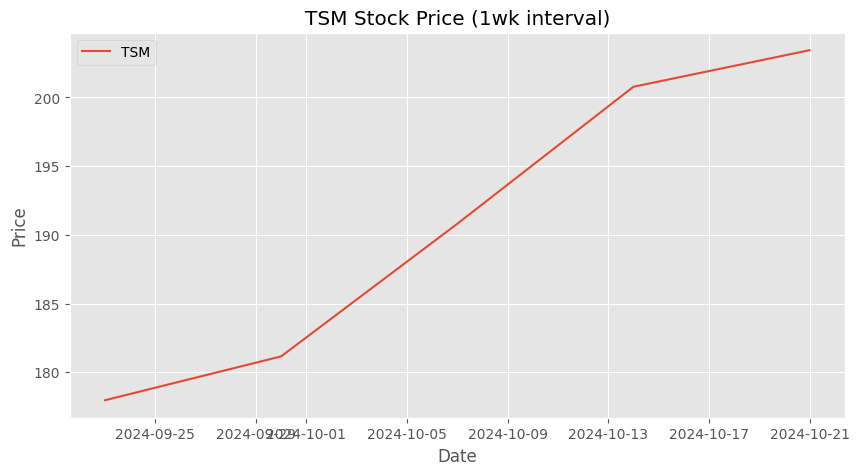

Stock Name: TSM
Average Polarity of Tweets: 0.12591388634269748
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 5038 | Negative Tweets: 1723 | Neutral Tweets: 4273
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for TSM (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  175.309998  212.600006  170.779999  203.440002  203.440002   

               Volume  
Date                   
2024-10-01  313335113  


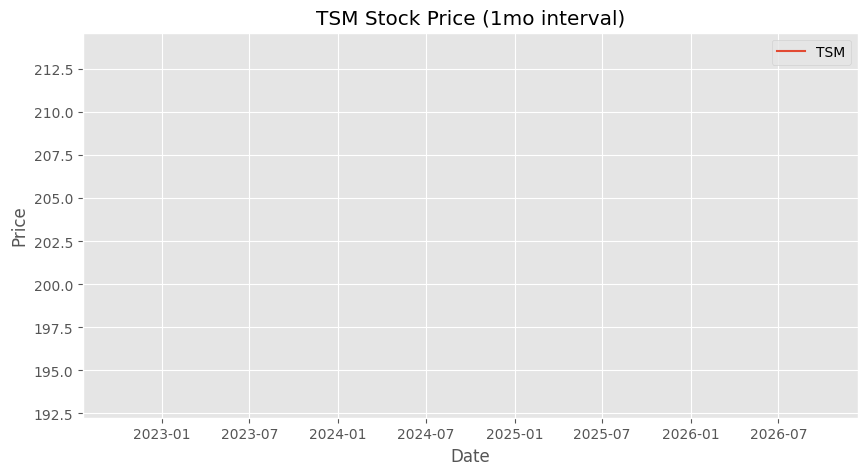

Stock Name: TSM
Average Polarity of Tweets: 0.12591388634269748
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 5038 | Negative Tweets: 1723 | Neutral Tweets: 4273
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for VZ (1d interval):
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-10-21  44.049999  44.200001  43.599998  43.700001  43.700001  18760000
2024-10-22  41.900002  42.639999  40.750000  41.500000  41.500000  42576300
2024-10-23  41.860001  42.900002  41.759998  42.860001  42.860001  27174700
2024-10-24  42.380001  42.450001  41.639999  41.860001  41.860001  23506400
2024-10-25  41.900002  42.180000  41.369999  41.380001  41.380001  19711800


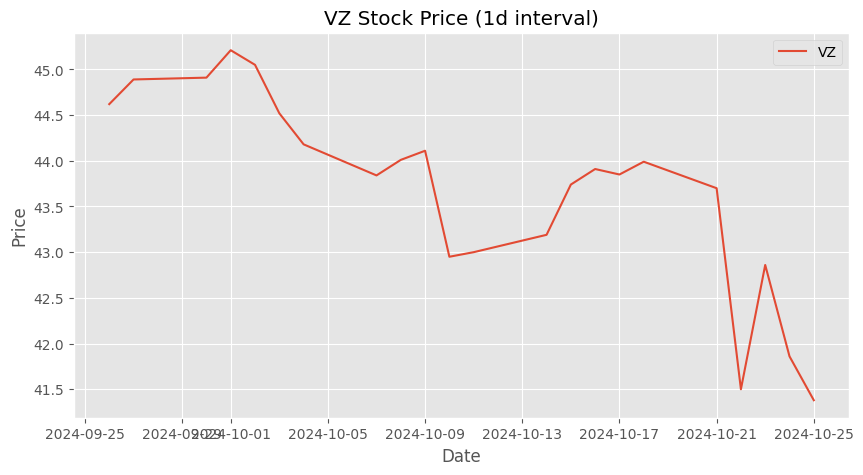

Stock Name: VZ
Average Polarity of Tweets: 0.19997729447983514
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 75 | Negative Tweets: 13 | Neutral Tweets: 35
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for VZ (5m interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 15:35:00-04:00  41.465000  41.480000  41.459999  41.459999   
2024-10-25 15:40:00-04:00  41.464001  41.465000  41.430000  41.449902   
2024-10-25 15:45:00-04:00  41.445000  41.450001  41.400101  41.415001   
2024-10-25 15:50:00-04:00  41.415001  41.455002  41.380001  41.404999   
2024-10-25 15:55:00-04:00  41.410000  41.470001  41.369999  41.380001   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  41.459999   220606  
2024-10-25 15:40:00-04:00  41.449902   247808  
2024-10-25 15:45:00-04:00  41.415001   373828  
2024-10-25 15:50:00-04:00  41.404999   789353  
2024-10-25 15:55:00-04:00  41.380001  2019872  


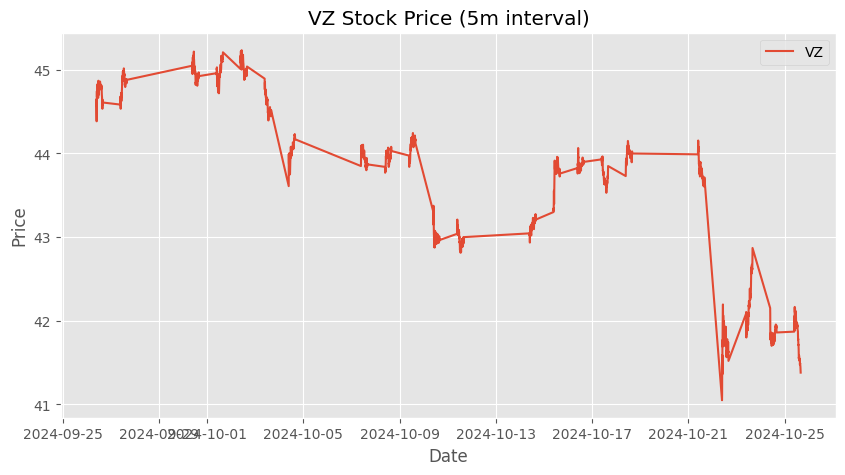

Stock Name: VZ
Average Polarity of Tweets: 0.19997729447983514
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 75 | Negative Tweets: 13 | Neutral Tweets: 35
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for VZ (1h interval):
                                Open       High        Low      Close  \
Datetime                                                                
2024-10-25 11:30:00-04:00  41.994999  42.035000  41.904999  41.965000   
2024-10-25 12:30:00-04:00  41.965000  41.980000  41.770000  41.784801   
2024-10-25 13:30:00-04:00  41.785000  41.785000  41.450001  41.549999   
2024-10-25 14:30:00-04:00  41.555000  41.560001  41.470001  41.490002   
2024-10-25 15:30:00-04:00  41.493999  41.500000  41.369999  41.380001   

                           Adj Close   Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  41.965000   872699  
2024-10-25 12:30:00-04:00  41.784801  1213092  
2024-10-25 13:30:00-04:00  41.549999  2497115  
2024-10-25 14:30:00-04:00  41.490002  1351838  
2024-10-25 15:30:00-04:00  41.380001  3783338  


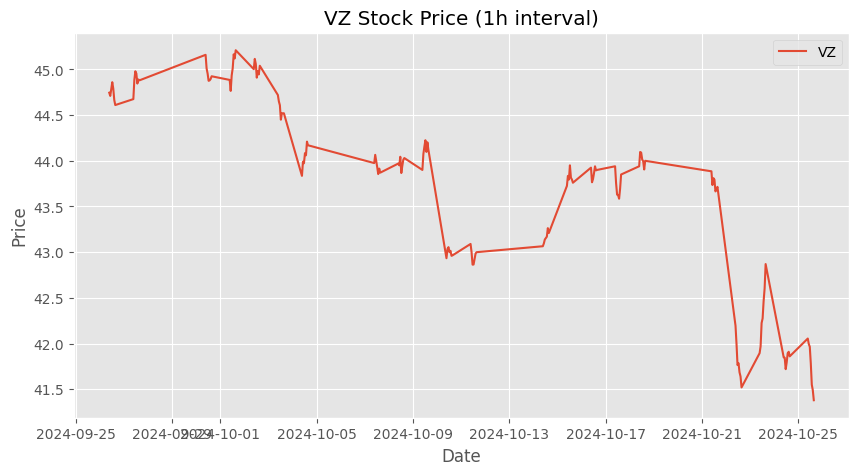

Stock Name: VZ
Average Polarity of Tweets: 0.19997729447983514
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 75 | Negative Tweets: 13 | Neutral Tweets: 35
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for VZ (1wk interval):
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2024-09-23  44.799999  45.049999  44.360001  44.889999  44.200008   53429000
2024-09-30  45.130001  45.360001  43.549999  44.180000  43.500923   69876500
2024-10-07  44.080002  44.250000  42.799999  43.000000  42.339062   59365800
2024-10-14  43.000000  44.169998  42.889999  43.990002  43.990002   58424900
2024-10-21  44.049999  44.200001  40.750000  41.380001  41.380001  151435280


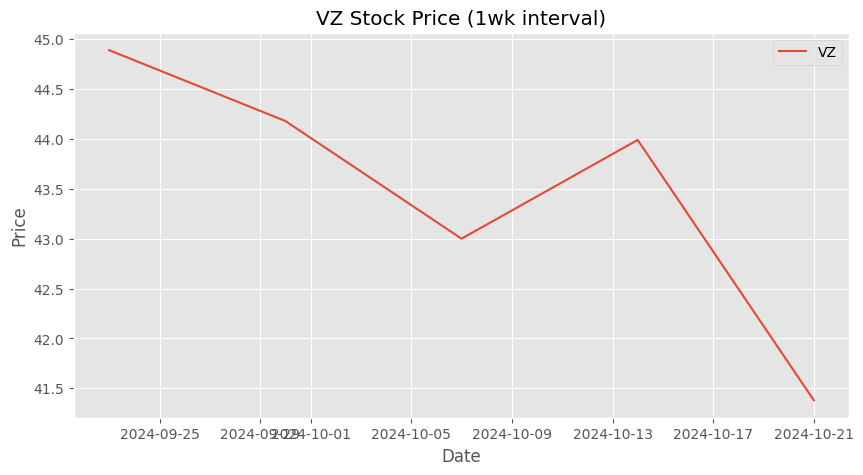

Stock Name: VZ
Average Polarity of Tweets: 0.19997729447983514
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 75 | Negative Tweets: 13 | Neutral Tweets: 35
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for VZ (1mo interval):
                 Open       High    Low      Close  Adj Close     Volume
Date                                                                    
2024-10-01  44.959999  45.279999  40.75  41.380001  41.380001  325592780


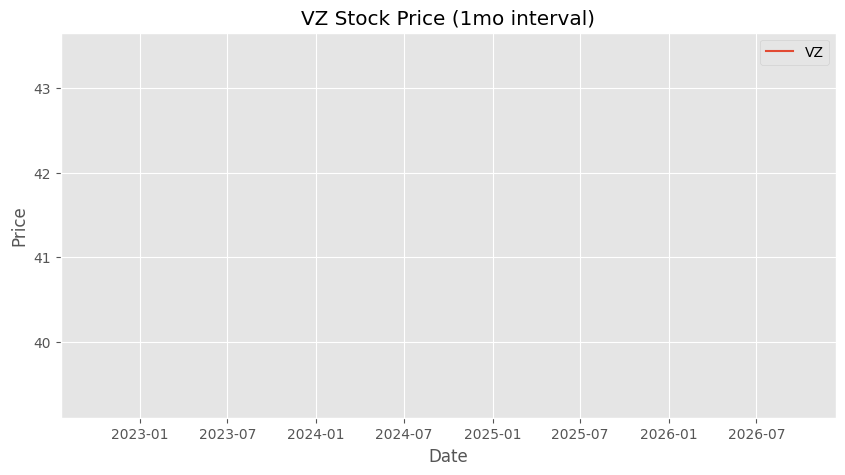

Stock Name: VZ
Average Polarity of Tweets: 0.19997729447983514
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 75 | Negative Tweets: 13 | Neutral Tweets: 35
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for XPEV (1d interval):
              Open    High    Low  Close  Adj Close    Volume
Date                                                         
2024-10-21  10.500  10.860  10.49  10.82      10.82   8168800
2024-10-22  10.870  11.420  10.87  11.04      11.04  11522000
2024-10-23  11.190  11.449  11.05  11.16      11.16   9493300
2024-10-24  11.085  11.100  10.42  10.47      10.47  13469800
2024-10-25  10.760  11.420  10.69  11.13      11.13  17516200


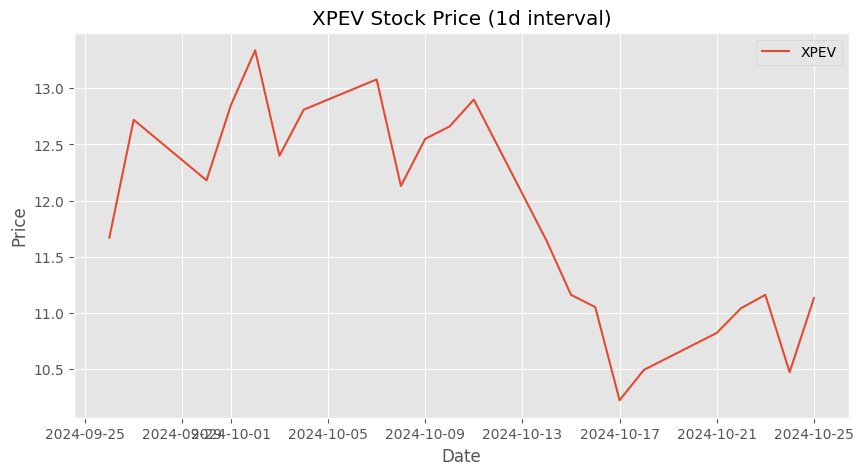

Stock Name: XPEV
Average Polarity of Tweets: 0.1323196359148182
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 28 | Neutral Tweets: 81
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for XPEV (5m interval):
                              Open     High      Low   Close  Adj Close  \
Datetime                                                                  
2024-10-25 15:35:00-04:00  11.0550  11.0700  11.0500  11.061     11.061   
2024-10-25 15:40:00-04:00  11.0650  11.0850  11.0600  11.075     11.075   
2024-10-25 15:45:00-04:00  11.0750  11.0950  11.0700  11.080     11.080   
2024-10-25 15:50:00-04:00  11.0899  11.1600  11.0749  11.135     11.135   
2024-10-25 15:55:00-04:00  11.1350  11.1399  11.1200  11.120     11.120   

                           Volume  
Datetime                           
2024-10-25 15:35:00-04:00   62564  
2024-10-25 15:40:00-04:00  167182  
2024-10-25 15:45:00-04:00  179595  
2024-10-25 15:50:00-04:00  568998  
2024-10-25 15:55:00-04:00  574312  


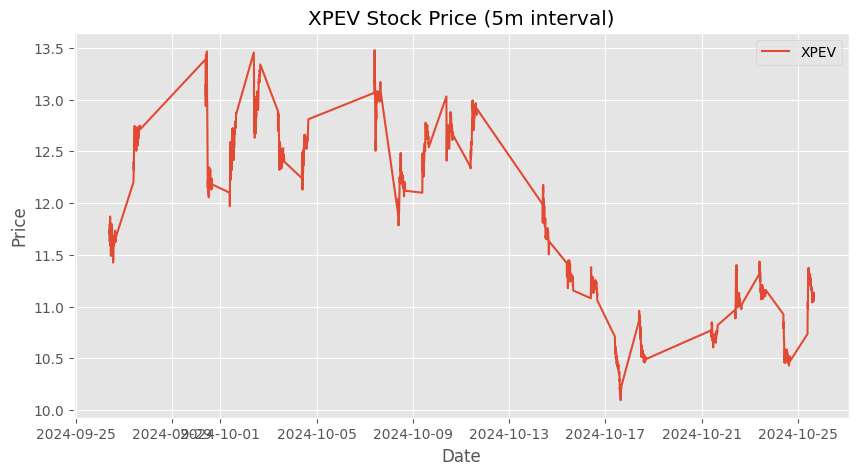

Stock Name: XPEV
Average Polarity of Tweets: 0.1323196359148182
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 28 | Neutral Tweets: 81
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for XPEV (1h interval):
                             Open   High     Low   Close  Adj Close   Volume
Datetime                                                                    
2024-10-25 11:30:00-04:00  11.235  11.34  11.224  11.265     11.265  1503817
2024-10-25 12:30:00-04:00  11.265  11.27  11.160  11.160     11.160  1050195
2024-10-25 13:30:00-04:00  11.165  11.20  11.010  11.070     11.070  1308573
2024-10-25 14:30:00-04:00  11.065  11.16  11.040  11.050     11.050   806504
2024-10-25 15:30:00-04:00  11.045  11.16  11.035  11.130     11.130  1646576


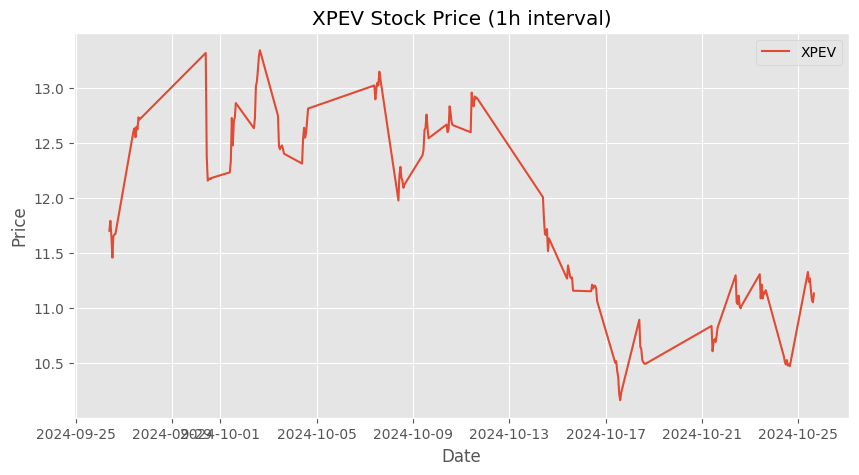

[*********************100%%**********************]  1 of 1 completed

Stock Name: XPEV
Average Polarity of Tweets: 0.1323196359148182
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 28 | Neutral Tweets: 81
##############################################################################
Data for XPEV (1wk interval):
             Open    High     Low  Close  Adj Close     Volume
Date                                                          
2024-09-23  10.15  12.755  10.030  12.72      12.72   65222100
2024-09-30  13.66  13.730  11.920  12.81      12.81  122496600
2024-10-07  13.34  13.680  11.720  12.90      12.90   83111500
2024-10-14  12.16  12.220  10.065  10.49      10.49   84199500
2024-10-21  10.50  11.449  10.420  11.13      11.13   77562716


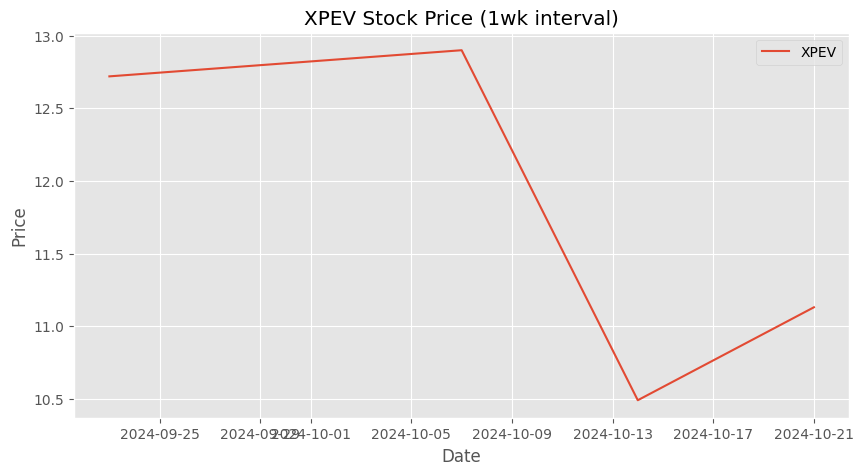

[*********************100%%**********************]  1 of 1 completed

Stock Name: XPEV
Average Polarity of Tweets: 0.1323196359148182
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 28 | Neutral Tweets: 81
##############################################################################
Data for XPEV (1mo interval):
             Open   High     Low  Close  Adj Close     Volume
Date                                                         
2024-10-01  12.58  13.73  10.065  11.13      11.13  334705316


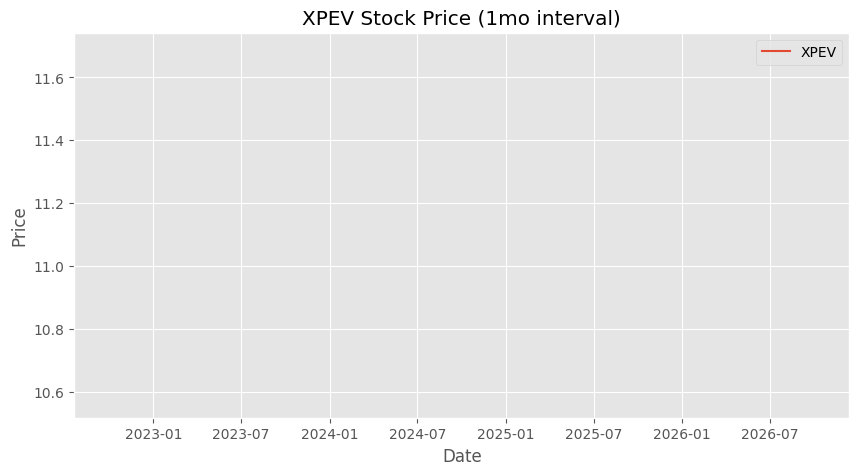

[*********************100%%**********************]  1 of 1 completed

Stock Name: XPEV
Average Polarity of Tweets: 0.1323196359148182
Recommendation Idea: Buy
Decision: Consider buying this stock.
Positive Tweets: 116 | Negative Tweets: 28 | Neutral Tweets: 81
##############################################################################


Data for ZS (1d interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-21  188.559998  192.250000  186.839996  187.960007  187.960007   
2024-10-22  186.330002  188.309998  185.429993  186.160004  186.160004   
2024-10-23  185.500000  186.619995  180.779999  181.009995  181.009995   
2024-10-24  182.509995  185.460007  182.000000  183.929993  183.929993   
2024-10-25  185.380005  188.630005  183.860001  184.960007  184.960007   

             Volume  
Date                 
2024-10-21  1562100  
2024-10-22   907800  
2024-10-23  1079300  
2024-10-24  1085300  
2024-10-25   926800  


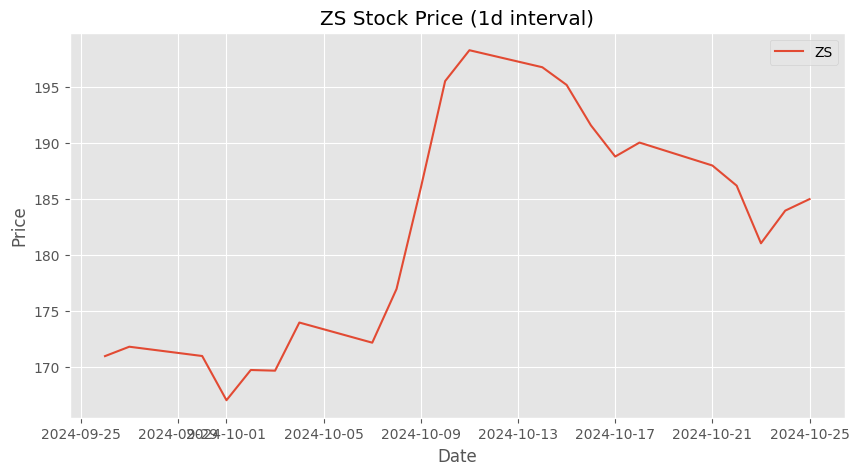

Stock Name: ZS
Average Polarity of Tweets: 0.09991510653039151
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 106 | Negative Tweets: 30 | Neutral Tweets: 57
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ZS (5m interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 15:35:00-04:00  184.720001  184.720001  184.470001  184.679993   
2024-10-25 15:40:00-04:00  184.669998  184.910004  184.619995  184.910004   
2024-10-25 15:45:00-04:00  184.875000  185.095001  184.869995  185.000000   
2024-10-25 15:50:00-04:00  185.080002  185.240005  184.779999  185.240005   
2024-10-25 15:55:00-04:00  185.350006  185.410004  184.740005  184.850006   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 15:35:00-04:00  184.679993    9891  
2024-10-25 15:40:00-04:00  184.910004   11335  
2024-10-25 15:45:00-04:00  185.000000   15032  
2024-10-25 15:50:00-04:00  185.240005   40020  
2024-10-25 15:55:00-04:00  184.850006   67552  


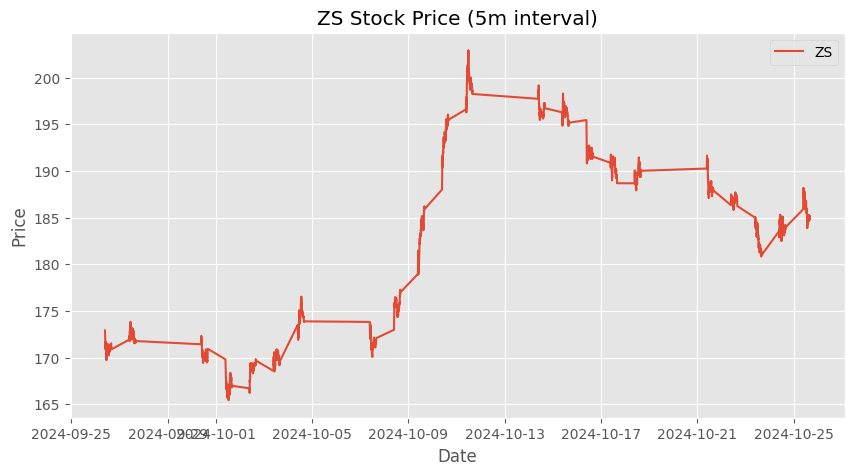

Stock Name: ZS
Average Polarity of Tweets: 0.09991510653039151
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 106 | Negative Tweets: 30 | Neutral Tweets: 57
##############################################################################


[*********************100%%**********************]  1 of 1 completed


Data for ZS (1h interval):
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-25 11:30:00-04:00  186.149902  186.830002  185.789993  186.800003   
2024-10-25 12:30:00-04:00  186.816101  186.960007  184.820099  184.820099   
2024-10-25 13:30:00-04:00  184.815002  185.179993  183.860001  185.160004   
2024-10-25 14:30:00-04:00  185.080002  185.270004  184.660004  184.839996   
2024-10-25 15:30:00-04:00  184.807495  185.410004  184.470001  184.960007   

                            Adj Close  Volume  
Datetime                                       
2024-10-25 11:30:00-04:00  186.800003   51873  
2024-10-25 12:30:00-04:00  184.820099  102433  
2024-10-25 13:30:00-04:00  185.160004  100057  
2024-10-25 14:30:00-04:00  184.839996   53593  
2024-10-25 15:30:00-04:00  184.960007  156722  


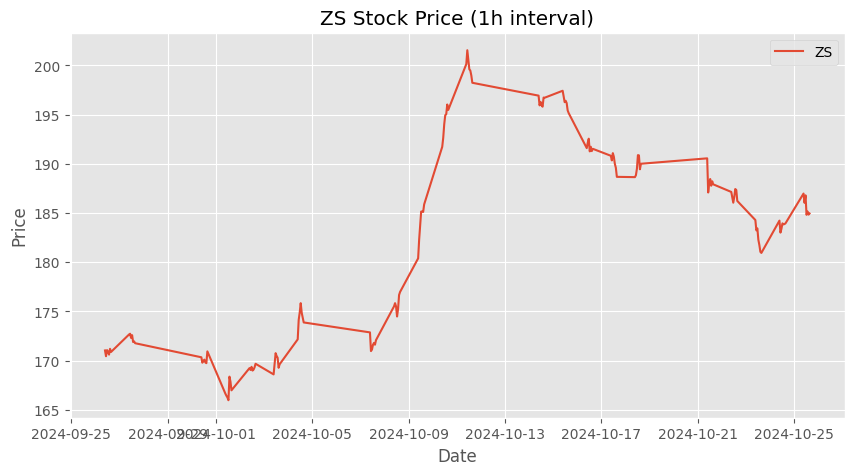

[*********************100%%**********************]  1 of 1 completed

Stock Name: ZS
Average Polarity of Tweets: 0.09991510653039151
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 106 | Negative Tweets: 30 | Neutral Tweets: 57
##############################################################################
Data for ZS (1wk interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  173.889999  174.539993  169.339996  171.770004  171.770004   
2024-09-30  170.000000  176.559998  165.419998  173.929993  173.929993   
2024-10-07  173.389999  203.029999  169.940002  198.259995  198.259995   
2024-10-14  199.289993  199.406006  187.539993  190.009995  190.009995   
2024-10-21  188.559998  192.250000  180.779999  184.960007  184.960007   

              Volume  
Date                  
2024-09-23   3695900  
2024-09-30   7071700  
2024-10-07  12684600  
2024-10-14   6290700  
2024-10-21   6488478  


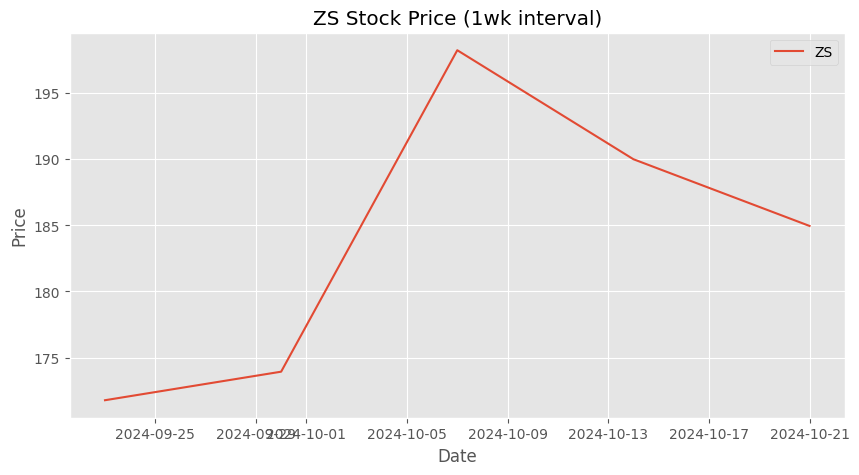

[*********************100%%**********************]  1 of 1 completed

Stock Name: ZS
Average Polarity of Tweets: 0.09991510653039151
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 106 | Negative Tweets: 30 | Neutral Tweets: 57
##############################################################################
Data for ZS (1mo interval):
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-01  170.649994  203.029999  165.419998  184.960007  184.960007   

              Volume  
Date                  
2024-10-01  31354078  


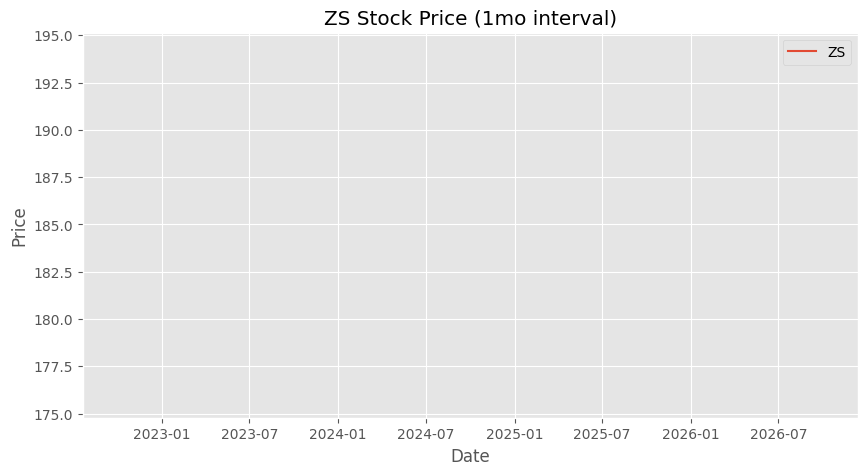

Stock Name: ZS
Average Polarity of Tweets: 0.09991510653039151
Recommendation Idea: Hold
Decision: No action needed.
Positive Tweets: 106 | Negative Tweets: 30 | Neutral Tweets: 57
##############################################################################


In [26]:
import pandas as pd
from textblob import TextBlob
import yfinance as yf
import matplotlib.pyplot as plt

# Load the dataset of tweets (Assuming the dataset has 'Tweet' column for tweet text)
tweets_df = pd.read_csv('stock_tweets.csv')  # Replace with your dataset path

# Analyze sentiment
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Add sentiment polarity to the DataFrame
tweets_df['polarity'] = tweets_df['Tweet'].apply(analyze_sentiment)

# Calculate average polarity for each stock
average_polarity = tweets_df.groupby('Stock Name')['polarity'].mean().reset_index()

# Count positive, negative, and neutral tweets for each stock
pos_counts = tweets_df[tweets_df['polarity'] > 0].groupby('Stock Name').size()
neg_counts = tweets_df[tweets_df['polarity'] < 0].groupby('Stock Name').size()
neutral_counts = tweets_df[tweets_df['polarity'] == 0].groupby('Stock Name').size()

# Example recommendation function
def recommending(polarity):
    if polarity > 0.1:
        return "Buy", "Consider buying this stock."
    elif polarity < -0.1:
        return "Sell", "Consider selling this stock."
    else:
        return "Hold", "No action needed."

# Predefined intervals
intervals = ['1d', '5m', '1h', '1wk', '1mo']

# Fetch stock data using yfinance for each unique stock name
for stock_name in average_polarity['Stock Name']:
    for interval in intervals:
        # Fetch stock data
        d = yf.download(stock_name, interval=interval, period='1mo')

        # Process the data
        d.dropna(inplace=True)

        # Check if data is empty
        if d.empty:
            print(f"No data available for {stock_name} with interval {interval}.")
            continue

        # Display the stock data
        print(f"Data for {stock_name} ({interval} interval):")
        print(d.tail())

        # Plotting the closing price
        plt.figure(figsize=(10, 5))
        plt.plot(d['Close'], label=stock_name)
        plt.title(f"{stock_name} Stock Price ({interval} interval)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        # Generate recommendation based on retrieved average polarity for the stock
        avg_polarity = average_polarity[average_polarity['Stock Name'] == stock_name]['polarity'].values[0]
        idea, decision = recommending(avg_polarity)

        # Display the recommendations
        print(f"Stock Name: {stock_name}")
        print("Average Polarity of Tweets:", avg_polarity)
        print("Recommendation Idea:", idea)
        print("Decision:", decision)
        print("Positive Tweets:", pos_counts.get(stock_name, 0), "| Negative Tweets:", neg_counts.get(stock_name, 0), "| Neutral Tweets:", neutral_counts.get(stock_name, 0))
        print("##############################################################################")
